<a href="https://colab.research.google.com/github/webercg/NLP---Daily-News-for-Stock-Market-Prediction/blob/main/Experimentos_%2B_EDA_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importação de bibliotecas

In [1]:
#pip install transformers

In [2]:
#pip install lazypredict
#pip install googletrans==4.0.0-rc1
#pip install textblob
#pip install vaderSentiment

In [4]:
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação datas
from datetime import datetime

# Prototipação
from lazypredict.Supervised import LazyClassifier


#Pipeline e pré-process
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier

#Model Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

#Model evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# 2.0 Leitura dos arquivos

## Leitura de Noticias

In [5]:
dicionario_mes_2021 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dec':'12'}
dicionario_mes_2020 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06','Jul':'07', 'Ago':'08', 'Set':'09','Out':'10', 'Nov':'11', 'Dez':'12'}
dicionario_mes_2022 = {'Jan':'01', 'Fev':'02', 'Mar':'03','Abr':'04', 'Mai':'05', 'Jun':'06'}

In [6]:
df = pd.DataFrame()

for i in dicionario_mes_2020.keys():
    arquivo = "dataset-2020/" + dicionario_mes_2020[i] + "_GoogleNews_Petr_" + i + "-2020.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)

for i in dicionario_mes_2021.keys():
    arquivo = "dataset-2021/" + dicionario_mes_2021[i] + "_GoogleNews_Petr_" + i + "_21.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)


for i in dicionario_mes_2022.keys():
    arquivo = "dataset-2022/" + dicionario_mes_2022[i] + "_GoogleNews_Petr_" + i + "_22.csv"
    df_leitura = pd.read_csv(arquivo, sep='|')
    df = df.append(df_leitura,ignore_index=True)
    

In [7]:
df

,title,media,date,desc
0,Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...,Correio Braziliense,01/01/2020,O dinheiro que será distribuído veio do leilão...
1,"Preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,01/01/2020,O diesel foi o segundo combustível com maior a...
2,"Série ""Cineastas"" e mais dicas para curtir na ...",GZH,01/01/2020,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,Feriados em 2020: 11 datas serão em dias da se...,Money Times,01/01/2020,O dia 29 de fevereiro cairá em um sábado. Veja...
4,O incêndio que matou quase todos os macacos em...,BBC,01/01/2020,Principais notícias. Como a Petrobras virou te...
...,...,...,...,...
7978,Petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,30/06/2022,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,Governo avalia mecanismo para obrigar Petrobra...,BiodieselBR.com,30/06/2022,A Petrobras chegou a assinar em 2019 um acordo...
7980,Postos Petrobras e Shell se rendem à recarga d...,Quatro Rodas,30/06/2022,O eletroposto foi instalado no posto Petrobras...
7981,Ações Petrobras: saiba o preço após fechamento...,UOL Economia,30/06/2022,As ações da Petrobras fecharam em queda nesta ...


In [8]:
#Transformando coluna data para datetime:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

title            object
media            object
date     datetime64[ns]
desc             object
dtype: object

## Leitura dos pregões

In [9]:
df_petro = pd.read_csv('dataset-2021/Hist_Preço_Petr_2021_.csv', sep='|')
df_petro_2020 = pd.read_csv('dataset-2020/Hist_Preço_Petr_2020_.csv', sep='|')
df_petro_2022 = pd.read_csv('dataset-2022/Hist_Preço_Petr_2022_.csv', sep='|')
df_petro = df_petro_2020.append(df_petro,ignore_index=True)
df_petro = df_petro.append(df_petro_2022,ignore_index=True)
df_petro

,Date,Adj Close,Volume,Var%
0,2020-01-02,20.47,37774500,0.02
1,2020-01-03,20.30,71595600,-0.01
2,2020-01-06,20.54,81844000,0.01
3,2020-01-07,20.46,32822000,-0.00
4,2020-01-08,20.33,48215600,-0.01
...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01
615,2022-06-27,27.98,90417700,0.06
616,2022-06-28,28.33,51388000,0.01
617,2022-06-29,28.08,52048800,-0.01


In [10]:
#Transformando a coluna Date para datetime
df_petro['Date'] = pd.to_datetime(df_petro['Date'])
df_petro.dtypes

Date         datetime64[ns]
Adj Close           float64
Volume                int64
Var%                float64
dtype: object

# 3.0 EDA
**H1:** Há uma média razoável de noticias diárias   - **VERDADEIRO**  
**H2:** Há poucos dias sem noticias na base de dados  - **VERDADEIRO**   
**H3:** Há dias em que o pregão da bolsa não funciona (Finais de Semana) **VERDADEIRO**  
**H4:**  
**H5:**  

## 3.1 H1: Há uma média razoável de noticias diárias

In [11]:
df.date.value_counts()

2022-01-06    10
2022-03-06    10
2021-09-12    10
2021-04-16    10
2021-05-05    10
              ..
2020-12-27     2
2022-02-26     2
2021-02-14     2
2021-07-25     1
2022-01-23     1
Name: date, Length: 858, dtype: int64

In [12]:
# Coletando as datas e as frequencias de noticias:
datas = df.date.value_counts()  
data_df = datas.reset_index()
data_df

,index,date
0,2022-01-06,10
1,2022-03-06,10
2,2021-09-12,10
3,2021-04-16,10
4,2021-05-05,10
...,...,...
853,2020-12-27,2
854,2022-02-26,2
855,2021-02-14,2
856,2021-07-25,1


In [13]:
#Visualizando os tipos dos dados
data_df.dtypes

index    datetime64[ns]
date              int64
dtype: object

In [14]:
#Alterando para o formato datetime
data_df['index'] = pd.to_datetime(data_df['index'])
data_df

,index,date
0,2022-01-06,10
1,2022-03-06,10
2,2021-09-12,10
3,2021-04-16,10
4,2021-05-05,10
...,...,...
853,2020-12-27,2
854,2022-02-26,2
855,2021-02-14,2
856,2021-07-25,1


In [15]:
# Organizando o dataframe em ordem cronologica
data_df.sort_values(by = 'index', ascending = True, inplace = True) 
data_df.tail()

,index,date
787,2022-12-02,6
484,2022-12-03,10
237,2022-12-04,10
399,2022-12-05,10
614,2022-12-06,10


In [16]:
data_df.describe()

,date
count,858.00
mean,9.30
std,1.71
min,1.00
25%,10.00
50%,10.00
75%,10.00
max,10.00


Há uma média de 9.25 (+- 2) noticias por dia

<AxesSubplot:xlabel='Datas', ylabel='Num_Noticias'>

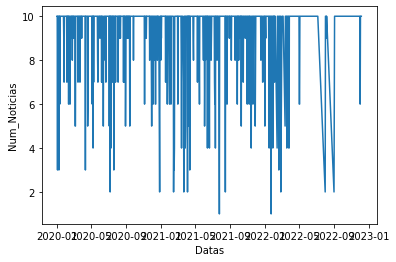

In [17]:
#Visualizando data vs quantidade de notícias
data_df.columns = ['Datas', 'Num_Noticias']
sns.lineplot(x = 'Datas', y = 'Num_Noticias', data = data_df)

In [18]:
# inserindo coluna de mês
data_df['Mes'] = data_df['Datas'].dt.month

# Calculando media de noticias por mês
df_noticia_mes = data_df.groupby('Mes').agg({'Num_Noticias':np.mean})
df_noticia_mes

,Num_Noticias
Mes,
1,9.07
2,8.91
3,9.01
4,9.46
5,9.55
6,9.47
7,9.03
8,9.38
9,9.56


In [19]:
data_df.head(20)

,Datas,Num_Noticias,Mes
96,2020-01-01,10,1
589,2020-01-02,10,1
841,2020-01-03,3,1
205,2020-01-04,10,1
89,2020-01-05,10,1
616,2020-01-06,10,1
398,2020-01-07,10,1
842,2020-01-08,3,1
303,2020-01-09,10,1
181,2020-01-10,10,1


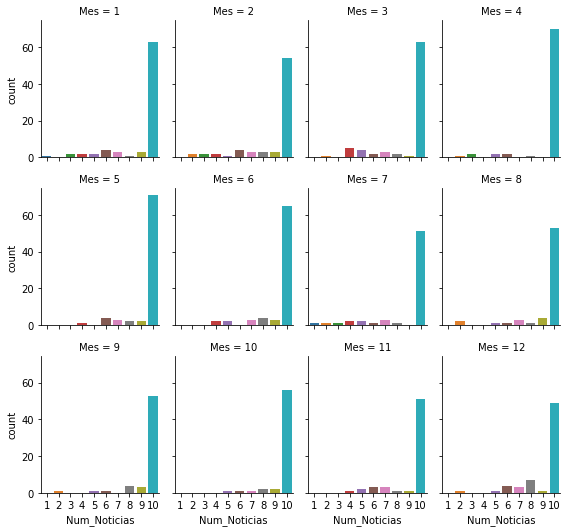

In [20]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
sns.catplot(x="Num_Noticias", col="Mes", col_wrap=4,
                data=data_df,
                kind="count", height=2.5, aspect=.8)

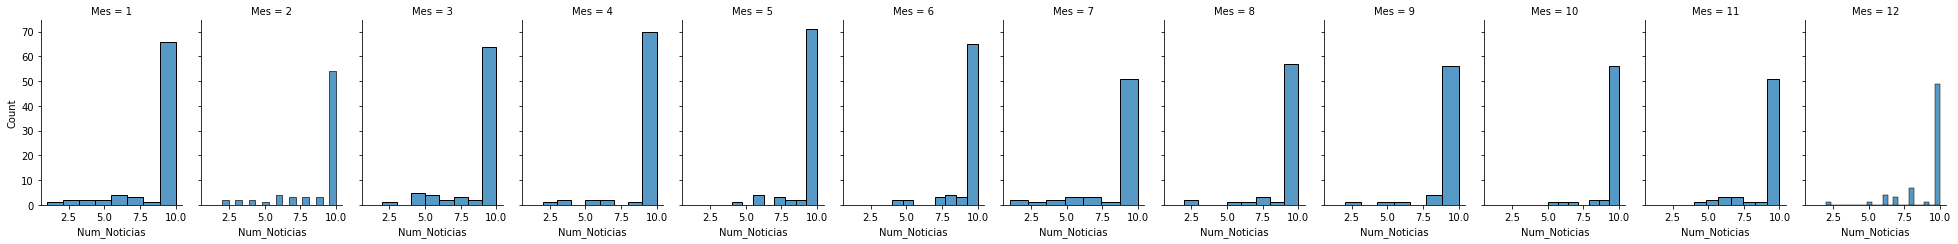

In [21]:
# Visualizando distribuição da quantidade de noticias ao longo dos meses
g = sns.FacetGrid(data_df, col="Mes", height=3.5, aspect=.65)
g.map(sns.histplot, "Num_Noticias")

Há poucas ocorrências de baixo numero de noticias por dia, a maior ocorrência da quantidade de noticias por dia é de 10.
Dessa forma, a média de noticias por mês varia de 8 á 10.

## 3.2 Há poucos dias sem noticias na base de dados

In [22]:
from datetime import datetime

In [23]:
## Gerando uma lista com todos os dias:
start_date = '01/01/2020'
end_date = '31/12/2022'

#Transformando para o padrão inglês
start_date = datetime.strptime(start_date, '%d/%m/%Y').strftime('%m-%d-%Y')
end_date = datetime.strptime(end_date, '%d/%m/%Y').strftime('%m-%d-%Y')

#Gerando a lista com todas as datas
todas_datas = pd.date_range(start=start_date, end=end_date, freq = '1D')
todas_datas = [i.strftime("%d/%m/%Y") for i in todas_datas ]

In [24]:
#Gerando lista com todas as datas com noticias
datas_com_noticias = [i.strftime("%d/%m/%Y") for i in data_df['Datas'] ]

In [25]:
#Gerando lista com todas as datas sem noticias 
datas_sem_noticias = [i for i in todas_datas if i not in datas_com_noticias]
print("Há %s dias sem notícias no periodo considerado!" % len(datas_sem_noticias))

Há 238 dias sem notícias no periodo considerado!


In [26]:
datas_sem_noticias

['14/01/2021',
 '15/01/2021',
 '24/01/2021',
 '27/01/2021',
 '04/02/2021',
 '04/03/2021',
 '05/03/2021',
 '09/03/2021',
 '19/03/2021',
 '02/04/2021',
 '14/04/2021',
 '20/04/2021',
 '24/04/2021',
 '12/05/2021',
 '15/05/2021',
 '23/05/2021',
 '04/06/2021',
 '19/06/2021',
 '27/06/2021',
 '01/07/2021',
 '20/07/2021',
 '22/07/2021',
 '28/07/2021',
 '30/07/2021',
 '06/08/2021',
 '08/08/2021',
 '13/08/2021',
 '09/09/2021',
 '10/09/2021',
 '04/10/2021',
 '16/10/2021',
 '23/10/2021',
 '04/11/2021',
 '21/11/2021',
 '23/11/2021',
 '29/11/2021',
 '04/12/2021',
 '19/12/2021',
 '03/01/2022',
 '07/01/2022',
 '08/01/2022',
 '09/01/2022',
 '10/01/2022',
 '11/01/2022',
 '12/01/2022',
 '18/01/2022',
 '07/02/2022',
 '08/02/2022',
 '09/02/2022',
 '10/02/2022',
 '11/02/2022',
 '12/02/2022',
 '22/02/2022',
 '23/02/2022',
 '27/02/2022',
 '28/02/2022',
 '01/03/2022',
 '07/03/2022',
 '08/03/2022',
 '09/03/2022',
 '10/03/2022',
 '11/03/2022',
 '12/03/2022',
 '22/03/2022',
 '03/04/2022',
 '07/04/2022',
 '08/04/20

Em apenas 38 dias de 2021 não houve retorno de noticias diárias da Petrobras

## 3.3 Há dias em que o pregão da bolsa não funciona (Finais de Semana)

In [27]:
datas_com_pregao = [i.strftime("%d/%m/%Y") for i in df_petro['Date'] ]

In [28]:
datas_sem_pregao = [i for i in todas_datas if i not in datas_com_pregao]

In [29]:
print("Há %s dias sem pregão no periodo considerado!" % len(datas_sem_pregao))

Há 477 dias sem pregão no periodo considerado!


# 4.0 Pré-Processamento

## 4.1 Padronização das palavras contidas nos títulos das noticias para minúsculo

In [30]:
df.head()

,title,media,date,desc
0,Pré-sal: Centro Oeste fica com R$ 1 bilhão dos...,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,"Preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,"Série ""Cineastas"" e mais dicas para curtir na ...",GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,Feriados em 2020: 11 datas serão em dias da se...,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,O incêndio que matou quase todos os macacos em...,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...


In [31]:
df['title'] = df['title'].apply(lambda x: x.lower())
df.head()

,title,media,date,desc
0,pré-sal: centro oeste fica com r$ 1 bilhão dos...,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,"preço do etanol fecha 2019 em alta de 11,5% na...",Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,"série ""cineastas"" e mais dicas para curtir na ...",GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,feriados em 2020: 11 datas serão em dias da se...,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,o incêndio que matou quase todos os macacos em...,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...


## 4.2 Exclusão noticias que não contenham a palavra chave "Petrobras" no título
Embora tenha-se configurado A biblioteca GoogleNews() para baixar noticias pela palavra chave "Petrobras" pode ocorrer casos em que o termo não é citado no título e nem no corpo da noticia.

In [32]:
df.iloc[2][0]

'série "cineastas" e mais dicas para curtir na tv nesta quarta-feira'

In [33]:
df.iloc[2][3]

'Cosmatos; e, por fim, às 23h15min, Rambo III (1988), de Peter MacDonald.  Especial Lenine e Petrobras Sinfônica - TV Brasil, 22h. Concerto especial  com o...'

In [34]:
df['title'] = df['title'].apply(lambda x: "" if "petrobras" not in x else x)
df

,title,media,date,desc
0,,Correio Braziliense,2020-01-01,O dinheiro que será distribuído veio do leilão...
1,,Diario de Pernambuco,2020-01-01,O diesel foi o segundo combustível com maior a...
2,,GZH,2020-01-01,"Cosmatos; e, por fim, às 23h15min, Rambo III (..."
3,,Money Times,2020-01-01,O dia 29 de fevereiro cairá em um sábado. Veja...
4,,BBC,2020-01-01,Principais notícias. Como a Petrobras virou te...
...,...,...,...,...
7978,petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,2022-06-30,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,governo avalia mecanismo para obrigar petrobra...,BiodieselBR.com,2022-06-30,A Petrobras chegou a assinar em 2019 um acordo...
7980,postos petrobras e shell se rendem à recarga d...,Quatro Rodas,2022-06-30,O eletroposto foi instalado no posto Petrobras...
7981,ações petrobras: saiba o preço após fechamento...,UOL Economia,2022-06-30,As ações da Petrobras fecharam em queda nesta ...


In [35]:
df = df[(df['title'] != "")]
df

,title,media,date,desc
10,indústria tem maior nível de emprego em 4 anos...,G1,2020-02-01,Indústria tem maior nível de emprego em 4 anos...
11,"clarissa lins, do ibp, renuncia como integrant...",Época Negócios,2020-02-01,A Petrobras informa que a conselheira de admin...
12,petrobras viverá momento de transformação nos ...,Valor Econômico,2020-02-01,Os anos 2020 prometem ser de profundas transfo...
20,governo não descarta intervir na petrobras par...,Blog do Correio Braziliense,2020-03-01,Assessores próximos do presidente Jair Bolsona...
21,postos aguardam petrobras para reajustar preço...,Metrópoles,2020-03-01,Postos aguardam Petrobras para reajustar preço...
...,...,...,...,...
7977,"petrobras pagará r$ 30,9 bi por plataformas",Valor Econômico,2022-06-30,O resultado da licitação internacional bilioná...
7978,petrobras retoma venda de três refinarias: sai...,Gazeta do Povo,2022-06-30,"Refinarias da Petrobras em Pernambuco, Paraná ..."
7979,governo avalia mecanismo para obrigar petrobra...,BiodieselBR.com,2022-06-30,A Petrobras chegou a assinar em 2019 um acordo...
7980,postos petrobras e shell se rendem à recarga d...,Quatro Rodas,2022-06-30,O eletroposto foi instalado no posto Petrobras...


### Dispersão das fontes de notícias

In [36]:
dfmed1 = df
dfmed1['media'] = dfmed1['media'].str.replace('Click Petróleo e Gás','CPG Click Petroleo e Gas')
dfmed = dfmed1.groupby(['media']).count()
dfmed.sort_values(by='title', ascending=False, inplace=True)
dfmed.reset_index(inplace=True)
totnot = dfmed['title'].sum()
dfmed['title'] = pd.to_numeric(dfmed['title'])
dfmed['perc'] = ((dfmed['title'] / totnot) *100)
dfmed['perc'] = dfmed['perc'].round(2)

<AxesSubplot:ylabel='media'>

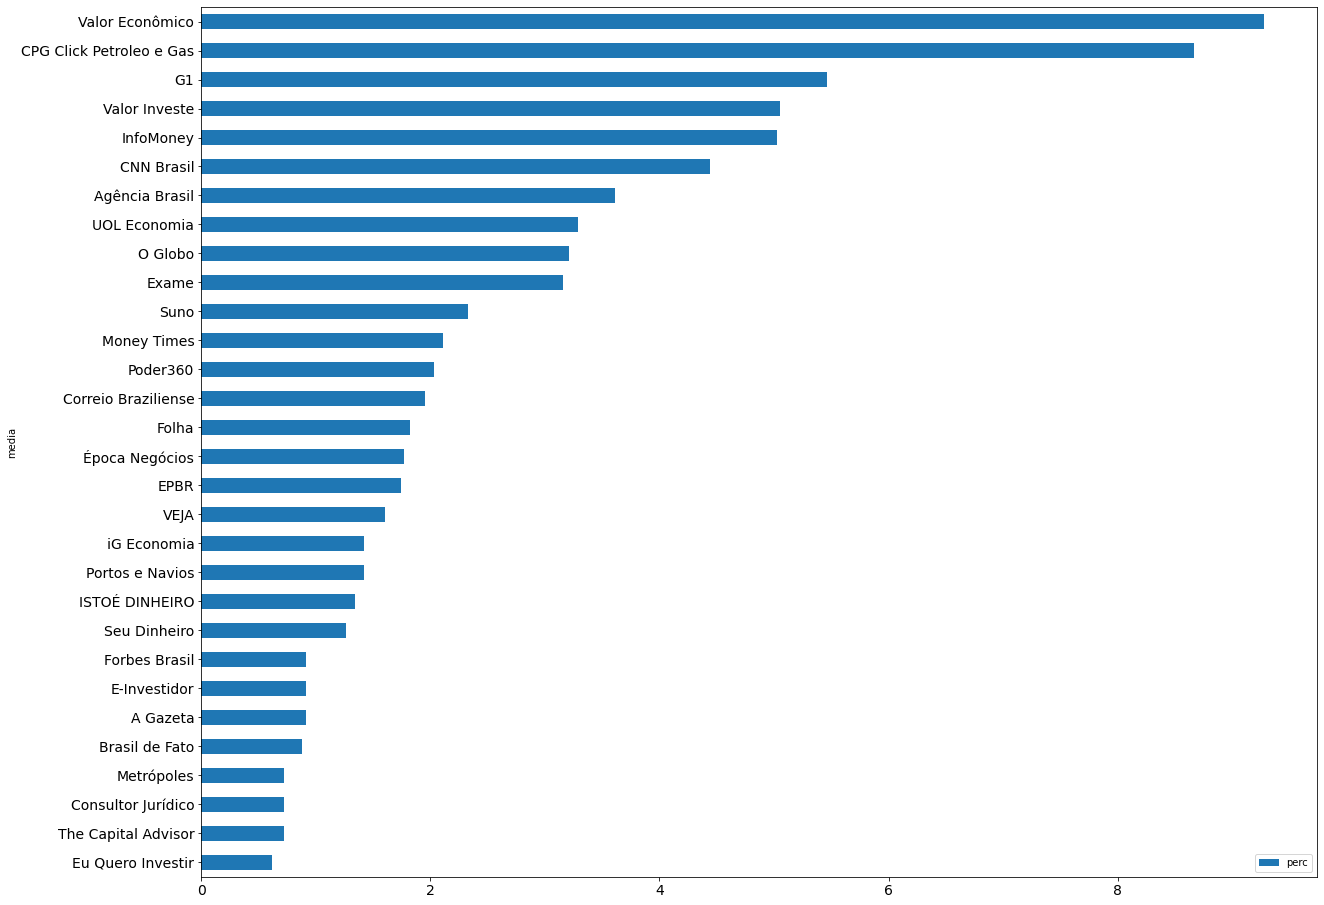

In [37]:
dfmed.sort_values(by='perc', ascending=False, inplace=True)
dfmed.reset_index(inplace=True)
dfmed = dfmed.head(30)
dfmed.sort_index(ascending=False).plot(kind='barh',x='media', y='perc', figsize=(20,16),fontsize=(14))

## 4.4 Adição de classe "Fechamento" ao dataframe de Ações
Classe 1: Fechamento em alta  
Classe 0: Fechamento em queda  

In [38]:
df_petro

,Date,Adj Close,Volume,Var%
0,2020-01-02,20.47,37774500,0.02
1,2020-01-03,20.30,71595600,-0.01
2,2020-01-06,20.54,81844000,0.01
3,2020-01-07,20.46,32822000,-0.00
4,2020-01-08,20.33,48215600,-0.01
...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01
615,2022-06-27,27.98,90417700,0.06
616,2022-06-28,28.33,51388000,0.01
617,2022-06-29,28.08,52048800,-0.01


In [39]:
df_petro['Fechamento'] = df_petro['Var%'].apply(lambda x: 0 if x<0 else 1)
df_petro

,Date,Adj Close,Volume,Var%,Fechamento
0,2020-01-02,20.47,37774500,0.02,1
1,2020-01-03,20.30,71595600,-0.01,0
2,2020-01-06,20.54,81844000,0.01,1
3,2020-01-07,20.46,32822000,-0.00,0
4,2020-01-08,20.33,48215600,-0.01,0
...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0
615,2022-06-27,27.98,90417700,0.06,1
616,2022-06-28,28.33,51388000,0.01,1
617,2022-06-29,28.08,52048800,-0.01,0


In [40]:
df_petro.Fechamento.value_counts()

1    319
0    300
Name: Fechamento, dtype: int64

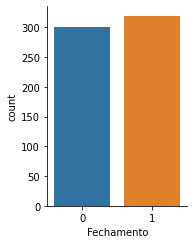

In [41]:
sns.catplot(x="Fechamento",
                data=df_petro,
                kind="count", height=3.5, aspect=.8)

Há um balanceamento de classes! Não precisaremos investir muito tempo em tecnicas de balanceamento para treinar o modelo

## 4.5 Concatenar noticias diárias

In [42]:
df_petro.head()

,Date,Adj Close,Volume,Var%,Fechamento
0,2020-01-02,20.47,37774500,0.02,1
1,2020-01-03,20.30,71595600,-0.01,0
2,2020-01-06,20.54,81844000,0.01,1
3,2020-01-07,20.46,32822000,-0.00,0
4,2020-01-08,20.33,48215600,-0.01,0


In [43]:
df.head()

,title,media,date,desc
10,indústria tem maior nível de emprego em 4 anos...,G1,2020-02-01,Indústria tem maior nível de emprego em 4 anos...
11,"clarissa lins, do ibp, renuncia como integrant...",Época Negócios,2020-02-01,A Petrobras informa que a conselheira de admin...
12,petrobras viverá momento de transformação nos ...,Valor Econômico,2020-02-01,Os anos 2020 prometem ser de profundas transfo...
20,governo não descarta intervir na petrobras par...,Blog do Correio Braziliense,2020-03-01,Assessores próximos do presidente Jair Bolsona...
21,postos aguardam petrobras para reajustar preço...,Metrópoles,2020-03-01,Postos aguardam Petrobras para reajustar preço...


In [44]:
lista_datas = []
lista_news = []

for i in df.date.unique():
    news = ""
    for row in df[(df['date']==i)].iterrows():
        news = news + " " + row[1][0]
    lista_news.append(news)
    lista_datas.append(i)

In [45]:
pd.set_option('display.max_rows', 50)

In [46]:
df_news_diaria = pd.DataFrame(list(zip(lista_datas,lista_news)),
               columns =['Date', 'Noticias'])
df_news_diaria.sort_values(by = 'Date', ascending = True, inplace = True)
df_news_diaria

,Date,Noticias
27,2020-01-02,petrobras e vale retiram seus funcionários de...
53,2020-01-03,petrobras reduz preços do diesel e da gasolin...
81,2020-01-04,petrobras faz redução em produção de petróleo...
128,2020-01-06,petrobras avança processo de venda de campos ...
148,2020-01-07,o adeus da petrobras ao amazonas petrobras vê...
...,...,...
641,2022-12-02,bolsonaro diz que trabalha com petrobras para...
661,2022-12-03,"bolsonaro diz que petrobras tem ""lucro absurd..."
691,2022-12-04,comitê da petrobras aprova nome de josé mauro...
718,2022-12-05,guedes diz que encaminhará ‘imediatamente’ es...


## 4.6 Concatenar noticias referentes a datas sem pregões.

- O próximo dia útil após o periodo sem pregões deverá consolidar as noticias acumuladas dos dias sem pregões.
- O dataset final deverá conter apenas as datas em que ocorreu o pregão

Dessa forma, iniciaremos o procedimento, concatenando as noticias de dias que não houveram pregões

In [47]:
## Iterar sobre as datas dos pregões (iniciando pelo segundo dia do pregão de 2021 df_petro.Date.iloc[1:])

## Calcular delta (diferença entre dias entre dois registros seguidos de pregões):
import datetime

df_news_sem_pregao = pd.DataFrame()
timedelta_1dia = datetime.timedelta(days=1)

lista_datas = []
lista_noticias_sem_pregao = []

for i, data in enumerate(df_petro.Date.iloc[1:]):
    data_anterior = df_petro['Date'].iloc[i]  
    delta = data - data_anterior

    
    # Se houver mais de 1 dia sem pregão:    
    if delta > timedelta_1dia:
            
            
        # Filtra as noticias entre as datas sem pregão:
        df_aux = df_news_diaria[ (df_news_diaria['Date']> data_anterior) & (df_news_diaria['Date']<= data)  ]
        
        ## Concatena as noticias das datas sem pregão
        news = ""
        for row in df_aux.iterrows():
            news = news + " " + row[1][1]


        ## Armazena as noticias e data do ultimo pregão valido em listas
        lista_noticias_sem_pregao.append(news)
        lista_datas.append(data)
        
        #Cria um dataframe auxiliar com a data do ultimo pregão e as noticias concatenadas dos dias sem pregões:
        df_aux2 = pd.DataFrame(list(zip(lista_datas,lista_noticias_sem_pregao)),
               columns =['Date', 'Noticias'])
    
        # Gera o dataframe com as noticias sem pregões + datas do ultimo pregão valido.
        df_news_sem_pregao = df_news_sem_pregao.append(df_aux2, ignore_index = True)
        
        #Resetando as listas para geração de novo DF
        lista_noticias_sem_pregao = []
        lista_datas = []
        
df_news_sem_pregao

,Date,Noticias
0,2020-01-06,petrobras faz redução em produção de petróle...
1,2020-01-13,quase fechada a venda de refinaria da petrob...
2,2020-01-20,"após bb, petrobras também anuncia que aposen..."
3,2020-01-27,demissões em empresa da petrobras em araucár...
4,2020-02-03,indústria tem maior nível de emprego em 4 an...
...,...,...
134,2022-06-06,governo indica josé mauro ferreira coelho pa...
135,2022-06-13,defasagem de combustíveis se sustenta nas re...
136,2022-06-17,petrobras anuncia reajuste da gasolina e do ...
137,2022-06-20,bolsonaro faz novos ataques à petrobras por ...


## 4.7 Atualiza as noticias concatenadas no df_news_diaria:

In [48]:
df_news_diaria_atualizada = df_news_diaria.copy()

# itera sobre os dias com pregão cujo noticias de dias anteriores foram concatenadas:
for data in df_news_sem_pregao.Date.unique():
    
    #Filtra pelo dia com pregão que teve noticias concatenada
    df_noticia_dias_sem_pregao = df_news_sem_pregao[(df_news_sem_pregao['Date']==data)]


    #Checa se há registro referente a data no df de noticias
    df_check_noticias = df_news_diaria_atualizada[(df_news_diaria_atualizada['Date']==data)]
    
    # Se não houver registros referente á data então o registro deverá ser criado no df de noticias:
    # Se houver, então o registro será atualizado no df de noticias
    
    if len(df_check_noticias) > 0:
        
        #Substitui os registros
        df_news_diaria_atualizada = df_news_diaria_atualizada.replace ((df_news_diaria_atualizada.loc[df_news_diaria_atualizada['Date'].isin(df_noticia_dias_sem_pregao['Date'])])['Noticias'].values, df_noticia_dias_sem_pregao['Noticias'].values)
        
    else:
        #Insere o novo registro
        df_news_diaria_atualizada = df_news_diaria_atualizada.append(df_noticia_dias_sem_pregao, ignore_index = True)

In [49]:
len(df_news_diaria), len(df_news_diaria_atualizada)

(767, 785)

## 4.8 Mesclando o dataframe noticias finais e ações

In [50]:
df_final = pd.merge(left = df_petro, right = df_news_diaria_atualizada, how = 'left', on = 'Date')
df_final.head(10)

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...
4,2020-01-08,20.33,48215600,-0.01,0,NaN
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...
6,2020-01-10,20.18,25397500,-0.00,0,petrobras pode criar subsidiárias para vender...
7,2020-01-13,20.22,30676800,0.00,1,quase fechada a venda de refinaria da petrob...
8,2020-01-14,20.00,39796500,-0.01,0,fábrica de fertilizantes da petrobras no para...
9,2020-01-15,19.70,34405700,-0.02,0,petrobras vende ativos na nigéria e encerra a...


In [51]:
df_news_diaria_atualizada.head(12)

,Date,Noticias
0,2020-01-02,petrobras e vale retiram seus funcionários de...
1,2020-01-03,petrobras reduz preços do diesel e da gasolin...
2,2020-01-04,petrobras faz redução em produção de petróleo...
3,2020-01-06,petrobras faz redução em produção de petróle...
4,2020-01-07,o adeus da petrobras ao amazonas petrobras vê...
5,2020-01-09,refinarias da petrobras apresentam queda na c...
6,2020-01-10,petrobras pode criar subsidiárias para vender...
7,2020-01-11,quase fechada a venda de refinaria da petrobr...
8,2020-01-12,petrobras vende áreas de produção e abre espa...
9,2020-01-13,quase fechada a venda de refinaria da petrob...


In [52]:
df_final[(df_final['Noticias'].isnull())].Date, len(df_final[(df_final['Noticias'].isnull())].Date)

(4     2020-01-08
 25    2020-02-06
 28    2020-02-11
 31    2020-02-14
 43    2020-03-05
          ...    
 600   2022-06-03
 602   2022-06-07
 603   2022-06-08
 604   2022-06-09
 605   2022-06-10
 Name: Date, Length: 76, dtype: datetime64[ns],
 76)

No total houveram 76 registros de pregões sem atribuição de noticias.

Para esses registros observou-se que:  

**1) Não houveram noticias na respectiva data e/ou**  
**2) Considerando as datas sem pregões que antecederam a data do pregão também não houveram noticias.**  

In [53]:
len(df_final), len(df_final[(df_final['Noticias'].isnull())].Date)

(619, 76)

## 4.9 Exclusão dias com pregões sem noticias

In [54]:
df_final = df_final.dropna()

In [55]:
len(df_final)

543

In [56]:
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...
...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...


# 5.0 Feature Engineering

Será realizado o levantamento das palavras mais frequentes em notícias para inputação de polaridade no dicionário SentilexPT caso não existam ainda.

### ATENÇÃO: As seções 5, 6 e 7 Foram automatizadas e otimizadas na seção 8. Rodar os códigos das seções 5, 6 e 7 pode demorar um pouco

# 5.1 Sentilex: Função gerar score

Criando um dicionário com polaridades

In [56]:
## Função para montar dicionarios
def montar_dicionario(versao_sentilex):
    versao = 'Versoes dicionarios sentilex/SentiLex-lem-PT01 editado v' + versao_sentilex + '.txt'
    sentilexpt = open(versao,'r',encoding='utf-8-sig')
    dic_palavra_polaridade = {}
    
    for i in sentilexpt.readlines():
        pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
        palavra = (i[:pos_ponto])          # Pega a palavra
        pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
        polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
        #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
        dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade
    
    return dic_palavra_polaridade


## Funçao para retornar o score do sentimento lendo o dicionario
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
        #l_sentimento.append(float(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade     
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [57]:
## iniciando as features com a versão original do sentilex
sentilexpt = open('Versoes dicionarios sentilex/SentiLex-lem-PT01.txt','r',encoding='utf-8-sig')

dic_palavra_polaridade = {}

for i in sentilexpt.readlines():
    pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
    palavra = (i[:pos_ponto])          # Pega a palavra
    pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
    #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
    dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade

In [58]:
print (dic_palavra_polaridade.get('legal'))

1


In [59]:
print (dic_palavra_polaridade.get('milhão'))

None


In [60]:
versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']

In [61]:
df_final['score'] = df_final['Noticias'].apply(lambda x: Score_sentimento(x))
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,0
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,0
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0
...,...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...,0
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...,-1
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...,0
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...,0


# 5.2 Tradução noticias

### Função de tradução

In [62]:
from googletrans import Translator

In [63]:
trans = Translator()

In [64]:
trans.translate("The book is on the table", dest = 'pt').text

'O livro está sobre a mesa'

In [65]:
def traduzir(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    frase = trans.translate(frase, dest = 'en').text
    return frase

In [66]:
frase_teste = traduzir("A comida está muito boa")
frase_teste

'the food is very good'

In [67]:
df_final['Noticia_traduzida'] = df_final['Noticias'].apply(lambda x: traduzir(x))
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Noticia_traduzida
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0,petrobras and vale withdraw their employees fr...
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0,petrobras reduces diesel and gasoline prices a...
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,0,petrobras makes reduction in oil production an...
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,0,petrobras goodbye to amazons petrobras sees mo...
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0,Petrobras refineries show a drop in global oil...
...,...,...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...,0,petrobras eligibility committee approves caio ...
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...,-1,caio andrade denies government recommendation ...
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...,0,petrobras: new president will not be able to c...
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...,0,paes de andrade misses first meeting of petrob...


In [68]:
#Tradução alternativa
#df_final3.reset_index(inplace=True)
#df_final3.drop(['index'], axis = 1, inplace = True) 

#import time
#for i in range(0, len(df_final3['Noticias'])):
    #if len(df_final3['Noticias'][i])>0:
        #df_final3['Noticias'][i] = trans.translate(df_final3['Noticias'][i]).text
        #time.sleep(2)

## 5.3 Vader Sentiment: Função gerar scores Vader

In [69]:
from textblob import TextBlob

In [70]:
text_blob = TextBlob(frase_teste)
polaridade = text_blob.polarity
subjetividade = text_blob.subjectivity

polaridade, subjetividade

(0.9099999999999999, 0.7800000000000001)

In [71]:
def polaridade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    polaridade = text_blob.polarity
    return polaridade

def subjetividade(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    text_blob = TextBlob(frase)
    subjetividade = text_blob.subjectivity
    return subjetividade

In [72]:
polaridade("tudo ótimo e perfeito"), subjetividade("tudo ótimo e perfeito")

(0.0, 0.0)

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [74]:
s_analyze = SentimentIntensityAnalyzer()
sentiment= s_analyze.polarity_scores(frase_teste)

In [75]:
sentiment

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [76]:
type(sentiment)
sentiment.get('neu')

0.556

In [77]:
def negatividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neg')
    return sentimento

def neutralidade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('neu')
    return sentimento

def positividade(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('pos')
    return sentimento

def composicao(frase):
    frase = frase.lower()                   # coloca toda a frase em minusculo
    s_analyze = SentimentIntensityAnalyzer()
    sentiment= s_analyze.polarity_scores(frase)                 
    sentimento = sentiment.get('compound')
    return sentimento

In [78]:
negatividade("tudo ótimo e perfeito"), neutralidade("tudo ótimo e perfeito"), positividade("tudo ótimo e perfeito"), composicao("tudo ótimo e perfeito")

(0.0, 1.0, 0.0, 0.0)

In [79]:
df_final['polaridade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: polaridade(str(x)))
df_final['subjetividade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: subjetividade(str(x)))
df_final['negatividade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: negatividade(str(x)))
df_final['neutralidade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: neutralidade(str(x)))
df_final['positividade_vad'] = df_final['Noticia_traduzida'].apply(lambda x: positividade(str(x)))
df_final['composicao_vad'] = df_final['Noticia_traduzida'].apply(lambda x: composicao(str(x)))

# 5.4 roBERTa: Função gerar score roBERTa
https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [80]:
#pip install –upgrade pip

In [81]:
#pip install tensorflow

In [82]:
#pip install transformers

In [83]:
#pip install torch

In [84]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [85]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [86]:
example = "This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [87]:
def neg_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    neg_roberta = scores[0]
   # neu_roberta = scores[1]
   # pos_roberta = scores[2]
    return neg_roberta

def neu_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    neu_roberta = scores[1]
    #pos_roberta = scores[2]
    return neu_roberta

def pos_rob(frase):
    #trunca a frase para 514 caracteres (máximo suportado pelo modelo de Roberta)
    frase = frase[:514]
    
    encoded_text = tokenizer(frase, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    #neg_roberta = scores[0]
    #neu_roberta = scores[1]
    pos_roberta = scores[2]
    return pos_roberta
    

In [88]:
df_final['neg_rob'] = df_final['Noticia_traduzida'].apply(lambda x: neg_rob(str(x)))
df_final['neu_rob'] = df_final['Noticia_traduzida'].apply(lambda x: neu_rob(str(x)))
df_final['pos_rob'] = df_final['Noticia_traduzida'].apply(lambda x: pos_rob(str(x)))

# 5.5 finBERT: Função gerar score finBERT

In [89]:
#pip install transformers

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [90]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

In [91]:
sentences = ["there is a shortage of capital, and we need extra financing"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative


[{'label': 'Negative', 'score': 0.9966173768043518}]


In [92]:
sentences = ["cool facinanting loss"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative

[{'label': 'Negative', 'score': 0.9918428659439087}]


In [93]:
def sentimento_finbert_pos(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Positive":
        score = dict_results.get('score')
    else:
        score = 0
        
    return score

def sentimento_finbert_neg(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Negative":
        score = -1*dict_results.get('score')
    else:
        score = 0
        
    return score

def sentimento_finbert_neu(string):
    results = nlp([string])
    dict_results = results[0]
    sentimento = dict_results.get('label')
    
    if sentimento == "Neutral":
        score = dict_results.get('score')
    else:
        score = 0        
        
    return score

In [94]:
sentimento_finbert_neg("there is a shortage of capital, and we need extra financing")

-0.9966173768043518

In [95]:
df_final['pos_finbert'] = df_final['Noticia_traduzida'].apply(lambda x: sentimento_finbert_pos(x))
df_final['neg_finbert'] = df_final['Noticia_traduzida'].apply(lambda x: sentimento_finbert_neg(x))
df_final['neu_finbert'] = df_final['Noticia_traduzida'].apply(lambda x: sentimento_finbert_neu(x))

In [119]:
df_final.to_csv('Alldata_with_features.csv',index=False)
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Noticia_traduzida,polaridade_vad,subjetividade_vad,negatividade_vad,neutralidade_vad,positividade_vad,composicao_vad,neg_rob,neu_rob,pos_rob,pos_finbert,neg_finbert,neu_finbert
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0,petrobras and vale withdraw their employees fr...,0.00,0.00,0.09,0.92,0.00,-0.38,0.72,0.27,0.01,0.00,-1.00,0.00
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0,petrobras reduces diesel and gasoline prices a...,0.00,0.00,0.00,1.00,0.00,0.00,0.13,0.78,0.09,1.00,0.00,0.00
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,0,petrobras makes reduction in oil production an...,0.00,0.00,0.04,0.93,0.04,0.00,0.08,0.85,0.07,0.00,0.00,1.00
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,0,petrobras goodbye to amazons petrobras sees mo...,0.50,0.50,0.03,0.97,0.00,-0.03,0.03,0.80,0.17,0.00,0.00,0.93
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0,Petrobras refineries show a drop in global oil...,0.00,0.12,0.15,0.85,0.00,-0.27,0.29,0.68,0.03,0.00,-1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...,0,petrobras eligibility committee approves caio ...,0.07,0.36,0.05,0.83,0.12,0.69,0.24,0.69,0.07,0.00,0.00,1.00
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...,-1,caio andrade denies government recommendation ...,-0.04,0.32,0.10,0.88,0.03,-0.97,0.61,0.38,0.01,0.00,0.00,1.00
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...,0,petrobras: new president will not be able to c...,0.17,0.41,0.06,0.92,0.02,-0.40,0.31,0.65,0.04,0.00,0.00,0.99
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...,0,paes de andrade misses first meeting of petrob...,0.14,0.39,0.04,0.83,0.13,0.88,0.41,0.57,0.03,0.00,0.00,1.00


# 6.0 Pré-processamento 2.0 - Adição do conjunto de features de dias anteriores


### ATENÇÃO: As seções 5, 6 e 7 Foram automatizadas e otimizadas na seção 8. Rodar os códigos das seções 5, 6 e 7 pode demorar um pouco

adicionaremos as features de n dias anteriores para avaliar a performance da classificação
n = 4

In [96]:
df_final99 = df_final.copy()
df_final99.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias',
       'score', 'Noticia_traduzida', 'polaridade_vad', 'subjetividade_vad',
       'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad', 'neg_rob', 'neu_rob', 'pos_rob', 'pos_finbert',
       'neg_finbert', 'neu_finbert'],
      dtype='object')

In [97]:
features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert']
featuresd1 = [i + "d1" for i in features]
featuresd2 = [i + "d2" for i in features]
featuresd3 = [i + "d3" for i in features]
featuresd4 = [i + "d4" for i in features]

In [98]:
#Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
for i in features:
    df_final99[i+"d1"] = 0
    df_final99[i+"d2"] = 0
    df_final99[i+"d3"] = 0
    df_final99[i+"d4"] = 0
df_final99.head()

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Noticia_traduzida,polaridade_vad,subjetividade_vad,...,pos_finbertd3,pos_finbertd4,neg_finbertd1,neg_finbertd2,neg_finbertd3,neg_finbertd4,neu_finbertd1,neu_finbertd2,neu_finbertd3,neu_finbertd4
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0,petrobras and vale withdraw their employees fr...,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0,petrobras reduces diesel and gasoline prices a...,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,0,petrobras makes reduction in oil production an...,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,0,petrobras goodbye to amazons petrobras sees mo...,0.50,0.50,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0,Petrobras refineries show a drop in global oil...,0.00,0.12,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_final99[['Date','score','scored4']]

,Date,score,scored4
0,2020-01-02,0,0
1,2020-01-03,0,0
2,2020-01-06,0,0
3,2020-01-07,0,0
5,2020-01-09,0,0
...,...,...,...
614,2022-06-24,0,0
615,2022-06-27,-1,0
616,2022-06-28,0,0
617,2022-06-29,0,0


In [100]:
import itertools

#atualiza as features de d-1
for a,b in itertools.zip_longest(features,featuresd1):
    df_final99[b] = df_final99.shift(periods=1)[a]
    
#atualiza as features de d-2
for a,b in itertools.zip_longest(features,featuresd2):
    df_final99[b] = df_final99.shift(periods=2)[a]
    
#atualiza as features de d-3
for a,b in itertools.zip_longest(features,featuresd3):
    df_final99[b] = df_final99.shift(periods=3)[a]
    
#atualiza as features de d-4
for a,b in itertools.zip_longest(features,featuresd4):
    df_final99[b] = df_final99.shift(periods=4)[a]


In [101]:
df_final99[['Date','score','scored4']]

,Date,score,scored4
0,2020-01-02,0,nan
1,2020-01-03,0,nan
2,2020-01-06,0,nan
3,2020-01-07,0,nan
5,2020-01-09,0,0.00
...,...,...,...
614,2022-06-24,0,-1.00
615,2022-06-27,-1,2.00
616,2022-06-28,0,-1.00
617,2022-06-29,0,0.00


In [102]:
df_final99.isnull().sum()

Date             0
Adj Close        0
Volume           0
Var%             0
Fechamento       0
                ..
neg_finbertd4    4
neu_finbertd1    1
neu_finbertd2    2
neu_finbertd3    3
neu_finbertd4    4
Length: 72, dtype: int64

In [103]:
## Eliminação dos registros sem as features de dias anteriores (os primeiros 4 dias)
df_final99 = df_final99.dropna()
df_final99.isnull().sum()

Date             0
Adj Close        0
Volume           0
Var%             0
Fechamento       0
                ..
neg_finbertd4    0
neu_finbertd1    0
neu_finbertd2    0
neu_finbertd3    0
neu_finbertd4    0
Length: 72, dtype: int64

In [104]:
df_final99.columns

Index(['Date', 'Adj Close', 'Volume', 'Var%', 'Fechamento', 'Noticias',
       'score', 'Noticia_traduzida', 'polaridade_vad', 'subjetividade_vad',
       'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
       'composicao_vad', 'neg_rob', 'neu_rob', 'pos_rob', 'pos_finbert',
       'neg_finbert', 'neu_finbert', 'polaridade_vadd1', 'polaridade_vadd2',
       'polaridade_vadd3', 'polaridade_vadd4', 'subjetividade_vadd1',
       'subjetividade_vadd2', 'subjetividade_vadd3', 'subjetividade_vadd4',
       'negatividade_vadd1', 'negatividade_vadd2', 'negatividade_vadd3',
       'negatividade_vadd4', 'neutralidade_vadd1', 'neutralidade_vadd2',
       'neutralidade_vadd3', 'neutralidade_vadd4', 'positividade_vadd1',
       'positividade_vadd2', 'positividade_vadd3', 'positividade_vadd4',
       'composicao_vadd1', 'composicao_vadd2', 'composicao_vadd3',
       'composicao_vadd4', 'scored1', 'scored2', 'scored3', 'scored4',
       'neg_robd1', 'neg_robd2', 'neg_robd3', 'neg_robd4', 

In [105]:
df_final99

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Noticia_traduzida,polaridade_vad,subjetividade_vad,...,pos_finbertd3,pos_finbertd4,neg_finbertd1,neg_finbertd2,neg_finbertd3,neg_finbertd4,neu_finbertd1,neu_finbertd2,neu_finbertd3,neu_finbertd4
5,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0,Petrobras refineries show a drop in global oil...,0.00,0.12,...,1.00,0.00,0.00,0.00,0.00,-1.00,0.93,1.00,0.00,0.00
6,2020-01-10,20.18,25397500,-0.00,0,petrobras pode criar subsidiárias para vender...,1,petrobras may create subsidiaries to sell 8 re...,0.00,0.00,...,0.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.93,1.00,0.00
7,2020-01-13,20.22,30676800,0.00,1,quase fechada a venda de refinaria da petrob...,1,the sale of petrobras refinery in bahia almost...,0.05,0.25,...,0.00,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.93,1.00
8,2020-01-14,20.00,39796500,-0.01,0,fábrica de fertilizantes da petrobras no para...,0,petrobras fertilizer plant in paraná closes do...,-0.15,0.53,...,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,1.00,0.00,0.93
9,2020-01-15,19.70,34405700,-0.02,0,petrobras vende ativos na nigéria e encerra a...,1,petrobras sells assets in nigeria and closes a...,-0.16,0.29,...,0.00,0.00,0.00,0.00,0.00,-1.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...,0,petrobras eligibility committee approves caio ...,0.07,0.36,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.97,0.55
615,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...,-1,caio andrade denies government recommendation ...,-0.04,0.32,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.97
616,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...,0,petrobras: new president will not be able to c...,0.17,0.41,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
617,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...,0,paes de andrade misses first meeting of petrob...,0.14,0.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.99,1.00,1.00,1.00


# 7.0 Amostragem

### ATENÇÃO: As seções 5, 6 e 7 Foram automatizadas e otimizadas na seção 8. Rodar os códigos das seções 5, 6 e 7 pode demorar um pouco

## 7.1 Separação entre Treino+Validação / Teste

- Dados de 2020 e 2021: Treino + Validação - Separados para treinar e selecionar melhores hyperparametros do modelo
- Dados de 2022: Teste - Servirá como teste final dos algoritmos prevendo um cenário futuro (2022) com dados nunca vistos

In [106]:
from dateutil import parser
df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2021-12-31'))]
df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31'))]

X_test = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_test = df_test['Fechamento']

df_test.Date.unique()

array(['2022-01-03T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-01-06T00:00:00.000000000',
       '2022-01-10T00:00:00.000000000', '2022-01-13T00:00:00.000000000',
       '2022-01-14T00:00:00.000000000', '2022-01-17T00:00:00.000000000',
       '2022-01-19T00:00:00.000000000', '2022-01-20T00:00:00.000000000',
       '2022-01-21T00:00:00.000000000', '2022-01-24T00:00:00.000000000',
       '2022-01-25T00:00:00.000000000', '2022-01-26T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000', '2022-01-28T00:00:00.000000000',
       '2022-01-31T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-02-02T00:00:00.000000000', '2022-02-03T00:00:00.000000000',
       '2022-02-04T00:00:00.000000000', '2022-02-07T00:00:00.000000000',
       '2022-02-14T00:00:00.000000000', '2022-02-15T00:00:00.000000000',
       '2022-02-16T00:00:00.000000000', '2022-02-17T00:00:00.000000000',
       '2022-02-18T00:00:00.000000000', '2022-02-21

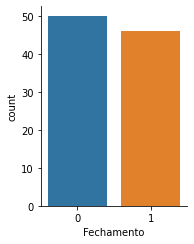

In [107]:
sns.catplot(x="Fechamento",
                data=df_test,
                kind="count", height=3.5, aspect=.8)

## 7.2 Separação entre Treino/Validação - Amostragem Sistemática
- De forma que ambas amostras representem equitativamente e proporcionalmente todo o espaço temporal (Jan de 2020 á Dez 2021), portanto, realizaremos amostragem sistemática definindo um intervalo dependente da proporção treino/validação desejada.

Para proporção de 33% validação e 66% treino o intervalo para amostragem é de 3 ( para representar todo o espaço temporal )

In [108]:
indices_validacao = np.arange(0,len(df_treino_valid),3)
indices_validacao_lista = indices_validacao.tolist()

In [109]:
#cria array com todos os indexes
indices_train = np.arange(0,len(df_treino_valid),1)
indices_train_lista = indices_train.tolist()

# seleciona os indexes que nao estejam na validacao
indices_train_lista = [ i for i in indices_train_lista if i not in indices_validacao_lista]

#transforma para array
indices_train = np.array(indices_train)

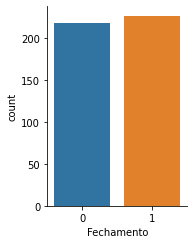

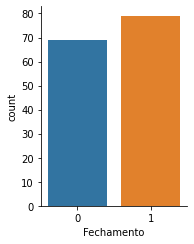

In [110]:
df_train =  df_treino_valid.iloc[indices_train]
X_train = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_train = df_train['Fechamento']

df_valid = df_treino_valid.iloc[indices_validacao]
X_valid = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_valid = df_valid['Fechamento']


sns.catplot(x="Fechamento",
                data=df_train,
                kind="count", height=3.5, aspect=.8)

sns.catplot(x="Fechamento",
                data=df_valid,
                kind="count", height=3.5, aspect=.8)



In [111]:
len(df_valid)/len(df_train)

0.3340857787810384

# 8.0 Consolidação dos dados de diversas versões do sentilex (repetição e automação das etapas 5, 6, e 7)

In [57]:
## Função para montar dicionarios
def montar_dicionario(versao_sentilex):
    versao = 'Versoes dicionarios sentilex/SentiLex-lem-PT01 editado v' + versao_sentilex + '.txt'
    sentilexpt = open(versao,'r',encoding='utf-8-sig')
    dic_palavra_polaridade = {}
    
    for i in sentilexpt.readlines():
        pos_ponto = i.find('.')            # obtem a posiçãodo caracter ponto
        palavra = (i[:pos_ponto])          # Pega a palavra
        pol_pos = i.find('POL')            # obtem a posição do inicio da string POL
        polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')         # obtem a polaridade da palavra
        #polaridade = (i[pol_pos+4:pol_pos+7]).replace(';','')
        dic_palavra_polaridade[palavra] = polaridade                  # atualiza o dicionario com a palavra a polaridade
    
    return dic_palavra_polaridade


## Funçao para retornar o score do sentimento lendo o dicionario
def Score_sentimento(frase):
    frase = frase.lower()                     # coloca toda a frase em minusculo
    l_sentimento = []                         # cria uma lista vazia
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade
        #l_sentimento.append(float(dic_palavra_polaridade.get(p, 0)))      # para cada palavra obtem a polaridade     
    #print (l_sentimento)                                                # imprime a lista de polaridades
    score = sum(l_sentimento)                                           # soma todos os valores da lista
    #if score > 0:
        #return 'Positivo, Score:{}'.format(score)                       # se maior que 0 retorna 'positivo'
    #elif score == 0:
        #return 'Neutro, Score:{}'.format(score)                         # se igual a 0 retorna 'neutro'
    #else:
        #return 'Negativo, Score:{}'.format(score)                       # se menor que 0 retorna 'negativo'
        
    return score

In [58]:
df_final = pd.read_csv('Alldata_with_features.csv', sep=',')
df_final['Date'] = pd.to_datetime(df_final['Date'])
df_final

,Date,Adj Close,Volume,Var%,Fechamento,Noticias,score,Noticia_traduzida,polaridade_vad,subjetividade_vad,negatividade_vad,neutralidade_vad,positividade_vad,composicao_vad,neg_rob,neu_rob,pos_rob,pos_finbert,neg_finbert,neu_finbert
0,2020-01-02,20.47,37774500,0.02,1,petrobras e vale retiram seus funcionários de...,0,petrobras and vale withdraw their employees fr...,0.00,0.00,0.09,0.92,0.00,-0.38,0.72,0.27,0.01,0.00,-1.00,0.00
1,2020-01-03,20.30,71595600,-0.01,0,petrobras reduz preços do diesel e da gasolin...,0,petrobras reduces diesel and gasoline prices a...,0.00,0.00,0.00,1.00,0.00,0.00,0.13,0.78,0.09,1.00,0.00,0.00
2,2020-01-06,20.54,81844000,0.01,1,petrobras faz redução em produção de petróle...,0,petrobras makes reduction in oil production an...,0.00,0.00,0.04,0.93,0.04,0.00,0.08,0.85,0.07,0.00,0.00,1.00
3,2020-01-07,20.46,32822000,-0.00,0,o adeus da petrobras ao amazonas petrobras vê...,0,petrobras goodbye to amazons petrobras sees mo...,0.50,0.50,0.03,0.97,0.00,-0.03,0.03,0.80,0.17,0.00,0.00,0.93
4,2020-01-09,20.27,36102700,-0.00,0,refinarias da petrobras apresentam queda na c...,0,Petrobras refineries show a drop in global oil...,0.00,0.12,0.15,0.85,0.00,-0.27,0.29,0.68,0.03,0.00,-1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2022-06-24,26.29,53413400,-0.01,0,comitê de elegibilidade da petrobras dá aval ...,0,petrobras eligibility committee approves caio ...,0.07,0.36,0.05,0.83,0.12,0.69,0.24,0.69,0.07,0.00,0.00,1.00
539,2022-06-27,27.98,90417700,0.06,1,caio andrade nega recomendação do governo pa...,-1,caio andrade denies government recommendation ...,-0.04,0.32,0.10,0.88,0.03,-0.97,0.61,0.38,0.01,0.00,0.00,1.00
540,2022-06-28,28.33,51388000,0.01,1,petrobras: novo presidente não conseguirá mud...,0,petrobras: new president will not be able to c...,0.17,0.41,0.06,0.92,0.02,-0.40,0.31,0.65,0.04,0.00,0.00,0.99
541,2022-06-29,28.08,52048800,-0.01,0,paes de andrade falta à primeira reunião do c...,0,paes de andrade misses first meeting of petrob...,0.14,0.39,0.04,0.83,0.13,0.88,0.41,0.57,0.03,0.00,0.00,1.00


In [617]:
versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
dict_dados_variacoes_sentilex = {}

correlacoes = []

for versao in versoes_sentilex:
    
    #print(versao)
    ## Atualizando Score Sentilex (Etapa 5.1)
    dic_palavra_polaridade  = montar_dicionario(versao)

    ### Copia o df atualiza o score do dicionário recém-lido
    df_final99 = df_final.copy()
    
    df_final99['score'] = df_final99['Noticias'].apply(lambda x: Score_sentimento(str(x)))
    
    ### Criação de novas features combinadas
    #df_final99['pos_combinada'] = (df_final99['positividade_vad'] * df_final99['pos_rob'] * df_final99['pos_finbert'])**1/2
    #df_final99['neg_combinada'] = (df_final99['negatividade_vad'] * df_final99['neg_rob'] * df_final99['neg_finbert'])**1/2
    #df_final99['neu_combinada'] = (df_final99['neutralidade_vad'] * df_final99['neu_rob'] * df_final99['neu_finbert'])**1/2
    
    
    #pesos_aleatorios = np.random.random(3).tolist()
    #pesos_aleatorios
    
    #df_final99['pos_teste'] = 3* df_final99['positividade_vad'] + 2* df_final99['pos_rob'] + 1*df_final99['pos_finbert']
    #df_final99['neg_teste'] = 2* df_final99['negatividade_vad'] + 3* df_final99['neg_rob'] + 1*df_final99['neg_finbert']
    #df_final99['neu_teste'] = 1* df_final99['neutralidade_vad'] + 3* df_final99['neu_rob'] + 2* df_final99['neu_finbert']
        
    #corr_pos = df_final99.corr().iloc[20, 3]
    #corr_neg = df_final99.corr().iloc[21, 3]
    #corr_neu = df_final99.corr().iloc[22, 3]
    
    #correlacoes.append(np.array([corr_pos,corr_neg,corr_neu,pesos_aleatorios[0],pesos_aleatorios[1],pesos_aleatorios[2]]))
    
    #df_final99['pos_teste'] = 3* df_final99['positividade_vad'] + 2* df_final99['pos_rob'] + 1*df_final99['pos_finbert']
    #df_final99['neg_teste'] = 2* df_final99['negatividade_vad'] + 3* df_final99['neg_rob'] + 1*df_final99['neg_finbert']
    #df_final99['neu_teste'] = 1* df_final99['neutralidade_vad'] + 3* df_final99['neu_rob'] + 2* df_final99['neu_finbert']
    
    
    features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
    'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert']
    
    #features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad', 'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert','pos_combinada','neg_combinada','neu_combinada']
    
    featuresd1 = [i + "d1" for i in features]
    featuresd2 = [i + "d2" for i in features]
    featuresd3 = [i + "d3" for i in features]
    featuresd4 = [i + "d4" for i in features]


    #Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
    for i in features:
        df_final99[i+"d1"] = 0
        df_final99[i+"d2"] = 0
        df_final99[i+"d3"] = 0
        df_final99[i+"d4"] = 0


    import itertools

    #atualiza as features de d-1
    for a,b in itertools.zip_longest(features,featuresd1):
        df_final99[b] = df_final99.shift(periods=1)[a]

    #atualiza as features de d-2
    for a,b in itertools.zip_longest(features,featuresd2):
        df_final99[b] = df_final99.shift(periods=2)[a]

    #atualiza as features de d-3
    for a,b in itertools.zip_longest(features,featuresd3):
        df_final99[b] = df_final99.shift(periods=3)[a]

    #atualiza as features de d-4
    for a,b in itertools.zip_longest(features,featuresd4):
        df_final99[b] = df_final99.shift(periods=4)[a]


    df_final99 = df_final99.dropna()


    ## Aplicando mesma reamostragem

    from dateutil import parser
    df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2021-12-31'))]
    df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31'))]
    #df_test.Date.unique()

    indices_validacao = np.arange(0,len(df_treino_valid),3)
    indices_validacao_lista = indices_validacao.tolist()

    #cria array com todos os indexes
    indices_train = np.arange(0,len(df_treino_valid),1)
    indices_train_lista = indices_train.tolist()

    # seleciona os indexes que nao estejam na validacao para compor o treino
    indices_train_lista = [ i for i in indices_train_lista if i not in indices_validacao_lista]
    
    #transforma para array
    indices_train = np.array(indices_train_lista)

    # Redefinindo os datasets
    df_train =  df_treino_valid.iloc[indices_train]                 
                   
    df_valid = df_treino_valid.iloc[indices_validacao]
                      
    
    dict_dados_variacoes_sentilex[versao] = [df_train,df_valid,df_test]

## 8.1 Etapa adicional: Feature Engineering (gerando featurs a partir da combinação linear de todas as features)

- Método: Combinação linear aleatoria entre 3 features avaliando a correlação da combinação Vs correlação das variáveis únicas.

In [579]:
df_final99.corr().sort_values(by = 'Fechamento', ascending = False).head()

,Adj Close,Volume,Var%,Fechamento,score,polaridade_vad,subjetividade_vad,negatividade_vad,neutralidade_vad,positividade_vad,...,neu_finbertd1,neu_finbertd2,neu_finbertd3,neu_finbertd4,comp1,comp2,comp3,comp4,comp5,comp6
Fechamento,0.047850,-0.008048,0.617627,1.000000,-0.030747,-0.017941,0.040600,-0.092427,0.041607,0.031688,...,0.069374,0.088502,-0.036006,0.037677,0.011842,0.013758,0.001498,0.003597,0.005725,0.009281
Var%,0.033939,-0.109499,1.000000,0.617627,-0.074497,-0.054027,0.012711,-0.082030,0.038650,0.025910,...,-0.003385,0.101303,-0.047854,-0.013726,0.030702,0.029692,-0.007576,0.008149,0.003430,0.023101
neu_robd4,-0.011097,-0.053229,0.041370,0.130432,0.036869,0.060605,0.076603,-0.073941,-0.005832,0.073018,...,-0.008935,0.019234,0.036225,0.337176,0.021040,0.031389,0.060561,0.038218,0.055628,0.028335
neg_finbertd2,0.054598,0.000976,0.132745,0.102643,-0.034427,-0.077227,0.029947,-0.015075,0.040299,-0.035912,...,0.079468,0.660453,0.031825,-0.060754,-0.014272,-0.022017,-0.061211,-0.038871,-0.052653,-0.023846
neu_finbertd2,0.071998,-0.074277,0.101303,0.088502,-0.026562,-0.040469,0.039032,-0.024178,-0.000466,0.022137,...,0.061769,1.000000,0.051695,-0.002075,-0.003647,-0.003723,-0.024306,-0.017968,-0.018715,-0.008749


In [602]:
from random import sample

#correlacoes = []
lista_colunas_para_sorteio = df_final99.columns.tolist()[8:72] + ['score']

for i in range(1000000):
    
    print(i)  
    
    ## Definição dos pesos
    fator_mult = random.randint(1, 3)
    pesos_aleatorios = np.random.random(3).tolist()
    p1 = pesos_aleatorios[0] * fator_mult
    p2 = pesos_aleatorios[1] * fator_mult
    p3 = pesos_aleatorios[2] * fator_mult
    
    ## Definição das colunas:
    amostras = sample(range(0,64,1), 3)
    
    var1 = lista_colunas_para_sorteio[amostras[0]]
    var2 = lista_colunas_para_sorteio[amostras[1]]
    var3 = lista_colunas_para_sorteio[amostras[2]]
    
    ## Calculando correlação da var sorteada
    corr_var1 = df_final99.corr()[var1][3]
    corr_var2 = df_final99.corr()[var2][3]
    corr_var3 = df_final99.corr()[var3][3]
    
    max_corr_var_sorteadas = max(corr_var1,corr_var2,corr_var3)
    
    df_final99['comp1'] = p1 * df_final99[var1] + p2 * df_final99[var2] + p3 * df_final99[var3]
    df_final99['comp2'] = p1 * df_final99[var1] + p3 * df_final99[var2] + p2 * df_final99[var3]
    df_final99['comp3'] = p2 * df_final99[var1] + p1 * df_final99[var2] + p3 * df_final99[var3]
    df_final99['comp4'] = p2 * df_final99[var1] + p3 * df_final99[var2] + p1 * df_final99[var3]
    df_final99['comp5'] = p3 * df_final99[var1] + p1 * df_final99[var2] + p2 * df_final99[var3]
    df_final99['comp6'] = p3 * df_final99[var1] + p2 * df_final99[var2] + p3 * df_final99[var3]

    
    
    #df_final99['pos_teste'] = p1 * df_final99['positividade_vad'] + p2 * df_final99['pos_rob'] + p3 * df_final99['pos_finbert']
    #df_final99['neg_teste'] = p1 * df_final99['negatividade_vad'] + p2 * df_final99['neg_rob'] + p3 * df_final99['neg_finbert']
    #df_final99['neu_teste'] = p1 * df_final99['neutralidade_vad'] + p2 * df_final99['neu_rob'] + p3 * df_final99['neu_finbert']

    corr1 = df_final99.corr().iloc[69:, 3][0]
    corr2 = df_final99.corr().iloc[69:, 3][1]
    corr3 = df_final99.corr().iloc[69:, 3][2]
    corr4 = df_final99.corr().iloc[69:, 3][3]
    corr5 = df_final99.corr().iloc[69:, 3][4]
    corr6 = df_final99.corr().iloc[69:, 3][5]

    if corr1<0:
        corr1 = -1 * corr1
    if corr2<0:
        corr2 = -1 * corr2    
    if corr3<0:
        corr3 = -1 * corr3
    if corr4<0:
        corr4 = -1 * corr4        
    if corr5<0:
        corr5 = -1 * corr5        
    if corr6<0:
        corr6 = -1 * corr6
        
    melhor_corr = max(corr1,corr2,corr3,corr4,corr5,corr6)
    
    ## Sò armazena os resultados se a melhor correlação das combinações testadas for maior das variaveis individuais sorteadas
    if melhor_corr > max_corr_var_sorteadas:
        correlacoes.append(np.array([melhor_corr,var1,var2,var3,p1,p2,p3,corr1,corr2,corr3,corr4,corr5,corr6]))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062


3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618


10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
1021

11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
1158

12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
1295

14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
1432

15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
1568

16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
1705

18256
18257
18258
18259
18260
18261
18262
18263
18264
18265
18266
18267
18268
18269
18270
18271
18272
18273
18274
18275
18276
18277
18278
18279
18280
18281
18282
18283
18284
18285
18286
18287
18288
18289
18290
18291
18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
1842

19622
19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
1978

20990
20991
20992
20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
2115

22357
22358
22359
22360
22361
22362
22363
22364
22365
22366
22367
22368
22369
22370
22371
22372
22373
22374
22375
22376
22377
22378
22379
22380
22381
22382
22383
22384
22385
22386
22387
22388
22389
22390
22391
22392
22393
22394
22395
22396
22397
22398
22399
22400
22401
22402
22403
22404
22405
22406
22407
22408
22409
22410
22411
22412
22413
22414
22415
22416
22417
22418
22419
22420
22421
22422
22423
22424
22425
22426
22427
22428
22429
22430
22431
22432
22433
22434
22435
22436
22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
2252

23725
23726
23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
23743
23744
23745
23746
23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
23774
23775
23776
23777
23778
23779
23780
23781
23782
23783
23784
23785
23786
23787
23788
23789
23790
23791
23792
23793
23794
23795
23796
23797
23798
23799
23800
23801
23802
23803
23804
23805
23806
23807
23808
23809
23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
2389

25093
25094
25095
25096
25097
25098
25099
25100
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25167
25168
25169
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
2525

26459
26460
26461
26462
26463
26464
26465
26466
26467
26468
26469
26470
26471
26472
26473
26474
26475
26476
26477
26478
26479
26480
26481
26482
26483
26484
26485
26486
26487
26488
26489
26490
26491
26492
26493
26494
26495
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
2662

KeyboardInterrupt: 

In [624]:
#resultados_correlacoes_df = pd.DataFrame(np.array(correlacoes), columns=['melhor_corr','var1','var2','var3','p1','p2','p3','comb1','comb2','comb3','comb4','comb5','comb6'])
#resultados_correlacoes_df.sort_values(by = 'melhor_corr', ascending = False).head(5)

In [622]:
## Os seguintes resultados compõe as melhores combinações de features:

# corr = 0.099
df_final99['combinacao1'] = 0.060719118247568815 * df_final99['subjetividade_vad'] + 0.6259242968314084 * df_final99['neutralidade_vad'] + 0.7141001777794133 * df_final99['positividade_vad']
# corr = 0.179
df_final99['combinacao2'] = 0.1975138370186572 * df_final99['neu_finbertd1'] +  0.26367223378473537 * df_final99['neg_finbertd2'] + 0.7954443769308506 * df_final99['neu_robd4']
# corr = 0.174
df_final99['combinacao3'] = 1.264131299137323 * df_final99['neu_rob'] + 1.4796992822690314 * df_final99['neu_robd4'] + 1.264131299137323 * df_final99['neg_finbertd2']
# corr = 0.172
df_final99['combinacao4'] = 2.8498404816391836 * df_final99['neu_robd4'] + 1.5544953783606055 * df_final99['neg_finbertd2'] + 0.6276230669224906 * df_final99['subjetividade_vad']
# corr = 0.1595
df_final99['combinacao5'] = 0.4764943969243103 * df_final99['neu_finbertd2'] + 1.6455811654511971 * df_final99['neu_robd4'] + 1.2818211500203125 * df_final99['positividade_vadd2']
# corr = 0.1514
df_final99['combinacao6'] = 0.239031592216275 * df_final99['neu_rob'] + 0.12697822481213494 * df_final99['neg_finbertd1'] + 0.30078124336283985 * df_final99['neu_robd4']

df_final99.corr().tail(6)

,Adj Close,Volume,Var%,Fechamento,score,polaridade_vad,subjetividade_vad,negatividade_vad,neutralidade_vad,positividade_vad,...,neu_finbertd1,neu_finbertd2,neu_finbertd3,neu_finbertd4,combinacao1,combinacao2,combinacao3,combinacao4,combinacao5,combinacao6
combinacao1,0.040042,-0.074160,0.080235,0.099911,0.061082,0.196160,0.407762,-0.923455,0.406005,0.327922,...,0.062053,0.037800,0.037146,0.027769,1.000000,0.116300,0.238930,0.171200,0.096805,0.305285
combinacao2,0.033718,-0.053562,0.089051,0.179119,0.030880,0.018616,0.097146,-0.088113,0.033702,0.037438,...,0.480969,0.331552,0.039726,0.269010,0.116300,1.000000,0.720726,0.859532,0.806194,0.670136
combinacao3,0.030262,-0.060402,0.138359,0.174304,0.043217,-0.022929,0.064495,-0.244921,0.172920,0.006999,...,0.069982,0.519258,0.074077,0.120232,0.238930,0.720726,1.000000,0.846404,0.680431,0.585138
combinacao4,0.055799,-0.039450,0.121846,0.172871,0.010433,0.065916,0.282825,-0.075511,0.010870,0.053926,...,0.057401,0.464179,0.040821,0.216752,0.171200,0.859532,0.846404,1.000000,0.842810,0.494142
combinacao5,0.033594,-0.092227,0.089290,0.159589,0.002727,0.022488,0.088184,-0.066563,0.002087,0.056771,...,0.030056,0.537002,0.054778,0.282549,0.096805,0.806194,0.680431,0.842810,1.000000,0.569995
combinacao6,0.004419,-0.050825,0.053015,0.151405,0.103995,0.039415,0.064276,-0.312889,0.185948,0.052016,...,0.328869,0.042525,0.033859,0.258597,0.305285,0.670136,0.585138,0.494142,0.569995,1.000000


# Atualizando o dicionário com as novas features:

In [700]:
versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
dict_dados_variacoes_sentilex = {}

correlacoes = []

for versao in versoes_sentilex:
    
    #print(versao)
    ## Atualizando Score Sentilex (Etapa 5.1)
    dic_palavra_polaridade  = montar_dicionario(versao)

    ### Copia o df atualiza o score do dicionário recém-lido
    df_final99 = df_final.copy()
    
    df_final99['score'] = df_final99['Noticias'].apply(lambda x: Score_sentimento(str(x)))
    
    ### Criação de novas features combinadas
    #df_final99['pos_combinada'] = (df_final99['positividade_vad'] * df_final99['pos_rob'] * df_final99['pos_finbert'])**1/2
    #df_final99['neg_combinada'] = (df_final99['negatividade_vad'] * df_final99['neg_rob'] * df_final99['neg_finbert'])**1/2
    #df_final99['neu_combinada'] = (df_final99['neutralidade_vad'] * df_final99['neu_rob'] * df_final99['neu_finbert'])**1/2
    
    
    #pesos_aleatorios = np.random.random(3).tolist()
    #pesos_aleatorios
    
    #df_final99['pos_teste'] = 3* df_final99['positividade_vad'] + 2* df_final99['pos_rob'] + 1*df_final99['pos_finbert']
    #df_final99['neg_teste'] = 2* df_final99['negatividade_vad'] + 3* df_final99['neg_rob'] + 1*df_final99['neg_finbert']
    #df_final99['neu_teste'] = 1* df_final99['neutralidade_vad'] + 3* df_final99['neu_rob'] + 2* df_final99['neu_finbert']
        
    #corr_pos = df_final99.corr().iloc[20, 3]
    #corr_neg = df_final99.corr().iloc[21, 3]
    #corr_neu = df_final99.corr().iloc[22, 3]
    
    #correlacoes.append(np.array([corr_pos,corr_neg,corr_neu,pesos_aleatorios[0],pesos_aleatorios[1],pesos_aleatorios[2]]))
    
    #df_final99['pos_teste'] = 3* df_final99['positividade_vad'] + 2* df_final99['pos_rob'] + 1*df_final99['pos_finbert']
    #df_final99['neg_teste'] = 2* df_final99['negatividade_vad'] + 3* df_final99['neg_rob'] + 1*df_final99['neg_finbert']
    #df_final99['neu_teste'] = 1* df_final99['neutralidade_vad'] + 3* df_final99['neu_rob'] + 2* df_final99['neu_finbert']
    
    
    features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad',
    'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert']
    
    #features = ['polaridade_vad', 'subjetividade_vad', 'negatividade_vad', 'neutralidade_vad', 'positividade_vad', 'composicao_vad','score', 'neg_rob','neu_rob','pos_rob','pos_finbert', 'neg_finbert', 'neu_finbert','pos_combinada','neg_combinada','neu_combinada']
    
    featuresd1 = [i + "d1" for i in features]
    featuresd2 = [i + "d2" for i in features]
    featuresd3 = [i + "d3" for i in features]
    featuresd4 = [i + "d4" for i in features]


    #Criando as colunas de features para d-1, d-2, d-3, d-4 e inicializando com valores zeros:
    for i in features:
        df_final99[i+"d1"] = 0
        df_final99[i+"d2"] = 0
        df_final99[i+"d3"] = 0
        df_final99[i+"d4"] = 0


    import itertools

    #atualiza as features de d-1
    for a,b in itertools.zip_longest(features,featuresd1):
        df_final99[b] = df_final99.shift(periods=1)[a]

    #atualiza as features de d-2
    for a,b in itertools.zip_longest(features,featuresd2):
        df_final99[b] = df_final99.shift(periods=2)[a]

    #atualiza as features de d-3
    for a,b in itertools.zip_longest(features,featuresd3):
        df_final99[b] = df_final99.shift(periods=3)[a]

    #atualiza as features de d-4
    for a,b in itertools.zip_longest(features,featuresd4):
        df_final99[b] = df_final99.shift(periods=4)[a]


    df_final99 = df_final99.dropna()

    
    
    ## Adição das features recém criadas (combinações)
    # corr = 0.099
    df_final99['combinacao1'] = 0.060719118247568815 * df_final99['subjetividade_vad'] + 0.6259242968314084 * df_final99['neutralidade_vad'] + 0.7141001777794133 * df_final99['positividade_vad']
    # corr = 0.179
    df_final99['combinacao2'] = 0.1975138370186572 * df_final99['neu_finbertd1'] +  0.26367223378473537 * df_final99['neg_finbertd2'] + 0.7954443769308506 * df_final99['neu_robd4']
    # corr = 0.174
    df_final99['combinacao3'] = 1.264131299137323 * df_final99['neu_rob'] + 1.4796992822690314 * df_final99['neu_robd4'] + 1.264131299137323 * df_final99['neg_finbertd2']
    # corr = 0.172
    df_final99['combinacao4'] = 2.8498404816391836 * df_final99['neu_robd4'] + 1.5544953783606055 * df_final99['neg_finbertd2'] + 0.6276230669224906 * df_final99['subjetividade_vad']
    # corr = 0.1595
    df_final99['combinacao5'] = 0.4764943969243103 * df_final99['neu_finbertd2'] + 1.6455811654511971 * df_final99['neu_robd4'] + 1.2818211500203125 * df_final99['positividade_vadd2']
    # corr = 0.1514
    df_final99['combinacao6'] = 0.239031592216275 * df_final99['neu_rob'] + 0.12697822481213494 * df_final99['neg_finbertd1'] + 0.30078124336283985 * df_final99['neu_robd4']



    ## Aplicando mesma reamostragem

    from dateutil import parser
    df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2021-12-31'))]
    df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31'))]
  
    
    #df_treino_valid = df_final99[(df_final99['Date'] <= parser.parse('2022-03-31'))] 
    #df_test = df_final99[(df_final99['Date'] > parser.parse('2021-12-31')) & (df_final99['Date'] <= parser.parse('2022-03-31'))]
    #df_test = df_final99[(df_final99['Date'] > parser.parse('2022-03-31'))]

    
    indices_validacao = np.arange(0,len(df_treino_valid),3)
    indices_validacao_lista = indices_validacao.tolist()

    #cria array com todos os indexes
    indices_train = np.arange(0,len(df_treino_valid),1)
    indices_train_lista = indices_train.tolist()

    # seleciona os indexes que nao estejam na validacao para compor o treino
    indices_train_lista = [ i for i in indices_train_lista if i not in indices_validacao_lista]
    
    #transforma para array
    indices_train = np.array(indices_train_lista)

    # Redefinindo os datasets
    df_train =  df_treino_valid.iloc[indices_train]                 
                   
    df_valid = df_treino_valid.iloc[indices_validacao]
                      
    
    dict_dados_variacoes_sentilex[versao] = [df_train,df_valid,df_test]

os dados de validação correspondem a 33% dos dados de teste

# 9.0 Prototipação

Iremos treinar modelos ingenuos com dados de treino e verificar quais deles performam melhor em:

- Dados de validação (2020 e 2021): Para avaliar a capacidade de generalização dos algoritmos
- Dados de teste (2022): Para avaliar a performance em dados de produção.

A ideia inicial é analisar o potencial de generalização de cada algorítmo assim como a performance em produção, para isso o experimento será repetido 10x treinando o modelo com um conjunto distinto composto por 80% dos dados de treino a cada repetição.


Pipeline:

-> Seleção da versao do sentilex (20 versões) -> Holdout aleatório de 80% dos dados de treino -> Aplicação de PCA / Normalização / Dados brutos (3 técnicas de pré-processamento) -> Treino -> Avaliação sobre dados de validação / Avaliação sobre dados de teste -> Repete 10x

In [653]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models_valid = pd.DataFrame()
df_models_test = pd.DataFrame()

#Loop numero de repetições do experimento
for rep in range(2):
    
   ##Loop do dicionário Sentilex Escolhido: 
    for versao in dict_dados_variacoes_sentilex.keys():
        
        print("Iterando versão do sentilex = {} - Repetição = {}".format(versao,rep))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_valid2 = df_valid['Fechamento']


        #Definindo dados de treino (aprendendo com 70% da amostra de treino)
        X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train2, y_train2, test_size=0.8, random_state=rep, stratify = y_train2)
            
        #X_train4 = X_train2
        #y_train4 = y_train2 
        

        # Normalizando
        scaler = StandardScaler()
        scaler.fit(X_train4)
        X_train_norm = scaler.transform(X_train4)
        
        scaler.fit(X_test2)
        X_test_norm = scaler.transform(X_test2)
        
        scaler.fit(X_valid2)
        X_valid_norm = scaler.transform(X_valid2)
        
        
        ########################### Previsao dados validação ###########################
        #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)
        
        ########################### Previsao dados teste ###########################
                #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        
         ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA) de 2 a 10 reduções
        for i in range(2,10,1): 

            #Aplicando PCA
            pca = PCA(n_components=i)
            X_train_pca = pca.fit_transform(X_train4)
            X_test_pca = pca.fit_transform(X_test2)
            X_valid_pca = pca.fit_transform(X_valid2)

            #Aplicando Normalização
            scaler = StandardScaler()

            scaler.fit(X_train_pca)
            X_train_pca_normalized = scaler.transform(X_train_pca)
            
            scaler.fit(X_test_pca)
            X_test_pca_normalized = scaler.transform(X_test_pca)
            
            scaler.fit(X_valid_pca)
            X_valid_pca_normalized = scaler.transform(X_valid_pca)


            ########################### Previsao dados validação ###########################
            
            #Testando PCA + normalizado 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_valid_pca_normalized, y_train4, y_valid2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_valid_pca, y_train4, y_valid2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True) 
            
            ########################### Previsao dados teste ###########################
            
            #Testando PCA + normalizado
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_test_pca_normalized, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_test_pca, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

Iterando versão do sentilex = 65_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.52it/s]


Iterando versão do sentilex = 65_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.20it/s]


Iterando versão do sentilex = 65_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.05it/s]


Iterando versão do sentilex = 65_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.37it/s]


Iterando versão do sentilex = 65_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.47it/s]


Iterando versão do sentilex = 70_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.53it/s]


Iterando versão do sentilex = 70_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.67it/s]


Iterando versão do sentilex = 70_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.13it/s]


Iterando versão do sentilex = 70_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.08it/s]


Iterando versão do sentilex = 70_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.03it/s]


Iterando versão do sentilex = 75_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.30it/s]


Iterando versão do sentilex = 75_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.47it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.60it/s]


Iterando versão do sentilex = 75_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.34it/s]


Iterando versão do sentilex = 75_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.36it/s]


Iterando versão do sentilex = 80_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.28it/s]


Iterando versão do sentilex = 80_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.32it/s]


Iterando versão do sentilex = 80_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 15.27it/s]


Iterando versão do sentilex = 80_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.20it/s]


Iterando versão do sentilex = 80_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.77it/s]


Iterando versão do sentilex = 65_1 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.21it/s]


Iterando versão do sentilex = 65_2 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.94it/s]


Iterando versão do sentilex = 65_3 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 22.78it/s]


Iterando versão do sentilex = 65_4 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.41it/s]


Iterando versão do sentilex = 65_5 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.21it/s]


Iterando versão do sentilex = 70_1 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.04it/s]


Iterando versão do sentilex = 70_2 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.32it/s]


Iterando versão do sentilex = 70_3 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.36it/s]


Iterando versão do sentilex = 70_4 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.92it/s]


Iterando versão do sentilex = 70_5 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 25.51it/s]


Iterando versão do sentilex = 75_1 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.83it/s]


Iterando versão do sentilex = 75_2 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.37it/s]


Iterando versão do sentilex = 75_3 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.87it/s]


Iterando versão do sentilex = 75_4 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.01it/s]


Iterando versão do sentilex = 75_5 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 80_1 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 38.85it/s]


Iterando versão do sentilex = 80_2 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.11it/s]


Iterando versão do sentilex = 80_3 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.08it/s]


Iterando versão do sentilex = 80_4 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 39.43it/s]


Iterando versão do sentilex = 80_5 - Repetição = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.52it/s]


In [657]:
pd.set_option('display.precision',5)

In [658]:
pd.reset_option('^display.',silent=True)

In [697]:
df_prototipacao = pd.merge(left = df_models_valid, right = df_models_test, how = 'left', on = ['Model','n_PCA','versao_sentilex','Normalizacao'], suffixes=('_valid', '_test'))

##Media acuracia teste e valid
df_prototipacao['Acuracia_balanc_test_valid'] = (df_prototipacao['Accuracy_valid'] + df_prototipacao['Accuracy_test'])/2

#df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Balanced Accuracy_valid':np.mean, 'ROC AUC_valid':np.mean, 'F1 Score_valid':np.mean, 'Accuracy_test':np.mean, 'Balanced Accuracy_test':np.mean, 'ROC AUC_test':np.mean, 'F1 Score_test':np.mean}).sort_values(by='ROC AUC_valid', ascending=False).head(50)
df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False).head(50)

## Agrupa os resultados e retorna acuracy_teste > 60 e ordena por acuracy_valid
df_agrupado = df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False)
df_filtrado = df_agrupado[(df_agrupado['Accuracy_test']>0.6)].sort_values(by='Accuracy_valid', ascending=False)
df_filtrado.head(50)

Accuracy_valid  \
Model                       n_PCA versao_sentilex Normalizacao                   
DecisionTreeClassifier      5     75_5            SIM                 0.644172   
LinearSVC                   7     75_5            SIM                 0.625767   
LogisticRegression          N/A   70_2            SIM                 0.619632   
BaggingClassifier           6     75_5            SIM                 0.613497   
LogisticRegression          N/A   70_4            SIM                 0.613497   
LinearSVC                   7     75_4            SIM                 0.613497   
LogisticRegression          7     75_5            NAO                 0.613497   
                            N/A   70_3            SIM                 0.613497   
BaggingClassifier           6     75_5            NAO                 0.607362   
CalibratedClassifierCV      7     75_5            NAO                 0.607362   
                            6     75_4            NAO                 0.601227   
NearestCentroid             9     70_2            SIM                 0.601227   
RidgeClassifier             9     70_2            SIM                 0.595092   
CalibratedClassifierCV      7     75_4            NAO                 0.595092   
LGBMClassifier              8     75_3            SIM                 0.595092   
RidgeClassifierCV           9     70_2            SIM                 0.595092   
LinearDiscriminantAnalysis  9     70_2            SIM                 0.595092   
Perceptron                  8     75_4            SIM                 0.595092   
SGDClassifier               N/A   70_2            SIM                 0.595092   
BaggingClassifier           5     75_4            NAO                 0.588957   
LinearSVC                   7     75_5            NAO                 0.588957   
RidgeClassifierCV           7     75_3            NAO                 0.588957   
PassiveAggressiveClassifier 4     75_5            NAO                 0.588957   
LogisticRegression          7     75_4            NAO                 0.588957   
DecisionTreeClassifier      5     75_5            NAO                 0.588957   
                            7     75_3            SIM                 0.588957   
LogisticRegression          6     75_3            NAO                 0.588957   
BaggingClassifier           7     75_5            NAO                 0.582822   
XGBClassifier               8     75_5            SIM                 0.582822   
DecisionTreeClassifier      8     75_5            SIM                 0.582822   
LinearSVC                   7     75_4            NAO                 0.582822   
CalibratedClassifierCV      6     75_3            NAO                 0.582822   
LGBMClassifier              8     75_5            NAO                 0.576687   
XGBClassifier               8     75_3            SIM                 0.576687   
PassiveAggressiveClassifier 4     75_4            SIM                 0.576687   
LinearSVC                   6     75_3            NAO                 0.576687   
RidgeClassifierCV           9     70_1            SIM                 0.576687   
RandomForestClassifier      9     75_4            NAO                 0.576687   
LGBMClassifier              8     75_3            NAO                 0.576687   
PassiveAggressiveClassifier 4     75_4            NAO                 0.576687   
AdaBoostClassifier          9     75_5            SIM                 0.576687   
BaggingClassifier           5     75_5            NAO                 0.576687   
LinearDiscriminantAnalysis  N/A   70_2            SIM                 0.570552   
RidgeClassifier             N/A   70_2            SIM                 0.570552   
RidgeClassifierCV           N/A   70_2            SIM                 0.570552   
LogisticRegression          7     75_3            NAO                 0.570552   
AdaBoostClassifier          8     75_5            SIM                 0.570552   
XGBClassifier               7     75_5        

## Prototipação com features de maior correlação com fechamento

- Treinamento realizado até 03/2022, avaliação sobre dados de teste de 03/2022 á 06/2022

In [694]:
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
    
df_models_valid = pd.DataFrame()
df_models_test = pd.DataFrame()
feat = ['combinacao1','combinacao2','combinacao3','combinacao4','combinacao5','combinacao6','neu_robd4','neg_finbertd2','neu_finbertd2','neg_robd4','negatividade_vad','score']


#Loop numero de repetições do experimento
for rep in range(1):
    
   ##Loop do dicionário Sentilex Escolhido: 
    for versao in dict_dados_variacoes_sentilex.keys():
        
        print("Iterando versão do sentilex = {} - Repetição = {}".format(versao,rep))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        X_test2 = X_test2[feat]
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        X_train2 = X_train2[feat]
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        X_valid2 = X_valid2[feat]
        y_valid2 = df_valid['Fechamento']


        #Definindo dados de treino (aprendendo com 70% da amostra de treino)
        X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train2, y_train2, test_size=0.8, random_state=rep, stratify = y_train2)
            
        #X_train4 = X_train2
        #y_train4 = y_train2 
        

        # Normalizando
        scaler = StandardScaler()
        scaler.fit(X_train4)
        X_train_norm = scaler.transform(X_train4)
        
        scaler.fit(X_test2)
        X_test_norm = scaler.transform(X_test2)
        
        scaler.fit(X_valid2)
        X_valid_norm = scaler.transform(X_valid2)
        
        
        ########################### Previsao dados validação ###########################
        #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_valid2, y_train4, y_valid2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_valid_norm, y_train4, y_valid2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)
        
        ########################### Previsao dados teste ###########################
                #Treinando e avaliando dados nao normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train4, X_test2, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "NAO"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        #Treinando e avaliando dados normalizados
        clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
        models,predictions = clf.fit(X_train_norm, X_test_norm, y_train4, y_test2)
        models['n_PCA'] = "N/A"
        models['versao_sentilex'] = versao
        models['Normalizacao'] = "SIM"
        df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)
        
        
         ## iterar sobre a quantidade de reduções de dimensionalidade das features (PCA) de 2 a 10 reduções
        for i in range(2,10,1): 

            #Aplicando PCA
            pca = PCA(n_components=i)
            X_train_pca = pca.fit_transform(X_train4)
            X_test_pca = pca.fit_transform(X_test2)
            X_valid_pca = pca.fit_transform(X_valid2)

            #Aplicando Normalização
            scaler = StandardScaler()

            scaler.fit(X_train_pca)
            X_train_pca_normalized = scaler.transform(X_train_pca)
            
            scaler.fit(X_test_pca)
            X_test_pca_normalized = scaler.transform(X_test_pca)
            
            scaler.fit(X_valid_pca)
            X_valid_pca_normalized = scaler.transform(X_valid_pca)


            ########################### Previsao dados validação ###########################
            
            #Testando PCA + normalizado 
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_valid_pca_normalized, y_train4, y_valid2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_valid_pca, y_train4, y_valid2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_valid = df_models_valid.append(models.reset_index(), ignore_index=True) 
            
            ########################### Previsao dados teste ###########################
            
            #Testando PCA + normalizado
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca_normalized, X_test_pca_normalized, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "SIM"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

            #Testando PCA
            reg = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train_pca, X_test_pca, y_train4, y_test2)
            #models['conjunto_features'] = k
            models['n_PCA'] = i 
            models['versao_sentilex'] = versao
            models['Normalizacao'] = "NAO"
            # Armazenando os modelos
            df_models_test = df_models_test.append(models.reset_index(), ignore_index=True)

Iterando versão do sentilex = 65_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 65_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.71it/s]


Iterando versão do sentilex = 65_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.43it/s]


Iterando versão do sentilex = 65_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.49it/s]


Iterando versão do sentilex = 65_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.34it/s]


Iterando versão do sentilex = 70_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 35.54it/s]


Iterando versão do sentilex = 70_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.13it/s]


Iterando versão do sentilex = 70_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.04it/s]


Iterando versão do sentilex = 70_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.88it/s]


Iterando versão do sentilex = 70_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.37it/s]


Iterando versão do sentilex = 75_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 31.15it/s]


Iterando versão do sentilex = 75_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.70it/s]


Iterando versão do sentilex = 75_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.08it/s]


Iterando versão do sentilex = 75_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.94it/s]


Iterando versão do sentilex = 75_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 37.52it/s]


Iterando versão do sentilex = 80_1 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 29.38it/s]


Iterando versão do sentilex = 80_2 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.16it/s]


Iterando versão do sentilex = 80_3 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.49it/s]


Iterando versão do sentilex = 80_4 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 33.11it/s]


Iterando versão do sentilex = 80_5 - Repetição = 0


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 36.85it/s]


In [698]:
# Merge resultados sobre dados de teste e valid
df_prototipacao = pd.merge(left = df_models_valid, right = df_models_test, how = 'left', on = ['Model','n_PCA','versao_sentilex','Normalizacao'], suffixes=('_valid', '_test'))

## Calculo da Media acuracia entre teste e valid
df_prototipacao['Acuracia_balanc_test_valid'] = (df_prototipacao['Accuracy_valid'] + df_prototipacao['Accuracy_test'])/2


## Agrupa os resultados e retorna acuracy_teste > 60 e ordena por acuracy_valid
df_agrupado = df_prototipacao.groupby(['Model','n_PCA','versao_sentilex','Normalizacao']).agg({'Accuracy_valid':np.mean, 'Accuracy_test':np.mean, 'Acuracia_balanc_test_valid': np.mean}).sort_values(by='Acuracia_balanc_test_valid', ascending=False)
df_filtrado = df_agrupado[(df_agrupado['Accuracy_test']>0.6)].sort_values(by='Accuracy_valid', ascending=False)
df_filtrado.head(50)

Accuracy_valid  \
Model                       n_PCA versao_sentilex Normalizacao                   
DecisionTreeClassifier      5     75_5            SIM                 0.644172   
LinearSVC                   7     75_5            SIM                 0.625767   
LogisticRegression          N/A   70_2            SIM                 0.619632   
BaggingClassifier           6     75_5            SIM                 0.613497   
LogisticRegression          N/A   70_4            SIM                 0.613497   
LinearSVC                   7     75_4            SIM                 0.613497   
LogisticRegression          7     75_5            NAO                 0.613497   
                            N/A   70_3            SIM                 0.613497   
BaggingClassifier           6     75_5            NAO                 0.607362   
CalibratedClassifierCV      7     75_5            NAO                 0.607362   
                            6     75_4            NAO                 0.601227   
NearestCentroid             9     70_2            SIM                 0.601227   
RidgeClassifier             9     70_2            SIM                 0.595092   
CalibratedClassifierCV      7     75_4            NAO                 0.595092   
LGBMClassifier              8     75_3            SIM                 0.595092   
RidgeClassifierCV           9     70_2            SIM                 0.595092   
LinearDiscriminantAnalysis  9     70_2            SIM                 0.595092   
Perceptron                  8     75_4            SIM                 0.595092   
SGDClassifier               N/A   70_2            SIM                 0.595092   
BaggingClassifier           5     75_4            NAO                 0.588957   
LinearSVC                   7     75_5            NAO                 0.588957   
RidgeClassifierCV           7     75_3            NAO                 0.588957   
PassiveAggressiveClassifier 4     75_5            NAO                 0.588957   
LogisticRegression          7     75_4            NAO                 0.588957   
DecisionTreeClassifier      5     75_5            NAO                 0.588957   
                            7     75_3            SIM                 0.588957   
LogisticRegression          6     75_3            NAO                 0.588957   
BaggingClassifier           7     75_5            NAO                 0.582822   
XGBClassifier               8     75_5            SIM                 0.582822   
DecisionTreeClassifier      8     75_5            SIM                 0.582822   
LinearSVC                   7     75_4            NAO                 0.582822   
CalibratedClassifierCV      6     75_3            NAO                 0.582822   
LGBMClassifier              8     75_5            NAO                 0.576687   
XGBClassifier               8     75_3            SIM                 0.576687   
PassiveAggressiveClassifier 4     75_4            SIM                 0.576687   
LinearSVC                   6     75_3            NAO                 0.576687   
RidgeClassifierCV           9     70_1            SIM                 0.576687   
RandomForestClassifier      9     75_4            NAO                 0.576687   
LGBMClassifier              8     75_3            NAO                 0.576687   
PassiveAggressiveClassifier 4     75_4            NAO                 0.576687   
AdaBoostClassifier          9     75_5            SIM                 0.576687   
BaggingClassifier           5     75_5            NAO                 0.576687   
LinearDiscriminantAnalysis  N/A   70_2            SIM                 0.570552   
RidgeClassifier             N/A   70_2            SIM                 0.570552   
RidgeClassifierCV           N/A   70_2            SIM                 0.570552   
LogisticRegression          7     75_3            NAO                 0.570552   
AdaBoostClassifier          8     75_5            SIM                 0.570552   
XGBClassifier               7     75_5        

## 9.0 Pré-Candidatos:
- LGBM
- RandomForestClassifier
- LinearSVC
- LogisticRegression

## 9.1 LGBM

O codigo abaixo é responsável por selecionar:

    - Melhor dicionário Sentilex
    - Melhor conjunto de hiperparâmetros
    - Melhor Quantidade de features
    - Melhor conjunto de features
    - Pipelines com seleção aleatória de features e com SelectFromModel do scikit-learn
    - Pipelines com seleção de features por SelectFromModel do scikit-learn
    
Metodologia:

    - Treino -> Dados de teste (2020 e 2021);
    - Tuning -> Sobre dados de validação (2020 e 2021);
    - Metricas acurácia, recall, precisão -> Sobre dados de validação (2020 e 2021) - (Potencial de generalização)
    - Métricas -> Sobre os dados de teste (2022) - (Orientar a escolha do melhor algorítmo)

In [785]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier


#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)


list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score }


maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0


#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0


#versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
versoes_sentilex = ['70_1']

num_holdouts = 5

#Loop de seed aleatória
for seed in range(1000):
    
    #print("Iterando seed = {}".format(seed))  
        
    ##Loop do dicionário Sentilex Escolhido: 
    for versao in versoes_sentilex:
        print("Iterando seed = {} - Versao sentilex = {}".format(seed,versao))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação definida previamente na etapa 8 - independe da aleatoriedade da seed)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_valid2 = df_valid['Fechamento']

        
        
        
        
        ## Alteração nome das variáveis (Aqui aplicaria-se um balanceamento mas não é necessário)
        X_train3 = X_train2
        y_train3 = y_train2
        
        
        ## Renomeando as variáveis para ficar com mesmo índice de X_train
        X_test3 = X_test2
        y_test3 = y_test2
        
        X_valid3 = X_valid2
        y_valid3 = y_valid2

        
        
        

        ################ Definição de modelos candidatos ################
        #model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
        model2 = LGBMClassifier(random_state=seed, n_jobs=-1)

        #models = [model1,model2]
        #nome_modelo = ['RandomForest', 'LGBM']

        #models = [model1]
        #nome_modelo = ['RandomForest']

        models = [model2]
        nome_modelo = ['LGBM']

        
        
        ################ Definindo conjunto de treino + validacao para tunar o modelo avaliando nos dados de validação ################
        ## Concatenando dados de treino e valid:
        X_train_valid = pd.concat([X_train3, X_valid3], ignore_index = True )
        y_train_valid = pd.concat([y_train3, y_valid3], ignore_index = True )


        # The indices which have the value -1 will be kept in train.
        train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in valid
        valid_indices = np.full((X_valid3.shape[0],), 0, dtype=int)
        valid_fold = np.append(train_indices, valid_indices)

        # definindo o conjunto de validação
        ps = PredefinedSplit(valid_fold)


        ############################# Paramgrid de modelos ###############################

        ##Grid model 1 RandomForest
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
        #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
        #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
        #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}
        #param_grid1={"max_depth":[None], "min_samples_split":[2], "min_samples_leaf":[1], "criterion":['gini'], 'class_weight': list_class_weights}
        
        ##Grid model 2 LGBM
        
        param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
        #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
        #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

        #list_param_grids = [param_grid1, param_grid2]
        #list_param_grids = [param_grid1]
        list_param_grids = [param_grid2]
        
        dictionary_paramgrid = dict(zip(models, list_param_grids))

       
        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]

            param_grid = dictionary_paramgrid[model]

            ############################ GridSearch de modelos candidatos com todas features ###############################
            gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = ps )
                       
            #Fit dados 
            gs.fit(X_train_valid,y_train_valid)
        
            #melhores hyperparametros:
            hyperparametros = list(gs.best_params_.values())
            nome_hyperparametros = list(gs.best_params_.keys())


            #melhor modelo
            # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
            # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
            # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
            modelo_tunado = gs.best_estimator_

            # Refit no modelo tunado com apenas dados de treino para evitar superestimar os scores ao avaliar sobre dados de valid
            modelo_tunado.fit(X_train3,y_train3)



            #Loop Seletor de features:
            #for k in range(X_train3.shape[1], X_train3.shape[1]+1, 1):  ## Iterar sobre n total de features e n (n = max)
            #for k in range(4,5, 1):  ## Iterar sobre 4 á 4 features
            for k in range(3,11, 1):  ## Iterar sobre 3 á 10 features
                
                #############################  Seletor aleatório features  ############################
                
                #selected = np.random.choice(X_train3.columns, k, replace=False)
                #selected = np.random.choice(X_train3.columns, k-1, replace=False)  ### Seleciona k-1 feature e adiciona a feature 'Score'
                #selected = np.append(selected, 'score')
                
                pre_selected = ['neg_rob','neu_rob','pos_robd2','combinacao5','neg_robd4','scored4','neu_robd1','pos_finbertd4','combinacao2','neu_robd4','neg_finbertd4','positividade_vad','neutralidade_vadd2']
                selected = np.random.choice(pre_selected, k-1, replace=False)
                selected = np.append(selected, 'score')
                
                #selected = np.random.choice(X_train3.columns, k, replace=False)
                #selected = ['pos_rob','neutralidade_vadd4','pos_robd1','score']
                                                             
                #lista_auc_valid = []
                #lista_auc_teste = []
                
                #dict_scores_pipes = {}
                #dict_scores_pipes[0] = [[],[]]
                #dict_scores_pipes[1] = [[],[]]
                #dict_scores_pipes[2] = [[],[]]
                #dict_scores_pipes[3] = [[],[]]
                #dict_scores_pipes[4] = [[],[]]
                #dict_scores_pipes[5] = [[],[]]
                
                
                #Loop Holdout selecionar aleatoriamente 80% dados de treino para alimentar o modelo e a pipe.
                #for qtde_holdout in range(1,num_holdouts+1):
                    
                    #seed_holdout = random.randint(0,9999)
                    #X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3, test_size=0.8, random_state=seed_holdout, stratify=y_train3)
                    
                    
                ##Renomeando as variáveis para ficar com mesmo índice do X_train
                X_train4 = X_train3
                y_train4 = y_train3
                
                X_test4 = X_test3
                y_test4 = y_test3

                X_valid4 = X_valid3
                y_valid4 = y_valid3


                #Fit do modelo aos 80% dos dados de treino selecionados pelo holdout aleatório
                modelo_tunado.fit(X_train4, y_train4)

                #modelo_tunado_seletorK = modelo_tunado
                #modelo_tunado_seletor_aleatorio = modelo_tunado
                #modelo_tunado_seletorK.fit(X_train4,y_train4)   
                #modelo_tunado_seletor_aleatorio.fit(X_train4,y_train4)

                ################ Definição de Pipelines com modelo tunado ################

                ##Com Seletor K
                pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                pipe2 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                pipe3 = Pipeline([('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])

                
                ## Com seletor aleatorio
                pipe4 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                pipe5 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                pipe6 = Pipeline([(nome_modelo_testado, modelo_tunado)])
                
                ## Com PCA
                pipe7 = Pipeline([('PCA', PCA(n_components=k)),('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                pipe8 = Pipeline([('PCA', PCA(n_components=k)),('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                pipe9 = Pipeline([('PCA', PCA(n_components=k)),(nome_modelo_testado, modelo_tunado)])
                


                #pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7,pipe8,pipe9]
                pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6]


                #Loop das pipelines testadas com seletor de features e outras etapas:
                for num_pipe, pipe in enumerate(pipelines):

                    # features aleatorias aplicado ao  PIPE4 á PIPE6
                    if num_pipe in [3,4,5]:

                        X_train5 = X_train4[selected]
                        y_train5 = y_train4

                        X_valid5 = X_valid4[selected]

                        X_test5 = X_test4[selected]

                        ## Nome das features selecionadas aleatoriamente
                        features_selecionadas = ','.join(list(selected))


                    if num_pipe in [0,1,2]:
                    
                        X_train5 = X_train4
                        y_train5 = y_train4

                        X_valid5 = X_valid4
                        y_valid5 = y_valid4

                        X_test5 = X_test4
                        y_test5 = y_test4

                        ## Nome das features selecionadas pelo SelectFromModel
                        selector = SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)
                        selector.fit(X_train5,y_train5)
                        mask = selector.get_support()
                        features_selecionadas = ','.join(list(X_train5.columns[mask]))

                    if num_pipe in [6,7,8]:
                        
                        X_train5 = X_train4
                        y_train5 = y_train4

                        X_valid5 = X_valid4
                        y_valid5 = y_valid4

                        X_test5 = X_test4
                        y_test5 = y_test4
                        
                        features_selecionadas = "Aplicado PCA"
                        
                    ############################ Fit Pipeline #################

                    pipe.fit(X_train5,y_train5)


                    #Armazenando propriedades das PIPES
                    if num_pipe == 0:
                        seletor_feature = "SelectFromModel"
                        scaler = "StandardScaler"

                    if num_pipe == 1:
                        seletor_feature = "SelectFromModel"
                        scaler = "MinMax"

                    if num_pipe == 2:
                        seletor_feature = 'SelectFromModel'
                        scaler = "Sem Scaler"

                    if num_pipe == 3:
                    #if num_pipe == 0:
                        seletor_feature = "Aleatorio"
                        scaler = "StandardScaler"

                    if num_pipe == 4:
                        seletor_feature = "Aleatorio"
                        scaler = "MinMax"

                    if num_pipe == 5:
                        seletor_feature = "Aleatorio"
                        scaler = "Sem Scaler"
                        
                    if num_pipe == 6:
                        seletor_feature = "PCA"
                        scaler = "StandardScaler"
                        
                    if num_pipe == 7:
                        seletor_feature = "PCA"
                        scaler = "MinMax"
                        
                    if num_pipe == 8:
                        seletor_feature = "PCA"
                        scaler = "Sem Scaler"
                        
                    ################ Calculando métricas da pipe DADOS NÃO VISTOS - 2022 - TESTE ################
                    ################ DADOS DE TESTE

                    # Fazendo predição
                    p = pipe.predict(X_test5)

                    contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                    #Calculando o recall
                    recall_0 = recall_score(y_test5, p, pos_label=0)
                    recall_1 = recall_score(y_test5, p, pos_label=1)

                    #Calculando Precision
                    precision_0 = precision_score(y_test5, p, pos_label = 0)
                    precision_1 = precision_score(y_test5, p, pos_label = 1)

                    #Calculando acurácia
                    accuracy = accuracy_score(y_test5, p)

                    #Calculando AUC
                    auc = roc_auc_score(y_test5, p)



                    ################ Calculando métricas da pipe DADOS NÃO VISTOS, subamostragem dos dados de treino ################
                    ################ 2020 e 2021 - DADOS DE VALIDACAO

                    # Fazendo predição
                    p = pipe.predict(X_valid5)

                    #Calculando o recall
                    recall_0_valid = recall_score(y_valid5, p, pos_label=0)
                    recall_1_valid = recall_score(y_valid5, p, pos_label=1)

                    #Calculando Precision
                    precision_0_valid = precision_score(y_valid5, p, pos_label = 0)
                    precision_1_valid = precision_score(y_valid5, p, pos_label = 1)

                    #Calculando acurácia
                    accuracy_valid = accuracy_score(y_valid5, p)

                    #Calculando AUC
                    auc_valid = roc_auc_score(y_valid5, p)


                    ##Media AUC valid e AUC teste
                    auc_valid_teste = (auc + auc_valid) / 2




                    ################ Calculo AUC medio por pipe sobre a totalidade dos holdouts ################

                    #resultados_parciais_teste = dict_scores_pipes[num_pipe][0]
                    #resultados_parciais_valid = dict_scores_pipes[num_pipe][1]

                    #resultados_parciais_teste.append(auc)
                    #resultados_parciais_valid.append(auc_valid)

                    #dict_scores_pipes[num_pipe] = [resultados_parciais_teste,resultados_parciais_valid]

                    #metrica = 0
                    auc_teste_medio = 0
                    auc_valid_medio = 0

                    ## Apenas quando a pipeline estiver rodado os 5 holdouts calcular os resultados das medias
                    #if len(resultados_parciais_teste)==num_holdouts:

                        #array_auc = np.array(resultados_parciais_teste)
                        #array_auc_valid = np.array(resultados_parciais_valid)

                        #auc_teste_medio = array_auc.mean()
                        #auc_valid_medio = array_auc_valid.mean()

                        #metrica = auc_teste_medio - auc_valid_medio





                   ################ Armazenando e imprimindo os resultados  ################

                    dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))

                    if num_modelo ==0:

                        #col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features','seed_holdout', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_valid']
                        col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_valid','auc_valid_teste']                             
                        resultados_model1.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid ]))


                        ## Imprime resultados do melhor modelo 1                                
                        #if auc > maximo_auc_model1:
                        #if auc > 0.6:


                            #print("============================================================================================================================")
                            #print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC Valid = {} - AUC Teste - {} - num_seed_aleatoria = {} - versao_sentilex = {} - num_seed_holdout = {}".format(nome_modelo_testado, auc_valid, auc, seed, versao,seed_holdout))
                            #print("     Experimento número = {}".format(contagem_experimentos_unicos))                
                            #print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                            #print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                            #print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                            #print("     Features Selecionadas = {}".format(features_selecionadas))
                            #print("")
                            #print("============================================================================================================================")

                        #melhor_modelo1 = pipe
                        #maximo_auc_model1 = auc

                    #if num_modelo ==1:

                        #col_names_modelo2 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        #resultados_model2.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))


                        ## Imprime resultados do melhor modelo 2
                        #if auc > maximo_auc_model2:

                            #print("============================================================================================================================")
                            #print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                            #print("     Experimento número = {}".format(contagem_experimentos_unicos))                        
                            #print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                            #print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                            #print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                            #print("     Features Selecionadas = {}".format(features_selecionadas))
                            #print("")
                            #print("============================================================================================================================")


                        #melhor_modelo2 = pipe
                        #maximo_auc_model2 = auc



                    ################ Imprime resultados do melhor modelo global até o momento. ################
                        # Armazenar modelo que:
                        # 1) generaliza bem (AUC_VALID alto) e
                        # 2) Performa bem dados de producao (AUC_TESTE alto)
                        # 3) Não há disparidade entre AUC's
                       ## AUC teste pode ser inferior a AUC validação, contanto que seja alto
                      ### mas nao pode ser MUITO maior que AUC validação (Limite máximo tolerado = +7%)

                    #limite_maximo_tolerado = 0.07

                    #if auc_teste_medio > maximo_auc:
                    if auc > maximo_auc:

                        #if metrica < 0 or metrica > limite_maximo_tolerado:
                            print("============================================================================================================================")
                            print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC teste = {} - AUC Valid = {} -  versão sentilex = {}".format(nome_modelo_testado, auc, auc_valid, versao))                   
                            print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                            print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                            print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                            print("     Features Selecionadas = {}".format(features_selecionadas))
                            print("     DADOS TESTE - Recall 0 = {} - Recall 1 = {} ".format(recall_0,recall_1))
                            print("============================================================================================================================")


                            melhor_modelo = pipe
                            maximo_auc = auc
                            best_seed = seed

                    #break

Iterando seed = 0 - Versao sentilex = 70_1
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LGBM - AUC teste = 0.505781683626272 - AUC Valid = 0.6410256410256411 -  versão sentilex = 70_1
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 10}
     Características das features selecionadas: num_features = 3 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = score,positividade_vadd4,pos_robd2
     DADOS TESTE - Recall 0 = 0.46808510638297873 - Recall 1 = 0.5434782608695652 
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LGBM - AUC teste = 0.5164199814986123 - AUC Valid = 0.632943143812709 -  versão sentilex = 70_1
     Características pipeline: num_pipeline = 2 - tipo_scaler = MinMax
     Características do modelo: hyperparâmetros_selecionados = {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200,

Iterando seed = 10 - Versao sentilex = 70_1
Iterando seed = 11 - Versao sentilex = 70_1
Iterando seed = 12 - Versao sentilex = 70_1
Iterando seed = 13 - Versao sentilex = 70_1
Iterando seed = 14 - Versao sentilex = 70_1
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LGBM - AUC teste = 0.6452358926919519 - AUC Valid = 0.548494983277592 -  versão sentilex = 70_1
     Características pipeline: num_pipeline = 5 - tipo_scaler = MinMax
     Características do modelo: hyperparâmetros_selecionados = {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 10}
     Características das features selecionadas: num_features = 5 - metodo_selecao_features = Aleatorio
     Features Selecionadas = pos_finbertd4,neg_finbertd4,positividade_vad,neg_rob,score
     DADOS TESTE - Recall 0 = 0.6382978723404256 - Recall 1 = 0.6521739130434783 
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  LGBM - AUC teste = 0.6454671600370028 - AUC Valid = 0.5228539576365663 -  versão sentilex = 70_1
     Ca

KeyboardInterrupt: 

In [787]:
####### Resultados Modelo 1: LGBM

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[10:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:10]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo1[2:10]

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_agrupado = resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, 'auc_valid': np.mean})
df_agrupado['media_auc_valid_teste'] = (df_agrupado['auc'] + df_agrupado['auc_valid']) /2
df_agrupado = df_agrupado.sort_values(by='media_auc_valid_teste', ascending=False)
df_agrupado[0:50]

ValueError: Shape of passed values is (2784, 17), indices imply (2784, 18)

## Armazenamento candidatos

In [767]:
##Candidatos:
#df_agrupado[51:52]
#df_agrupado[76:77]
#df_agrupado[127:128]
#df_agrupado[139:140]
#df_agrupado[199:200]

In [775]:
#df_lgbm_candidatos = pd.DataFrame()
#df_lgbm_candidatos = df_lgbm_candidatos.append(df_agrupado[51:52].reset_index(), ignore_index=True)
#df_lgbm_candidatos = df_lgbm_candidatos.append(df_agrupado[76:77].reset_index(), ignore_index=True)
#df_lgbm_candidatos = df_lgbm_candidatos.append(df_agrupado[127:128].reset_index(), ignore_index=True)
#df_lgbm_candidatos = df_lgbm_candidatos.append(df_agrupado[139:140].reset_index(), ignore_index=True)
#df_lgbm_candidatos = df_lgbm_candidatos.append(df_agrupado[199:200].reset_index(), ignore_index=True)
df_lgbm_candidatos

,learning_rate,max_depth,n_estimators,num_leaves,modelo,Sentilex,num_pipe,features,contagem_exp,acuracia,recall_0,recall_1,prec_0,prec_1,auc,auc_valid,media_auc_valid_teste
0,0.001,-1,100,10,LGBM,70_3,5,"score,neutralidade_vadd1,pos_robd2,combinacao5...",1,0.623656,0.723404,0.521739,0.607143,0.648649,0.622572,0.658027,0.640299
1,0.1,-1,200,10,LGBM,70_1,6,"neg_rob,neu_robd1,pos_finbertd4,combinacao2,sc...",1,0.645161,0.638298,0.652174,0.652174,0.638298,0.645236,0.627369,0.636302
2,0.1,-1,200,10,LGBM,70_1,4,"neg_rob,neu_robd1,pos_finbertd4,combinacao2,sc...",1,0.634409,0.680851,0.586957,0.627451,0.642857,0.633904,0.627369,0.630636
3,0.1,-1,200,10,LGBM,70_1,5,"neg_rob,neu_robd1,pos_finbertd4,combinacao2,sc...",1,0.623656,0.617021,0.630435,0.630435,0.617021,0.623728,0.632943,0.628336
4,0.01,-1,100,5,LGBM,70_4,4,"composicao_vadd4,negatividade_vad,neutralidade...",1,0.612903,0.723404,0.500000,0.596491,0.638889,0.611702,0.624303,0.618003


In [774]:
df_lgbm_candidatos.features[4]

'neg_rob,neu_robd1,pos_finbertd4,combinacao2,score,neu_robd4,neg_finbertd4,neu_rob,positividade_vad,neutralidade_vadd2'

In [ ]:
['score','neg_rob','neu_rob','pos_robd2','combinacao5','neg_robd4','scored4','neu_robd1','pos_finbertd4','combinacao2','','neu_robd4','neg_finbertd4','positividade_vad','neutralidade_vadd2']

In [786]:
df_lgbm_candidatos.to_csv('candidatos_lgbm',index=False)

## 9.0 Experimentos RF

O codigo abaixo é responsável por selecionar:
    - Fator de balanceamento nos dados de treino
    - Tecnica de balanceamento nos dados de treino
    - Melhor Quantidade de features
    - Melhor conjunto de features
    - Pipelines com normalização
    - Pipelines sem normalização
    - Pipelines com seleção aleatória de features e com SelectFromModel do scikit-learn
    - Melhor conjunto de hiperparâmetros

In [208]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier


#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)


list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score }


maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0


#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0


#versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
versoes_sentilex = ['80_2']

num_holdouts = 5

#Loop de seed aleatória
for seed in range(1000):
    
    #print("Iterando seed = {}".format(seed))  
        
    ##Loop do dicionário Sentilex Escolhido: 
    for versao in versoes_sentilex:
        print("Iterando seed = {} - Versao sentilex = {}".format(seed,versao))

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_valid2 = df_valid['Fechamento']

        
        
        
        
        ## Na há balanceamento, portanto, para evitar mudar X_train3 para X_train2 em todo código iremos usar as variáveis:
        X_test3 = X_test2
        y_test3 = y_test2

        X_train3 = X_train2
        y_train3 = y_train2

        
        
        

        ################ Definição de modelos candidatos ################
        model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
        #model2 = LGBMClassifier(random_state=seed, n_jobs=-1)

        #models = [model1,model2]
        #nome_modelo = ['RandomForest', 'LGBM']

        models = [model1]
        nome_modelo = ['RandomForest']

        #models = [model2]
        #nome_modelo = ['LGBM']

        
        
        ################ Definindo conjunto de treino + validacao para avaliar gridsearch nos dados de avaliação ################
        ## Concatenando dados de treino e valid:
        X_train_valid = pd.concat([X_train3, X_valid2], ignore_index = True )
        y_train_valid = pd.concat([y_train3, y_valid2], ignore_index = True )


        # The indices which have the value -1 will be kept in train.
        train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in valid
        valid_indices = np.full((X_valid2.shape[0],), 0, dtype=int)
        valid_fold = np.append(train_indices, valid_indices)

        # definindo o conjunto de validação
        ps = PredefinedSplit(valid_fold)


        ############# Paramgrid de modelos ################

        ##Grid model 1 RandomForest
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
        #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
        #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
        #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}
        param_grid1={"max_depth":[None], "min_samples_split":[2], "min_samples_leaf":[1], "criterion":['gini'], 'class_weight': list_class_weights}
        
        ##Grid model 2 LGBM
        #param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
        #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
        #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

        #list_param_grids = [param_grid1, param_grid2]
        list_param_grids = [param_grid1]

        #list_param_grids = [param_grid2]
        dictionary_paramgrid = dict(zip(models, list_param_grids))


        
        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]

            param_grid = dictionary_paramgrid[model]

            ############# GridSearch de modelos candidatos com todas features ################
            #gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = ps )
            
            gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = 10 )
            
            #Fit dados 
            gs.fit(X_train_valid,y_train_valid)
            
            #gs.fit(X_train3,y_train3)

            #melhores hyperparametros:
            hyperparametros = list(gs.best_params_.values())
            nome_hyperparametros = list(gs.best_params_.keys())


            #melhor modelo
            # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
            # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
            # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
            modelo_tunado = gs.best_estimator_

            # Refit no modelo tunado com apenas dados de treino para evitar overtting ao avaliar sobre dados de valid
            modelo_tunado.fit(X_train3,y_train3)



            #Loop Seletor de features:
            #for k in range(X_train3.shape[1]-2, X_train3.shape[1], 1):   #Iterar sobre n-1 total de features e n-3.
            #for k in range(X_train3.shape[1]-1, X_train3.shape[1]+1, 1): #Iterar sobre n total de features e n-2

            #for k in range(X_train3.shape[1], X_train3.shape[1]+1, 1):  ## Iterar sobre n total de features e n (n = max)

            #for k in range(4,5, 1):  ## Iterar sobre 4 á 4 features
            for k in range(28,29, 1):  ## Iterar sobre 28 á 28 features
                
                #Seletor aleatório features
                
                
                #pre_selected = ['pos_robd1','pos_rob','neutralidade_vadd4','neutralidade_vad','negatividade_vadd1','subjetividade_vadd2','subjetividade_vadd1','subjetividade_vadd3']
                #selected = np.random.choice(pre_selected, k, replace=False)
                #selected = np.append(selected, 'score')
                
                #selected = np.random.choice(X_train3.columns, k, replace=False)
                selected = np.random.choice(X_train3.columns, k-1, replace=False)
                selected = np.append(selected, 'score')
                #selected = ['pos_rob','neutralidade_vadd4','pos_robd1','score']
                             
                
                 #Loop Holdout selecionar aleatoriamente 70% dados de treino para alimentar o modelo e a pipe.
                
                lista_auc_valid = []
                lista_auc_teste = []
                
                dict_scores_pipes = {}
                dict_scores_pipes[0] = [[],[]]
                dict_scores_pipes[1] = [[],[]]
                dict_scores_pipes[2] = [[],[]]
                dict_scores_pipes[3] = [[],[]]
                dict_scores_pipes[4] = [[],[]]
                dict_scores_pipes[5] = [[],[]]
                
                
                for qtde_holdout in range(1,num_holdouts+1):
                    
                    seed_holdout = random.randint(0,9999)
                    X_train4, X_descarte, y_train4, y_descarte = train_test_split(X_train3, y_train3, test_size=0.8, random_state=seed_holdout, stratify=y_train3)

                    modelo_tunado_seletorK = modelo_tunado
                    modelo_tunado_seletor_aleatorio = modelo_tunado
                    
                    #Fit do modelo aos dados do holdout
                    modelo_tunado_seletorK.fit(X_train4,y_train4)   
                    modelo_tunado_seletor_aleatorio.fit(X_train4[selected],y_train4)
                    
                    ################ Definição de Pipelines com modelo tunado ################
                    
                    ##Com Seletor K
                    pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado_seletorK)])
                    pipe2 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado_seletorK)])
                    pipe3 = Pipeline([('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado_seletorK)])
                    
                    ## Com seletor aleatorio
                    pipe4 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado_seletor_aleatorio)])
                    pipe5 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado_seletor_aleatorio)])
                    pipe6 = Pipeline([(nome_modelo_testado, modelo_tunado_seletor_aleatorio)])
                    

                    pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6]
                    #pipelines = [pipe4,pipe5,pipe6]


                    #Loop das pipelines testadas com seletor de features e outras etapas:
                    for num_pipe, pipe in enumerate(pipelines):

                        # features aleatorias aplicado ao  PIPE4 á PIPE5
                        if num_pipe >= 3:

                            X_train5 = X_train4[selected]
                            y_train5 = y_train4

                            X_valid3 = X_valid2[selected]

                            X_test3 = X_test2[selected]
                            
                            ##Nome das features sorteadas
                            features_selecionadas = ','.join(list(selected))
                            
                            
                        else:
                            X_train5 = X_train4
                            y_train5 = y_train4

                            X_valid3 = X_valid2

                            X_test3 = X_test2
                            
                            #Nome das features selecionadas pelo SelectFromModel
                            selector = SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)
                            selector.fit(X_train5,y_train5)
                            mask = selector.get_support()
                            features_selecionadas = ','.join(list(X_train5.columns[mask]))
                            


                        #Fit Pipe e model

                        #pipe.fit(X_train4,y_train4)
                        pipe.fit(X_train5,y_train5)
                              

                        #Armazenando propriedades das PIPES
                        if num_pipe == 0:
                            seletor_feature = "SelectFromModel"
                            scaler = "StandardScaler"

                        if num_pipe == 1:
                            seletor_feature = "SelectFromModel"
                            scaler = "MinMax"

                        if num_pipe == 2:
                            seletor_feature = 'SelectFromModel'
                            scaler = "Sem Scaler"

                        if num_pipe == 3:
                        #if num_pipe == 0:
                            seletor_feature = "Aleatorio"
                            scaler = "StandardScaler"
                            
                        if num_pipe == 4:
                        #if num_pipe == 1:
                            seletor_feature = "Aleatorio"
                            scaler = "MinMax"
                            
                        if num_pipe == 5:
                        #if num_pipe == 2:
                            seletor_feature = "Aleatorio"
                            scaler = "Sem Scaler"

                        ################ Calculando métricas da pipe DADOS NAO UTILIZADOS E NÃO VISTOS - TESTE ################
                        # Fazendo predição
                        p = pipe.predict(X_test3)
                        
                        contagem_experimentos_unicos = contagem_experimentos_unicos + 1
                        
                        #Calculando o recall
                        recall_0 = recall_score(y_test3, p, pos_label=0)
                        recall_1 = recall_score(y_test3, p, pos_label=1)

                        #Calculando Precision
                        precision_0 = precision_score(y_test3, p, pos_label = 0)
                        precision_1 = precision_score(y_test3, p, pos_label = 1)

                        #Calculando acurácia
                        accuracy = accuracy_score(y_test3, p)

                        #Calculando AUC
                        auc = roc_auc_score(y_test3, p)



                       ################ Calculando métricas da pipe amostra representativa dos dados de teste - VALID ################
                        # Fazendo predição
                        p = pipe.predict(X_valid3)
                        
                        #Calculando o recall
                        recall_0_valid = recall_score(y_valid2, p, pos_label=0)
                        recall_1_valid = recall_score(y_valid2, p, pos_label=1)

                        #Calculando Precision
                        precision_0_valid = precision_score(y_valid2, p, pos_label = 0)
                        precision_1_valid = precision_score(y_valid2, p, pos_label = 1)

                        #Calculando acurácia
                        accuracy_valid = accuracy_score(y_valid2, p)

                        #Calculando AUC
                        auc_valid = roc_auc_score(y_valid2, p)






                        
                        ########## Calculo AUC medio sobre a totalidade dos holdouts: #############
                        
                        resultados_parciais_teste = dict_scores_pipes[num_pipe][0]
                        resultados_parciais_valid = dict_scores_pipes[num_pipe][1]
                        
                        resultados_parciais_teste.append(auc)
                        resultados_parciais_valid.append(auc_valid)
                        
                        dict_scores_pipes[num_pipe] = [resultados_parciais_teste,resultados_parciais_valid]
                        
                        metrica = 0
                        auc_teste_medio = 0
                        auc_valid_medio = 0
                        
                        ## quando a pipeline estiver rodado os 5 holdouts calcular os resultados das medias
                        if len(resultados_parciais_teste)==num_holdouts:
                        
                            array_auc = np.array(resultados_parciais_teste)
                            array_auc_valid = np.array(resultados_parciais_valid)
                            
                            auc_teste_medio = array_auc.mean()
                            auc_valid_medio = array_auc_valid.mean()
                            
                            metrica = auc_teste_medio - auc_valid_medio
                    
                        ################# Armazenando e imprimindo os resultados  ################

                        dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))

                        if num_modelo ==0:
                            
                            #col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                            #resultados_model1.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                            col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features','seed_holdout', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_valid']
                            resultados_model1.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, seed_holdout, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid ]))

                            
                            ## Imprime resultados do melhor modelo 1                                
                            #if auc > maximo_auc_model1:
                            #if auc > 0.6:
                            
                                
                                #print("============================================================================================================================")
                                #print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC Valid = {} - AUC Teste - {} - num_seed_aleatoria = {} - versao_sentilex = {} - num_seed_holdout = {}".format(nome_modelo_testado, auc_valid, auc, seed, versao,seed_holdout))
                                #print("     Experimento número = {}".format(contagem_experimentos_unicos))                
                                #print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                #print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                #print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                #print("     Features Selecionadas = {}".format(features_selecionadas))
                                #print("")
                                #print("============================================================================================================================")

                            melhor_modelo1 = pipe
                            maximo_auc_model1 = auc

                        if num_modelo ==1:

                            #col_names_modelo2 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                            #resultados_model2.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                            col_names_modelo2 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                            resultados_model2.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))


                            ## Imprime resultados do melhor modelo 2
                            #if auc > maximo_auc_model2:

                                #print("============================================================================================================================")
                                #print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                                #print("     Experimento número = {}".format(contagem_experimentos_unicos))                        
                                #print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                #print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                #print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                #print("     Features Selecionadas = {}".format(features_selecionadas))
                                #print("")
                                #print("============================================================================================================================")


                            melhor_modelo2 = pipe
                            maximo_auc_model2 = auc



                        # Imprime resultados do melhor modelo global até o momento.                         
                        if auc_teste_medio > maximo_auc:
                            #print("Novo melhor modelo encontrado:  modelo = {} - AUC = {} - fator_balanceamento_classes = {} - num_pipeline = {}, tipo_encoding = {} - tipo_scaler = {} - num_seed_aleatoria = {} - num_features = {} - metodo_selecao_features = {} - features_selecionadas = {} - hyperparâmetros_selecionados = {}".format("RF", fator, auc,num_pipe+1, encode, scaler, seed, k, seletor_feature, features_selecionadas, dictionary_hyperparams))

                            #Armazenar modelo que:
                            # 1) generaliza bem (AUC_VALID alto) e
                            # 2) Performa bem dados de producao (AUC_TESTE alto)
                            # 3) Não há disparidade entre AUC's
                           ## AUC teste pode ser inferior a AUC validação, contanto que seja alto
                          ### mas nao pode ser MUITO maior que AUC validação (Limite máximo tolerado = +7%)
                            
                            limite_maximo_tolerado = 0.07
                            
                            if metrica < 0 or metrica > limite_maximo_tolerado:
                                print("============================================================================================================================")
                                print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC Valid medio 5 repeticoes = {} - AUC Teste medio 5 repeticoes = {} -  versão sentilex = {}".format(nome_modelo_testado, auc_valid_medio, auc_teste_medio, versao))                   
                                print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                                print("     Features Selecionadas = {}".format(features_selecionadas))
                                print("")
                                print("============================================================================================================================")

                                
                                
                                melhor_modelo = pipe
                                maximo_auc = auc_teste_medio
                                best_seed = seed

                        #break

Iterando seed = 0 - Versao sentilex = 80_2
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  RandomForest - AUC Valid medio 5 repeticoes = 0.5897993311036789 - AUC Teste medio 5 repeticoes = 0.460777058279371 -  versão sentilex = 80_2
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.7000000000000001, 1: 0.29999999999999993}, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 28 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = subjetividade_vad,neutralidade_vad,positividade_vad,composicao_vad,neg_rob,neu_rob,pos_rob,neu_finbert,polaridade_vadd1,polaridade_vadd2,subjetividade_vadd1,subjetividade_vadd2,negatividade_vadd3,neutralidade_vadd3,neutralidade_vadd4,positividade_vadd2,positividade_vadd3,composicao_vadd1,composicao_vadd2,composicao_vadd3,composicao_

Iterando seed = 11 - Versao sentilex = 80_2


KeyboardInterrupt: 

## 9.1 Resultados 

In [209]:
####### Resultados Modelo 1: RF

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[12:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:12]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo1[2:11]

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_agrupado = resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, 'auc_valid': np.mean}).sort_values(by='auc', ascending=False)
df_agrupado.head(50)

contagem_exp  \
class_weight                                    criterion max_depth min_samples_leaf min_samples_split modelo       Sentilex num_pipe features                                                           
{0: 0.5, 1: 0.5}                                gini      None      1                2                 RandomForest 80_2     1        subjetividade_vad,neg_rob,neu_rob,pos_rob,neu_f...             1   
                                                                                                                             3        negatividade_vad,neutralidade_vad,positividade_...             1   
                                                                                                                             2        negatividade_vad,neutralidade_vad,positividade_...             1   
{0: 0.7000000000000001, 1: 0.29999999999999993} gini      None      1                2                 RandomForest 80_2     3        subjetividade_vad,negatividade_vad,neutralidade...             1   
                                                                                                                             2        subjetividade_vad,negatividade_vad,neutralidade...             1   
                                                                                                                             1        subjetividade_vad,negatividade_vad,neutralidade...             1   
                                                                                                                             2        neutralidade_vad,neg_rob,neu_rob,pos_rob,polari...             1   
                                                                                                                             1        neutralidade_vad,neg_rob,neu_rob,pos_rob,polari...             1   
                                                                                                                             3        neutralidade_vad,neg_rob,neu_rob,pos_rob,polari...             1   
{0: 0.5, 1: 0.5}                                gini      None      1                2                 RandomForest 80_2     1        score,subjetividade_vad,composicao_vad,neu_rob,...             1   
                                                                                                                             3        subjetividade_vad,negatividade_vad,positividade...             1   
                                                                                                                             1        subjetividade_vad,negatividade_vad,positividade...             1   
                                                                                                                             2        subjetividade_vad,negatividade_vad,positividade...             1   
{0: 0.7000000000000001, 1: 0.29999999999999993} gini      None      1                2                 RandomForest 80_2     2        negatividade_vad,neutralidade_vad,positividade_...             1   
                                                                                                                             1        negatividade_vad,neutralidade_vad,positividade_...             1   
                                                                                                                             3        negatividade_vad,neutralidade_vad,positividade_...             1   
                                                                                                                                      polaridade_vad,neutralidade_vad,positividade_va...             1   
{0: 0.5, 1: 0.5}                                gini      None      1                2                 RandomForest 80_2     1        polaridade_vad,subjetividade_vad,positividade_v...             1   
                                                                                                                             2        polaridade_v

### Modelos mais consistentes: que foram selecionados mais de 1x nos experimentos

In [210]:
df_agrupado[(df_agrupado['contagem_exp']>1)].sort_values(by='auc', ascending=False).head(50)

contagem_exp  \
class_weight                                    criterion max_depth min_samples_leaf min_samples_split modelo       Sentilex num_pipe features                                                           
{0: 0.5, 1: 0.5}                                gini      None      1                2                 RandomForest 80_2     4        neg_robd4,pos_finbertd1,neu_robd1,polaridade_va...             5   
                                                                                                                             6        neg_robd4,pos_finbertd1,neu_robd1,polaridade_va...             5   
                                                                                                                             5        neg_robd4,pos_finbertd1,neu_robd1,polaridade_va...             5   
                                                                                                                             6        negatividade_vadd4,pos_finbertd4,neutralidade_v...             5   
                                                                                                                             5        negatividade_vadd4,pos_finbertd4,neutralidade_v...             5   
                                                                                                                             4        negatividade_vadd4,pos_finbertd4,neutralidade_v...             5   
{0: 0.7000000000000001, 1: 0.29999999999999993} gini      None      1                2                 RandomForest 80_2     5        scored2,neu_robd3,neu_rob,neutralidade_vadd1,po...             5   
                                                                                                                             6        scored2,neu_robd3,neu_rob,neutralidade_vadd1,po...             5   
{0: 0.9, 1: 0.09999999999999998}                gini      None      1                2                 RandomForest 80_2     5        neutralidade_vadd4,subjetividade_vad,composicao...             5   
                                                                                                                             6        neutralidade_vadd4,subjetividade_vad,composicao...             5   
{0: 0.7000000000000001, 1: 0.29999999999999993} gini      None      1                2                 RandomForest 80_2     4        scored2,neu_robd3,neu_rob,neutralidade_vadd1,po...             5   
                                                                                                                             5        pos_finbert,negatividade_vadd3,neutralidade_vad...             5   
                                                                                                                             6        subjetividade_vadd1,scored1,pos_finbertd2,neutr...             5   
                                                                                                                             4        pos_finbert,negatividade_vadd3,neutralidade_vad...             5   
                                                                                                                             6        neg_finbert,positividade_vad,scored4,neu_robd4,...             5   
                                                                                                                             5        subjetividade_vadd1,scored1,pos_finbertd2,neutr...             5   
                                                                                                                             6        pos_finbert,negatividade_vadd3,neutralidade_vad...             5   
{0: 0.9, 1: 0.09999999999999998}                gini      None      1                2                 RandomForest 80_2     4        neutralidade_vadd4,subjetividade_vad,composicao...             5   
{0: 0.7000000000000001, 1: 0.29999999999999993} gini      None      1                2                 RandomForest 80_2     5        neg_finbert,

### Modelos que performaram melhor, independente do número de vezes que foram selecionados nos experimentos

In [211]:
resultados_df_model1.sort_values(by='auc', ascending=False).head(50)

,contagem_exp,seed,class_weight,criterion,max_depth,min_samples_leaf,min_samples_split,modelo,Sentilex,num_pipe,features,seed_holdout,acuracia,recall_0,recall_1,prec_0,prec_1,auc,auc_valid
323,324,10,"{0: 0.5, 1: 0.5}",gini,None,1,2,RandomForest,80_2,6,"neg_robd4,pos_finbertd1,neu_robd1,polaridade_v...",4830,0.602151,0.510638,0.695652,0.631579,0.581818,0.603145,0.641583
322,323,10,"{0: 0.5, 1: 0.5}",gini,None,1,2,RandomForest,80_2,5,"neg_robd4,pos_finbertd1,neu_robd1,polaridade_v...",4830,0.591398,0.510638,0.673913,0.615385,0.574074,0.592276,0.641583
321,322,10,"{0: 0.5, 1: 0.5}",gini,None,1,2,RandomForest,80_2,4,"neg_robd4,pos_finbertd1,neu_robd1,polaridade_v...",4830,0.591398,0.510638,0.673913,0.615385,0.574074,0.592276,0.641583
324,325,10,"{0: 0.5, 1: 0.5}",gini,None,1,2,RandomForest,80_2,1,"subjetividade_vad,neg_rob,neu_rob,pos_rob,neu_...",9787,0.591398,0.617021,0.565217,0.591837,0.590909,0.591119,0.591137
269,270,8,"{0: 0.7000000000000001, 1: 0.29999999999999993}",gini,None,1,2,RandomForest,80_2,6,"neg_finbert,positividade_vad,scored4,neu_robd4...",8915,0.580645,0.659574,0.5,0.574074,0.589744,0.579787,0.580825
337,338,11,"{0: 0.5, 1: 0.5}",gini,None,1,2,RandomForest,80_2,2,"negatividade_vad,neutralidade_vad,positividade...",3394,0.569892,0.531915,0.608696,0.581395,0.56,0.570305,0.581382
338,339,11,"{0: 0.5, 1: 0.5}",gini,None,1,2,RandomForest,80_2,3,"negatividade_vad,neutralidade_vad,positividade...",3394,0.569892,0.531915,0.608696,0.581395,0.56,0.570305,0.587793
267,268,8,"{0: 0.7000000000000001, 1: 0.29999999999999993}",gini,None,1,2,RandomForest,80_2,4,"neg_finbert,positividade_vad,scored4,neu_robd4...",8915,0.569892,0.638298,0.5,0.566038,0.575,0.569149,0.587235
268,269,8,"{0: 0.7000000000000001, 1: 0.29999999999999993}",gini,None,1,2,RandomForest,80_2,5,"neg_finbert,positividade_vad,scored4,neu_robd4...",8915,0.569892,0.638298,0.5,0.566038,0.575,0.569149,0.587235
189,190,6,"{0: 0.7000000000000001, 1: 0.29999999999999993}",gini,None,1,2,RandomForest,80_2,4,"scored2,neu_robd3,neu_rob,neutralidade_vadd1,p...",1780,0.569892,0.680851,0.456522,0.561404,0.583333,0.568686,0.642419


# Armazenamento do melhor modelo RF

In [264]:
melhor_modelo

Pipeline(steps=[('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                        n_jobs=-1, random_state=73))])

NOVO MÍNIMO LOCAL ENCONTRADO:  RandomForest - AUC = 0.731036077705828 - num_seed_aleatoria = 3 - versao_sentilex = 80_2
     Experimento número = 17
     Características pipeline: num_pipeline = 2 - tipo_scaler = Sem Scaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 4 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = pos_rob,neutralidade_vadd4,pos_robd1,score

In [160]:
#import joblib
#joblib.dump(melhor_modelo, 'modelo-RF.pkl',compress=4)

['modelo-RF.pkl']

# Features Importance RF

In [177]:
import joblib
import os
melhor_modelo_rf = joblib.load(open(os.path.join('modelo-RF.pkl'),"rb"))
melhor_modelo_rf

Pipeline(steps=[('seletor',
                 SelectFromModel(estimator=RandomForestClassifier(class_weight={0: 0.1,
                                                                                1: 0.9},
                                                                  n_jobs=-1,
                                                                  random_state=3),
                                 max_features=4, threshold=-inf)),
                ('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                        n_jobs=-1, random_state=3))])

In [178]:
rf = melhor_modelo_rf['RandomForest']

In [179]:
versao_sentilex = '80_2'
#features_selecionadas =  ['pos_robd1','pos_rob','neutralidade_vadd4','score']
#features_selecionadas = ['subjetividade_vadd1','subjetividade_vadd2','negatividade_vadd1','neutralidade_vad','score']
features_selecionadas = ['pos_rob','neutralidade_vadd4','pos_robd1','score']
seed = 73


df_train = dict_dados_variacoes_sentilex[versao_sentilex][0]
df_valid = dict_dados_variacoes_sentilex[versao_sentilex][1]
df_test = dict_dados_variacoes_sentilex[versao_sentilex][2]

#Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
#X_test4 = df_test[.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)]
X_test4 = df_test[features_selecionadas]
y_test4 = df_test['Fechamento']

#X_train4 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
X_train4 = df_train[features_selecionadas]
y_train4 = df_train['Fechamento']

#X_valid4 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
X_valid4 = df_valid[features_selecionadas]
y_valid4 = df_valid['Fechamento']


rf.fit(X_train4,y_train4)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1, random_state=3)

In [180]:
#predict validacao
p = rf.predict(X_test4)

############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test4, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test4, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test4, p, pos_label=0)
recall_1 = recall_score(y_test4, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test4, p, pos_label = 0)
precision_1 = precision_score(y_test4, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test4, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test4, p)

#Calculando AUC
auc = roc_auc_score(y_test4, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74        47
           1       0.73      0.72      0.73        46

    accuracy                           0.73        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.73      0.73      0.73        93


Confusion Matrix Dados - Validacao:
 [[35 12]
 [13 33]]

Recall_0: 0.7446808510638298
Recall_1: 0.717391304347826
Precision_0: 0.7291666666666666
Precision_1: 0.7333333333333333
Acuracia: 0.7311827956989247
Acuracia Balanceada: 0.7310360777058279
AUC: 0.731036077705828


In [163]:
## Lista de features
features_names = X_train4.columns.tolist()
class_names = ['Queda','Subida']

In [164]:
feature_imp = pd.Series(rf.feature_importances_,index=features_names).sort_values(ascending=False)
feature_imp 

pos_robd1             0.320396
pos_rob               0.313004
neutralidade_vadd4    0.259611
score                 0.106989
dtype: float64

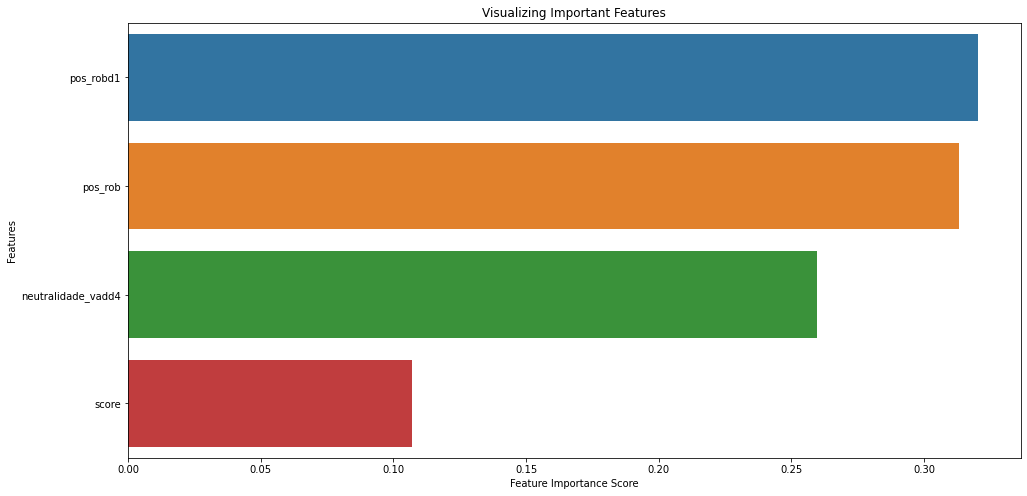

In [165]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    
visualiza_features_importantes(feature_imp)

# 10.0 Experimentos - ExtraTree

In [252]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier


#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)


list_class_weights = []
for i in weights:
    class_weight = {0: i, 1:1.0-i}
    list_class_weights.append(class_weight)
list_class_weights

## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score }


maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0


#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0


#versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
versoes_sentilex = ['70_4']

#Loop de seed aleatória
for seed in range(30000):
    
    print("Iterando seed = {}".format(seed))  
        
    ##Loop do dicionário Sentilex Escolhido: 
    for versao in versoes_sentilex:

        df_train = dict_dados_variacoes_sentilex[versao][0]
        df_valid = dict_dados_variacoes_sentilex[versao][1]
        df_test = dict_dados_variacoes_sentilex[versao][2]

        #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
        X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_test2 = df_test['Fechamento']

        X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_train2 = df_train['Fechamento']

        X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
        y_valid2 = df_valid['Fechamento']

        
        
        
        
        ## Na há balanceamento, portanto, para evitar mudar X_train3 para X_train2 em todo código iremos usar as variáveis:
        X_test3 = X_test2
        y_test3 = y_test2

        X_train3 = X_train2
        y_train3 = y_train2

        
        
        

        ################ Definição de modelos candidatos ################
        #model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
        #model2 = LGBMClassifier(random_state=seed, n_jobs=-1)
        model3 = ExtraTreeClassifier(random_state=seed)

        #models = [model1,model2]
        #nome_modelo = ['RandomForest', 'LGBM']

        #models = [model1]
        #nome_modelo = ['ExtraTree']

        #models = [model2]
        #nome_modelo = ['LGBM']
        
        models = [model3]
        nome_modelo = ['ExtraTree']

        
        
        ################ Definindo conjunto de treino + validacao para avaliar gridsearch nos dados de avaliação ################
        ## Concatenando dados de treino e valid:
        X_train_valid = pd.concat([X_train3, X_valid2], ignore_index = True )
        y_train_valid = pd.concat([y_train3, y_valid2], ignore_index = True )


        # The indices which have the value -1 will be kept in train.
        train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

        # The indices which have zero or positive values, will be kept in valid
        valid_indices = np.full((X_valid2.shape[0],), 0, dtype=int)
        valid_fold = np.append(train_indices, valid_indices)

        # definindo o conjunto de validação
        ps = PredefinedSplit(valid_fold)


        ############# Paramgrid de modelos ################

        ##Grid model 1 RandomForest
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
        #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
        #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
        #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
        #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}

        ##Grid model 2 LGBM
        #param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
        #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
        #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
        #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

        
        ##Grid model  ExtraTree
        param_grid3={"max_depth":[None,10,20], "criterion":['gini', 'entropy', 'log_loss'], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3,5], 'class_weight': list_class_weights }

        
        #list_param_grids = [param_grid1, param_grid2]
        #list_param_grids = [param_grid1]
        list_param_grids = [param_grid3]

        #list_param_grids = [param_grid2]
        dictionary_paramgrid = dict(zip(models, list_param_grids))


        
        #Loop modelos
        for num_modelo, model in enumerate(models):

            nome_modelo_testado = nome_modelo[num_modelo]

            param_grid = dictionary_paramgrid[model]

            ############# GridSearch de modelos candidatos com todas features ################
            gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = ps )

            #Fit dados 
            gs.fit(X_train_valid,y_train_valid)

            #melhores hyperparametros:
            hyperparametros = list(gs.best_params_.values())
            nome_hyperparametros = list(gs.best_params_.keys())


            #melhor modelo
            # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
            # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
            # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
            modelo_tunado = gs.best_estimator_

            # Refit no modelo tunado com apenas dados de treino para evitar overtting ao avaliar sobre dados de valid
            modelo_tunado.fit(X_train3,y_train3)
            

            #Loop Seletor de features:
            #for k in range(X_train3.shape[1]-2, X_train3.shape[1], 1):   #Iterar sobre n-1 total de features e n-3.
            #for k in range(X_train3.shape[1]-1, X_train3.shape[1]+1, 1): #Iterar sobre n total de features e n-2

            #for k in range(X_train3.shape[1], X_train3.shape[1]+1, 1):  ## Iterar sobre n total de features e n (n = max)

            for k in range(4, 5, 1):  ## Iterar sobre 4 a 5 features

                ## O seletor de features varia conforme a pipe de aleatório á SelectFromModel:

                ################ Definição de Pipelines com modelo tunado ################
                pipe1 = Pipeline([('scaler', StandardScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                pipe2 = Pipeline([('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                pipe3 = Pipeline([(nome_modelo_testado, modelo_tunado)])
                pipe4 = Pipeline([('scaler', MinMaxScaler()), ('seletor',  SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)), (nome_modelo_testado, modelo_tunado)])
                
                pipe3 = BaggingClassifier(modelo_tunado, random_state=seed)
                
                #pipelines = [pipe1,pipe2,pipe3,pipe4]
                pipelines = [pipe3]

                #Loop das pipelines testadas com seletor de features e outras etapas:
                for num_pipe, pipe in enumerate(pipelines):


                    # features aleatorias aplicado ao  PIPE3 
                    if num_pipe == 2:

                        selected = np.random.choice(X_train3.columns, k, replace=False)
                        
                        #selected = np.append(selected, 'score')
                        
                        #selected = ['pos_rob','neutralidade_vadd4','pos_robd1','score'] ### Remover
                        #pre_selected = ['neutralidade_vad','neutralidade_vadd3','composicao_vadd1','neu_finbertd1','neg_finbertd1','subjetividade_vadd2','neutralidade_vad','polaridade_vadd3']
                        #selected = np.random.choice(pre_selected, k-1, replace=False)
                        #selected = np.append(selected, 'score')
                        #selected = ['neg_finbertd1','subjetividade_vadd2','neutralidade_vad','score']
                        
                        #selected = np.random.choice(X_train3.columns, k-1, replace=False)
                        #selected = np.append(selected, 'score')
                        
                        ##selected = ['positividade_vad','pos_finbert','neutralidade_vadd2','score'] ## 70_4 #### mean 62,6% max 68,89 ********** candidato1
                        ##selected = ['pos_finbert','positividade_vadd4','negatividade_vadd1','score'] ## 80_2 ### mean 60,7% max 71,94 ******** candidato2
                        
                        selected = ['positividade_vad','pos_finbert','neutralidade_vadd2','score']
                        
                        X_train4 = X_train3[selected]
                        y_train4 = y_train3

                        X_valid3 = X_valid2[selected]

                        X_test3 = X_test2[selected]

                    else:
                        X_train4 = X_train3
                        y_train4 = y_train3

                        X_valid3 = X_valid2

                        X_test3 = X_test2

                        
                        #selected = ['pos_rob','neutralidade_vadd4','pos_robd1','score'] ### Remover
                        #selected = np.random.choice(X_train3.columns, k, replace=False) ### Remover
                        #selected = np.append(selected, 'score')
                        
                        #pre_selected = ['neutralidade_vad','neutralidade_vadd3','composicao_vadd1','neu_finbertd1','neg_finbertd1','subjetividade_vadd2','neutralidade_vad','polaridade_vadd3']
                        #selected = np.random.choice(pre_selected, k-1, replace=False)
                        #selected = np.append(selected, 'score')
                        
                        selected = np.random.choice(X_train3.columns, k-1, replace=False)
                        selected = np.append(selected, 'score')
                        
                        
                        ##selected = ['positividade_vad','pos_finbert','neutralidade_vadd2','score'] ## 70_4 #### mean 62,6% max 68,89 ********** candidato1
                        ##selected = ['pos_finbert','positividade_vadd4','negatividade_vadd1','score'] ## 80_2 ### mean 60,7% max 71,94 ******** candidato2
                        
                        selected = ['positividade_vad','pos_finbert','neutralidade_vadd2','score']

                        X_train4 = X_train3[selected] ### Remover
                        y_train4 = y_train3 ### Remover

                        X_valid3 = X_valid2[selected] ### Remover

                        X_test3 = X_test2[selected] ### Remover

                    #Fit Pipe
                    pipe.fit(X_train4,y_train4)


                   # Nome das features selecionadas para PIPE1 , PIPE2 e PIPE3
                    if num_pipe == 2:

                        features_selecionadas = ','.join(list(selected))

                    else:

                        selector = SelectFromModel(modelo_tunado, max_features=k, threshold=-np.inf)
                        selector.fit(X_train4,y_train4)
                        mask = selector.get_support()
                        features_selecionadas = ','.join(list(X_train4.columns[mask]))


                    #Armazenando propriedades das PIPES
                    if num_pipe == 0:
                        seletor_feature = "SelectFromModel"
                        scaler = "StandardScaler"

                    if num_pipe == 1:
                        seletor_feature = "SelectFromModel"
                        scaler = "Sem Scaler"

                    if num_pipe == 2:
                        seletor_feature = 'Aleatorio'
                        scaler = "StandardScaler"

                    if num_pipe == 3:
                        seletor_feature = 'Aleatorio'
                        seletor_feature = "SelectFromModel"
                        scaler = "MinMaxScaler"

                    ################ Calculando métricas da pipe DADOS NAO UTILIZADOS E NÃO VISTOS - TESTE ################
                    # Fazendo predição
                    p = pipe.predict(X_test3)
                    contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                    #Calculando o recall
                    recall_0 = recall_score(y_test3, p, pos_label=0)
                    recall_1 = recall_score(y_test3, p, pos_label=1)

                    #Calculando Precision
                    precision_0 = precision_score(y_test3, p, pos_label = 0)
                    precision_1 = precision_score(y_test3, p, pos_label = 1)

                    #Calculando acurácia
                    accuracy = accuracy_score(y_test3, p)

                    #Calculando AUC
                    auc = roc_auc_score(y_test3, p)



                    ################# Armazenando e imprimindo os resultados  ################

                    dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))

                    if num_modelo ==0:

                        #col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        #resultados_model1.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                        col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        resultados_model1.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))


                        ## Imprime resultados do melhor modelo 1                                
                        if auc > maximo_auc_model1:

                            print("============================================================================================================================")
                            print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                            print("     Experimento número = {}".format(contagem_experimentos_unicos))                
                            print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                            print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                            print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                            print("     Features Selecionadas = {}".format(features_selecionadas))
                            print("")
                            print("============================================================================================================================")

                            melhor_modelo1 = pipe
                            maximo_auc_model1 = auc

                    if num_modelo ==1:

                        #col_names_modelo2 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        #resultados_model2.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                        col_names_modelo2 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'features', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                        resultados_model2.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1,features_selecionadas, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))


                        ## Imprime resultados do melhor modelo 2
                        if auc > maximo_auc_model2:

                            print("============================================================================================================================")
                            print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                            print("     Experimento número = {}".format(contagem_experimentos_unicos))                        
                            print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                            print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                            print("     Características das features selecionadas: num_features = {} - metodo_selecao_features = {}".format(k, seletor_feature))
                            print("     Features Selecionadas = {}".format(features_selecionadas))
                            print("")
                            print("============================================================================================================================")


                            melhor_modelo2 = pipe
                            maximo_auc_model2 = auc



                    # Imprime resultados do melhor modelo global até o momento.                         
                    if auc > maximo_auc:
                        #print("Novo melhor modelo encontrado:  modelo = {} - AUC = {} - fator_balanceamento_classes = {} - num_pipeline = {}, tipo_encoding = {} - tipo_scaler = {} - num_seed_aleatoria = {} - num_features = {} - metodo_selecao_features = {} - features_selecionadas = {} - hyperparâmetros_selecionados = {}".format("RF", fator, auc,num_pipe+1, encode, scaler, seed, k, seletor_feature, features_selecionadas, dictionary_hyperparams))

                        print("============================================================================================================================")
                        print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC = {} - num_seed_aleatoria = {} - versão sentilex = {}".format(nome_modelo_testado, auc, seed, versao))
                        print("============================================================================================================================")

                        melhor_modelo = pipe
                        maximo_auc = auc
                        best_seed = seed

                    #break

Iterando seed = 0
NOVO MÍNIMO LOCAL ENCONTRADO:  ExtraTree - AUC = 0.6133209990749307 - num_seed_aleatoria = 0 - versao_sentilex = 70_4
     Experimento número = 1
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 4 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = positividade_vad,pos_finbert,neutralidade_vadd2,score

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  ExtraTree - AUC = 0.6133209990749307 - num_seed_aleatoria = 0 - versão sentilex = 70_4
Iterando seed = 1
NOVO MÍNIMO LOCAL ENCONTRADO:  ExtraTree - AUC = 0.6787696577243294 - num_seed_aleatoria = 1 - versao_sentilex = 70_4
     Experimento número = 2
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
  

Iterando seed = 168
Iterando seed = 169
Iterando seed = 170
Iterando seed = 171
Iterando seed = 172
Iterando seed = 173
Iterando seed = 174
Iterando seed = 175
Iterando seed = 176
Iterando seed = 177
Iterando seed = 178
Iterando seed = 179
Iterando seed = 180
Iterando seed = 181
Iterando seed = 182
Iterando seed = 183
Iterando seed = 184
Iterando seed = 185
Iterando seed = 186
Iterando seed = 187
Iterando seed = 188
Iterando seed = 189
Iterando seed = 190
Iterando seed = 191
Iterando seed = 192
Iterando seed = 193
Iterando seed = 194
Iterando seed = 195
Iterando seed = 196
Iterando seed = 197
Iterando seed = 198
Iterando seed = 199
Iterando seed = 200
Iterando seed = 201
Iterando seed = 202
Iterando seed = 203
Iterando seed = 204
Iterando seed = 205
Iterando seed = 206
Iterando seed = 207
Iterando seed = 208
Iterando seed = 209
Iterando seed = 210
Iterando seed = 211
Iterando seed = 212
Iterando seed = 213
Iterando seed = 214
Iterando seed = 215
Iterando seed = 216
Iterando seed = 217


KeyboardInterrupt: 

In [253]:
####### Resultados Modelo 1: RF

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[11:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:11]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo1[2:11]

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_agrupado = resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, }).sort_values(by='auc', ascending=False)
df_agrupado.head(50)

,,,,,,,,,contagem_exp,acuracia,recall_0,recall_1,prec_0,prec_1,auc
class_weight,criterion,max_depth,min_samples_leaf,min_samples_split,modelo,Sentilex,num_pipe,features,,,,,,,
"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd2,score",237,0.620208,0.572583,0.668868,0.639732,0.605412,0.620725


In [254]:
df_agrupado[(df_agrupado['contagem_exp']>1)].sort_values(by='auc', ascending=False).head(50)

,,,,,,,,,contagem_exp,acuracia,recall_0,recall_1,prec_0,prec_1,auc
class_weight,criterion,max_depth,min_samples_leaf,min_samples_split,modelo,Sentilex,num_pipe,features,,,,,,,
"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd2,score",237,0.620208,0.572583,0.668868,0.639732,0.605412,0.620725


In [255]:
resultados_df_model1.sort_values(by='auc', ascending=False).head(50)

,contagem_exp,seed,class_weight,criterion,max_depth,min_samples_leaf,min_samples_split,modelo,Sentilex,num_pipe,features,acuracia,recall_0,recall_1,prec_0,prec_1,auc
67,68,67,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.698925,0.638298,0.76087,0.731707,0.673077,0.699584
3,4,3,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.688172,0.617021,0.76087,0.725,0.660377,0.688945
61,62,61,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.688172,0.638298,0.73913,0.714286,0.666667,0.688714
224,225,224,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.688172,0.659574,0.717391,0.704545,0.673469,0.688483
136,137,136,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.688172,0.659574,0.717391,0.704545,0.673469,0.688483
36,37,36,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.688172,0.680851,0.695652,0.695652,0.680851,0.688252
112,113,112,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.688172,0.680851,0.695652,0.695652,0.680851,0.688252
1,2,1,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.677419,0.553191,0.804348,0.742857,0.637931,0.678770
30,31,30,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.677419,0.574468,0.782609,0.72973,0.642857,0.678538
7,8,7,"{0: 0.1, 1: 0.9}",gini,None,1,2,ExtraTree,70_4,1,"positividade_vad,pos_finbert,neutralidade_vadd...",0.677419,0.617021,0.73913,0.707317,0.653846,0.678076


## Persistencia em disco

In [277]:
melhor_modelo

BaggingClassifier(base_estimator=ExtraTreeClassifier(class_weight={0: 0.1,
                                                                   1: 0.9},
                                                     random_state=36),
                  random_state=36)

In [248]:
#import joblib
#joblib.dump(melhor_modelo, 'modelo-ExtraTree.pkl',compress=4)

['modelo-ExtraTree.pkl']

In [279]:
#import joblib
#joblib.dump(melhor_modelo, 'modelo-ExtraTree2.pkl',compress=4)

## Metricas candidato 1

NOVO MÍNIMO LOCAL ENCONTRADO:  ExtraTree - AUC = 0.709990749306198 - num_seed_aleatoria = 56 - versao_sentilex = 80_3
     Experimento número = 57
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 4 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = pos_finbert,positividade_vadd4,negatividade_vadd1,score

In [260]:
import joblib
import os
melhor_modelo_extratree = joblib.load(open(os.path.join('modelo-ExtraTree.pkl'),"rb"))
melhor_modelo_extratree

BaggingClassifier(base_estimator=ExtraTreeClassifier(class_weight={0: 0.1,
                                                                   1: 0.9},
                                                     random_state=56),
                  random_state=56)

In [261]:
versao_sentilex = '80_3'
#features_selecionadas = 
features_selecionadas = ['pos_finbert','positividade_vadd4','negatividade_vadd1','score']


df_train = dict_dados_variacoes_sentilex[versao_sentilex][0]
df_valid = dict_dados_variacoes_sentilex[versao_sentilex][1]
df_test = dict_dados_variacoes_sentilex[versao_sentilex][2]

#Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
#X_test4 = df_test[.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)]
X_test4 = df_test[features_selecionadas]
y_test4 = df_test['Fechamento']

#X_train4 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
X_train4 = df_train[features_selecionadas]
y_train4 = df_train['Fechamento']

#X_valid4 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
X_valid4 = df_valid[features_selecionadas]
y_valid4 = df_valid['Fechamento']


melhor_modelo_extratree.fit(X_train4,y_train4)

BaggingClassifier(base_estimator=ExtraTreeClassifier(class_weight={0: 0.1,
                                                                   1: 0.9},
                                                     random_state=56),
                  random_state=56)

In [262]:
#predict validacao
p = melhor_modelo_extratree.predict(X_test4)

############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test4, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test4, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test4, p, pos_label=0)
recall_1 = recall_score(y_test4, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test4, p, pos_label = 0)
precision_1 = precision_score(y_test4, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test4, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test4, p)

#Calculando AUC
auc = roc_auc_score(y_test4, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70        47
           1       0.69      0.74      0.72        46

    accuracy                           0.71        93
   macro avg       0.71      0.71      0.71        93
weighted avg       0.71      0.71      0.71        93


Confusion Matrix Dados - Validacao:
 [[32 15]
 [12 34]]

Recall_0: 0.6808510638297872
Recall_1: 0.7391304347826086
Precision_0: 0.7272727272727273
Precision_1: 0.6938775510204082
Acuracia: 0.7096774193548387
Acuracia Balanceada: 0.7099907493061979
AUC: 0.709990749306198


## Metricas candidato 2

NOVO MÍNIMO LOCAL ENCONTRADO:  ExtraTree - AUC = 0.6882 - num_seed_aleatoria = 36 - versao_sentilex = 70_4
     Experimento número = 37
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'class_weight': {0: 0.1, 1: 0.9}, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Características das features selecionadas: num_features = 4 - metodo_selecao_features = SelectFromModel
     Features Selecionadas = positividade_vad,pos_finbert,neutralidade_vadd2,score

In [280]:
import joblib
import os
melhor_modelo_extratree2 = joblib.load(open(os.path.join('modelo-ExtraTree2.pkl'),"rb"))
melhor_modelo_extratree2

BaggingClassifier(base_estimator=ExtraTreeClassifier(class_weight={0: 0.1,
                                                                   1: 0.9},
                                                     random_state=36),
                  random_state=36)

In [281]:
versao_sentilex = '70_4'
#features_selecionadas = 
features_selecionadas = ['positividade_vad','pos_finbert','neutralidade_vadd2','score']


df_train = dict_dados_variacoes_sentilex[versao_sentilex][0]
df_valid = dict_dados_variacoes_sentilex[versao_sentilex][1]
df_test = dict_dados_variacoes_sentilex[versao_sentilex][2]

#Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
#X_test4 = df_test[.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)]
X_test4 = df_test[features_selecionadas]
y_test4 = df_test['Fechamento']

#X_train4 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
X_train4 = df_train[features_selecionadas]
y_train4 = df_train['Fechamento']

#X_valid4 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
X_valid4 = df_valid[features_selecionadas]
y_valid4 = df_valid['Fechamento']


melhor_modelo_extratree2.fit(X_train4,y_train4)

BaggingClassifier(base_estimator=ExtraTreeClassifier(class_weight={0: 0.1,
                                                                   1: 0.9},
                                                     random_state=36),
                  random_state=36)

In [282]:
#predict validacao
p = melhor_modelo_extratree2.predict(X_test4)

############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test4, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test4, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test4, p, pos_label=0)
recall_1 = recall_score(y_test4, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test4, p, pos_label = 0)
precision_1 = precision_score(y_test4, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test4, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test4, p)

#Calculando AUC
auc = roc_auc_score(y_test4, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        47
           1       0.68      0.70      0.69        46

    accuracy                           0.69        93
   macro avg       0.69      0.69      0.69        93
weighted avg       0.69      0.69      0.69        93


Confusion Matrix Dados - Validacao:
 [[32 15]
 [14 32]]

Recall_0: 0.6808510638297872
Recall_1: 0.6956521739130435
Precision_0: 0.6956521739130435
Precision_1: 0.6808510638297872
Acuracia: 0.6881720430107527
Acuracia Balanceada: 0.6882516188714154
AUC: 0.6882516188714154


# 11.0 Experimentos - KNN

In [146]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

#Classweights testadas no algoritmo
#weights = np.linspace(0.2,0.5,10) 
#weights = np.linspace(0.1,0.9,11)
weights = np.linspace(0.1,0.9,5)



## Definição da função de refit no gridsearch acurácia balanceada:
acuracia_dados = make_scorer(accuracy_score)
f1_dados = make_scorer(f1_score)
balanced_acc_dados = make_scorer(balanced_accuracy_score)
roc_score = make_scorer(roc_auc_score)
scoring = {"accuracy": acuracia_dados, "f1":f1_dados, "bacuracy":balanced_acc_dados, "roc": roc_score }


maximo_auc = 0
maximo_auc_model1 = 0
maximo_auc_model2 = 0


#Reset na lista de resultados dos modelos iterados e experimentos rodados.
resultados_model1 = []
resultados_model2 = []
contagem_experimentos_unicos = 0


#versoes_sentilex = ['65_1','65_2','65_3','65_4','65_5','70_1','70_2','70_3','70_4','70_5','75_1','75_2','75_3','75_4','75_5','80_1','80_2','80_3','80_4','80_5']
versoes_sentilex = ['80_2']

#peso_inicial = [0.27686713, 0.01928838, 0.087757, 0.00451469, 0.14060713, 0.04357977, 0.04226601, 0.000130912651, 0.05421824, 0.10130499, 0.26512252, 0.03000374, 0.38915364, 0.26911481, 0.10984078, 0.25851415, 0.31254619, 0.18041496, 0.03987287, 0.37023451, 0.10583821, 0.15432689]



melhores_pesos = []

pesos_iniciais = [0.8093233,
 0.1981739,
 0.130479,
 0.31633728,
 0.93040947,
 0.15634982,
 0.12300895,
 0.1711896,
 0.09953253,
 0.40637464,
 0.03798309,
 0.19449661,
 0.99009024,
 0.30795755,
 0.27682479,
 0.97880038,
 0.98200391,
 0.82488358,
 0.1406156,
 0.53879264,
 0.64082789,
 0.51055045]

fator_iterador_pesos = 4
lista_array_pesos = []
for numero in range(22):
      
    pesos_editados = [i for i in pesos_iniciais]
    
    
    ## Atualização randomica peso_pase
    #numsorteado = random.randint(0, 22)
    pesos_editados[numero] = pesos_editados[numero] * fator_iterador_pesos

    peso_testado = np.array(pesos_editados)
    lista_array_pesos.append(peso_testado)
    
    
    
#for num_array, array_testado in enumerate(lista_array_pesos):
for i in range(1):
    #peso_minkowski = array_testado
    peso_minkowski = np.array(pesos_iniciais)
    

    print("Iterando array_num = {}".format(num_array))
   
    

    #Loop de seed aleatória
    for seed in range(1):

        #print("Iterando seed = {}".format(seed))  

        ##Loop do dicionário Sentilex Escolhido: 
        for versao in versoes_sentilex:

            df_train = dict_dados_variacoes_sentilex[versao][0]
            df_valid = dict_dados_variacoes_sentilex[versao][1]
            df_test = dict_dados_variacoes_sentilex[versao][2]

            #Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
            X_test2 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
            y_test2 = df_test['Fechamento']

            X_train2 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
            y_train2 = df_train['Fechamento']

            X_valid2 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
            y_valid2 = df_valid['Fechamento']



            ## Na há balanceamento, portanto, para evitar mudar X_train3 para X_train2 em todo código iremos usar as variáveis:
            X_test3 = X_test2
            y_test3 = y_test2

            X_train3 = X_train2
            y_train3 = y_train2



            ################ Definição de modelos candidatos ################
            #model1 = RandomForestClassifier(random_state=seed, n_jobs=-1)
            #model2 = LGBMClassifier(random_state=seed, n_jobs=-1)
            model3 = KNeighborsClassifier()

            #models = [model1,model2]
            #nome_modelo = ['RandomForest', 'LGBM']

            #models = [model1]
            #nome_modelo = ['RandomForest']

            #models = [model2]
            #nome_modelo = ['LGBM']

            models = [model3]
            nome_modelo = ['kNN']


            ################ Definindo conjunto de treino + validacao para avaliar gridsearch nos dados de avaliação ################
            ## Concatenando dados de treino e valid:
            X_train_valid = pd.concat([X_train3, X_valid2], ignore_index = True )
            y_train_valid = pd.concat([y_train3, y_valid2], ignore_index = True )


            # The indices which have the value -1 will be kept in train.
            train_indices = np.full((X_train3.shape[0],), -1, dtype=int)

            # The indices which have zero or positive values, will be kept in valid
            valid_indices = np.full((X_valid2.shape[0],), 0, dtype=int)
            valid_fold = np.append(train_indices, valid_indices)

            # definindo o conjunto de validação
            ps = PredefinedSplit(valid_fold)


            ############# Paramgrid de modelos ################

            ##Grid model 1 RandomForest
            #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini','entropy']}
            #param_grid1={"max_depth":[None], "min_samples_split":[2,3,5,8,12], "min_samples_leaf":[1], "criterion":['gini']}
            #param_grid1={"max_depth":[None], "min_samples_split":[3], "min_samples_leaf":[1], "criterion":['gini']}
            #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini']}
            #param_grid1={"max_depth":[None,10,20,40], "min_samples_split":[2,3,5,10,20], "min_samples_leaf":[1,3,5,10], "criterion":['gini','entropy']}
            #param_grid1={"max_depth":[None,10,20], "min_samples_split":[2,3,5], "min_samples_leaf":[1,3], "criterion":['gini'], 'class_weight': list_class_weights}
            #param_grid1={"max_depth":[None], "min_samples_split":[2], "min_samples_leaf":[1], "criterion":['gini'], 'class_weight': list_class_weights}

            ##Grid model 2 LGBM
            #param_grid2={"max_depth":[-1,10,20], "learning_rate":[0.1,0.01,0.001], "n_estimators":[100,50,200], "num_leaves":[31,5,10,50]}
            #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[250,300,400], "num_leaves":[2,5,8,12,16,20]}
            #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1,0.01], "n_estimators":[70,100,150,200], "num_leaves":[31,10,25,50,80,120]}
            #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'boosting_type': ['gbdt', 'dart', 'goss', 'rf'] }
            #param_grid2={"max_depth":[-1,50,100,150,200], "learning_rate":[0.1], "n_estimators":[150,200], "num_leaves":[31,10,25], 'class_weight': list_class_weights}
            #param_grid2={"max_depth":[-1], "learning_rate":[0.1], "n_estimators":[200], "num_leaves":[31,10], 'class_weight': list_class_weights }

            ## Itera sobre numero de k vizinhos

            #for neighbor in range(2,12,1):
            #for neighbor in range(4,9,1): 
            for neighbor in range(5,6,1): 

                #param_grid3={"n_neighbors":[neighbor], "weights":['uniform','distance'], "algorithm":['auto','ball_tree','kd_tree','brute'], 'p': [1,2], 'leaf_size':[5,10,20,30,50,80]}
                #param_grid3={"n_neighbors":[neighbor], "weights":['uniform','distance'], "algorithm":['auto','ball_tree','kd_tree','brute'], 'p': [1,2], 'leaf_size':[5,10,20,30,50,80], 'metric': ['euclidean','manhattan','chebyshev','minkowski','seuclidean','mahalanobis'] }
           #### #param_grid3={"n_neighbors":[neighbor], "weights":['uniform','distance'], "algorithm":['auto','ball_tree','kd_tree','brute'], 'p': [1,2], 'leaf_size':[1,2,3,4,5,6,7,8,9]}
                param_grid3={"n_neighbors":[neighbor], "algorithm":['auto','ball_tree','kd_tree','brute'], 'p': [2], 'leaf_size':[1,2,3,4,5,6,7,8,9], 'metric': ['wminkowski'], 'metric_params': [{ 'w': np.array([1 for numero in range(0,X_train3.shape[1])]) }] }
                #param_grid3={"n_neighbors":[neighbor], "weights":['uniform','distance'], "algorithm":['auto','ball_tree','kd_tree','brute'], 'p': [1,2], 'leaf_size':[1,2,3,4,5,6,7,8,9], 'metric': ['minkowski']}


                #list_param_grids = [param_grid1, param_grid2]
                #list_param_grids = [param_grid1]
                list_param_grids = [param_grid3]

                #list_param_grids = [param_grid2]
                dictionary_paramgrid = dict(zip(models, list_param_grids))



                #Loop modelos
                for num_modelo, model in enumerate(models):

                    nome_modelo_testado = nome_modelo[num_modelo]

                    param_grid = dictionary_paramgrid[model]

                    ############# GridSearch de modelos candidatos com todas features ################
                    gs = GridSearchCV(model , param_grid=param_grid, scoring=scoring,  refit="f1", n_jobs=-1, cv = ps )

                    #Fit dados 
                    gs.fit(X_train_valid,y_train_valid)

                    #melhores hyperparametros:
                    hyperparametros = list(gs.best_params_.values())
                    nome_hyperparametros = list(gs.best_params_.keys())


                    #melhor modelo
                    # CUIDADO: O atributo best_estimator_ retorna o melhor modelo ja treinado com o conjunto de dados
                    # passado pelo metodo gs.fit(), ou seja ja vem treinado com X_train_valid,y_train_valid, sendo, portanto
                    # necessário mais uma etapa de fit() do modelo tunado apenas com dados de treino.
                    modelo_tunado = gs.best_estimator_

                    # Refit no modelo tunado com apenas dados de treino para evitar overtting ao avaliar sobre dados de valid
                    modelo_tunado.fit(X_train3,y_train3)



                    #Loop PCA:
                    #for k in range(2,X_train3.shape[1]-1,1):  ## Iterar sobre 2 á n features - 1 -  PCA
                    #for k in range(2,26,1):  ## Iterar sobre 2 á 25 features  PCA
                    for k in range(22,23,1):  ## Iterar sobre 22 á 22 features  PCA

                        ## Alterando os pesos de wminkowski para ter a mesma dimensão do X_Train definido pelo PCA
                        pesos_aleatorios = np.random.random(k)
                        #modelo_tunado.set_params(metric_params = {'w': pesos_aleatorios} )



                        #for num in range(22):

                            #Atualiza pesos de minkowski
                            #if len(melhores_pesos)==0:
                                #peso_minkowski = [pes for pes in peso_inicial]
                                #peso_minkowski[num] = peso_minkowski[num]*2
                                #peso_minkowski = np.array(peso_minkowski)

                            #else:
                                #peso_minkowski = [pes for pes in melhores_pesos.tolist()] 
                                #peso_minkowski[num] = peso_minkowski[num]*2
                                #peso_minkowski = np.array(peso_minkowski)


                        modelo_tunado.set_params(metric_params = {'w': peso_minkowski} )


                        ## O seletor de features varia conforme a pipe de aleatório á SelectFromModel:

                        ################ Definição de Pipelines com modelo tunado ################
                        pipe1 = Pipeline([('PCA', PCA(n_components=k)), ('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                        pipe2 = Pipeline([('PCA', PCA(n_components=k)), (nome_modelo_testado, modelo_tunado)])
                        #pipe3 = Pipeline([('scaler', StandardScaler()), (nome_modelo_testado, modelo_tunado)])
                        #pipe4 = Pipeline([(nome_modelo_testado, modelo_tunado)])
                        pipe5 = Pipeline([('PCA', PCA(n_components=k)), ('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])
                        #pipe6 = Pipeline([('scaler', MinMaxScaler()), (nome_modelo_testado, modelo_tunado)])

                        pipe3 = Pipeline([('PCA', PCA(n_components=k)), (nome_modelo_testado, modelo_tunado)])
                        pipe4 = Pipeline([('PCA', PCA(n_components=k)), (nome_modelo_testado, modelo_tunado)])
                        pipe6 = Pipeline([('PCA', PCA(n_components=k)), (nome_modelo_testado, modelo_tunado)])

                        pipelines = [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6]


                        #Loop das pipelines testadas com seletor de features e outras etapas:
                        for num_pipe, pipe in enumerate(pipelines):

                            #Fit Pipe
                            pipe.fit(X_train3,y_train3)


                            #Armazenando propriedades das PIPES
                            if num_pipe == 0:
                                pca_bol = k
                                scaler = "StandardScaler"

                                #pca = PCA(n_components=k)

                                #X_test4 = pca.fit_transform(X_test3)
                                #y_test4 = y_test3


                            if num_pipe == 1:
                                pca_bol = k
                                scaler = "Sem Scaler"

                                #pca = PCA(n_components = k)
                                #X_test4 = pca.fit_transform(X_test3)
                                #y_test4 = y_test3

                            if num_pipe == 2:
                                pca_bol = k
                                scaler = "MinMaxScaler"

                                #X_test4 = X_test3
                                #y_test4 = y_test3

                            if num_pipe == 3:
                                pca_bol = k
                                scaler = "Sem Scaler"

                                #X_test4 = X_test3
                                #y_test4 = y_test3

                            if num_pipe == 4:
                                pca_bol = k
                                scaler = "Sem Scaler"

                                #pca = PCA(n_components = k)
                                #X_test4 = pca.fit_transform(X_test3)
                                #y_test4 = y_test3

                            if num_pipe == 5:
                                pca_bol = k
                                scaler = "Sem Scaler"

                                #X_test4 = X_test3
                                #y_test4 = y_test3

                            X_test4 = X_test3
                            y_test4 = y_test3

                            ################ Calculando métricas da pipe DADOS NAO UTILIZADOS E NÃO VISTOS - TESTE ################
                            # Fazendo predição

                            X_test4 = pd.DataFrame(X_test4)

                            p = pipe.predict(X_test4)
                            contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                            #Calculando o recall
                            recall_0 = recall_score(y_test4, p, pos_label=0)
                            recall_1 = recall_score(y_test4, p, pos_label=1)

                            #Calculando Precision
                            precision_0 = precision_score(y_test4, p, pos_label = 0)
                            precision_1 = precision_score(y_test4, p, pos_label = 1)

                            #Calculando acurácia
                            accuracy = accuracy_score(y_test4, p)
                        

                            #Calculando AUC
                            auc = roc_auc_score(y_test4, p)
                            
                            ################ Calculando métricas da pipe DADOS validação - avaliar se generaliza bem ################
                            # Fazendo predição

                            p = pipe.predict(X_valid2)
                            #contagem_experimentos_unicos = contagem_experimentos_unicos + 1

                            #Calculando o recall
                            recall_0_valid = recall_score(y_valid2, p, pos_label=0)
                            recall_1_valid = recall_score(y_valid2, p, pos_label=1)

                            #Calculando Precision
                            precision_0_valid = precision_score(y_valid2, p, pos_label = 0)
                            precision_1_valid = precision_score(y_valid2, p, pos_label = 1)

                            #Calculando acurácia
                            accuracy_valid = accuracy_score(y_valid2, p)
                        

                            #Calculando AUC
                            auc_valid = roc_auc_score(y_valid2, p)
                            



                            ################# Armazenando e imprimindo os resultados  ################

                            dictionary_hyperparams = dict(zip(nome_hyperparametros, hyperparametros))

                            if num_modelo ==0:

                                #col_names_modelo1 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                #resultados_model1.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                                col_names_modelo1 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','pesos','num_pipe', 'PCA', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc','auc_valid']
                                resultados_model1.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, pesos_aleatorios, num_pipe+1, pca_bol, accuracy, recall_0, recall_1, precision_0, precision_1, auc, auc_valid ]))


                                ## Imprime resultados do melhor modelo 1                                
                                if auc_valid > maximo_auc_model1:

                                    print("============================================================================================================================")
                                    print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC valid = {} - - AUC teste = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado,auc_valid, auc, seed, versao))
                                    print("     Experimento número = {}".format(contagem_experimentos_unicos))                
                                    print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                    print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                    print("     Características das features selecionadas: num_PCA = {}".format(pca_bol))
                                    print("")
                                    print("============================================================================================================================")

                                    melhor_modelo1 = pipe
                                    maximo_auc_model1 = auc_valid

                            if num_modelo ==1:

                                #col_names_modelo2 = nome_hyperparametros + ['modelo','features', 'num_pipe','fator_balanceamento','seed', 'tipo_encode', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                #resultados_model2.append(np.array( hyperparametros +  [nome_modelo_testado, features_selecionadas, num_pipe+1, fator, seed, encode, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))

                                col_names_modelo2 = ['contagem_exp', 'seed'] + nome_hyperparametros + ['modelo','Sentilex','num_pipe', 'PCA', 'acuracia', 'recall_0','recall_1','prec_0','prec_1','auc']
                                resultados_model2.append(np.array( [contagem_experimentos_unicos, seed] + hyperparametros +  [nome_modelo_testado,versao, num_pipe+1, PCA, accuracy, recall_0, recall_1, precision_0, precision_1, auc ]))


                                ## Imprime resultados do melhor modelo 2
                                if auc_valid > maximo_auc_model2:

                                    print("============================================================================================================================")
                                    print("NOVO MÍNIMO LOCAL ENCONTRADO:  {} - AUC valid = {} - - AUC teste = {} - num_seed_aleatoria = {} - versao_sentilex = {}".format(nome_modelo_testado,auc_valid, auc, seed, versao))
                                    print("     Experimento número = {}".format(contagem_experimentos_unicos))                
                                    print("     Características pipeline: num_pipeline = {} - tipo_scaler = {}".format(num_pipe+1, scaler))
                                    print("     Características do modelo: hyperparâmetros_selecionados = {}".format(dictionary_hyperparams))
                                    print("     Características das features selecionadas: num_PCA = {}".format(pca_bol))
                                    print("")
                                    print("============================================================================================================================")


                                    melhor_modelo2 = pipe
                                    maximo_auc_model2 = auc_valid



                            # Imprime resultados do melhor modelo global até o momento.                         
                            if auc_valid > maximo_auc:
                                #print("Novo melhor modelo encontrado:  modelo = {} - AUC = {} - fator_balanceamento_classes = {} - num_pipeline = {}, tipo_encoding = {} - tipo_scaler = {} - num_seed_aleatoria = {} - num_features = {} - metodo_selecao_features = {} - features_selecionadas = {} - hyperparâmetros_selecionados = {}".format("RF", fator, auc,num_pipe+1, encode, scaler, seed, k, seletor_feature, features_selecionadas, dictionary_hyperparams))

                               # diferenca para teste:
                                metrica = auc_valid - auc
                                
                                if metrica < 10 and metrica > -10:
                                
                                    print("============================================================================================================================")
                                    print("MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  {} - AUC valid = {} - AUC teste = {} - num_seed_aleatoria = {} - versão sentilex = {}".format(nome_modelo_testado, auc_valid, auc, seed, versao))
                                    print(recall_0),print(recall_1)
                                    print("============================================================================================================================")

                                    melhor_modelo = pipe
                                    maximo_auc = auc
                                    best_seed = seed
                                    #melhores_pesos = peso_minkowski
                                    melhores_pesos = pesos_aleatorios

                            #break

Iterando array_num = 21
NOVO MÍNIMO LOCAL ENCONTRADO:  kNN - AUC valid = 0.6744704570791527 - - AUC teste = 0.6341350601295097 - num_seed_aleatoria = 0 - versao_sentilex = 80_2
     Experimento número = 1
     Características pipeline: num_pipeline = 1 - tipo_scaler = StandardScaler
     Características do modelo: hyperparâmetros_selecionados = {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'wminkowski', 'metric_params': {'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}, 'n_neighbors': 5, 'p': 2}
     Características das features selecionadas: num_PCA = 22

MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  kNN - AUC valid = 0.6744704570791527 - AUC teste = 0.6341350601295097 - num_seed_aleatoria = 0 - versão sentilex = 80_2
0.6595744680851063
0.6086956521739131
MÍNIMO GLOBAL: NOVO MELHOR MODELO ENCONTRADO:  kNN - AUC

### Distancia Euclidiana:
- Best: AUC 67,76, knn = 3, PCA = 23

### Distancia de Minkowski com Pesos por features

- Baseline: AUC 0.591 knn = 5, PCA = 22 wminkowski pesos 1

- AUC Valid = 71,71 AUC teste = 70,97 knn = 5, PCA = 22 pesos:

[0.8093233,
 0.1981739,
 0.130479,
 0.31633728,
 0.93040947,
 0.15634982,
 0.12300895,
 0.1711896,
 0.09953253,
 0.40637464,
 0.03798309,
 0.19449661,
 0.99009024,
 0.30795755,
 0.27682479,
 0.97880038,
 0.98200391,
 0.82488358,
 0.1406156,
 0.53879264,
 0.64082789,
 0.51055045]

## Resultados

In [147]:
####### Resultados Modelo 1: KNN

## Configurando Numero de caracteres para visualização do dataframe
pd.set_option('display.precision',5)
pd.reset_option('^display.',silent=True)

# Transformando resultados em dataframe
resultados_df_model1 = pd.DataFrame(np.array(resultados_model1), columns=col_names_modelo1)
resultados_df_model1['auc'] = resultados_df_model1['auc'].astype(float, errors = 'raise')

## Criando dicionário com os tipos de dados dos parâmetros e das métricas
import itertools

col_metricas = col_names_modelo1[13:]
dict_metrics_types = dict.fromkeys(col_metricas , 'float')

col_params = col_names_modelo1[:13]
dict_params_types = dict.fromkeys(col_params , 'str')

dict_data_types = itertools.chain(dict_params_types.items(),dict_metrics_types.items())
dict_data_types = dict(dict_data_types)
dict_data_types

group_by_list = col_names_modelo1[2:13]

## Agrupando por hiperparâmetros e ordenando pelas métricas
df_agrupado = resultados_df_model1.astype(dict_data_types).groupby(group_by_list).agg({'contagem_exp': 'nunique', 'acuracia':np.mean, 'recall_0':np.mean, 'recall_1':np.mean, 'prec_0':np.mean, 'prec_1':np.mean, 'auc':np.mean, 'auc_valid': np.mean }).sort_values(by='auc_valid', ascending=False)
df_agrupado.head(50)

contagem_exp  \
algorithm leaf_size metric     metric_params                                      n_neighbors p modelo Sentilex pesos                                              num_pipe PCA                 
auto      1         wminkowski {'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1... 5           2 kNN    80_2     [0.45139425 0.79545848 0.42583587 0.98595407 0.... 5        22              1   
                                                                                                                                                                   1        22              1   
                                                                                                                                                                   2        22              1   
                                                                                                                                                                   3        22              1   
                                                                                                                                                                   4        22              1   
                                                                                                                                                                   6        22              1   

                                                                                                                                                                                 acuracia  \
algorithm leaf_size metric     metric_params                                      n_neighbors p modelo Sentilex pesos                                              num_pipe PCA             
auto      1         wminkowski {'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1... 5           2 kNN    80_2     [0.45139425 0.79545848 0.42583587 0.98595407 0.... 5        22   0.709677   
                                                                                                                                                                   1        22   0.634409   
                                                                                                                                                                   2        22   0.602151   
                                                                                                                                                                   3        22   0.602151   
                                                                                                                                                                   4        22   0.602151   
                                                                                                                                                                   6        22   0.602151   

                                                                                                                                                                                 recall_0  \
algorithm leaf_size metric     metric_params                                      n_neighbors p modelo Sentilex pesos                                              num_pipe PCA             
auto      1         wminkowski {'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1... 5           2 kNN    80_2     [0.45139425 0.79545848 0.42583587 0.98595407 0.... 5        22   0.702128   
                                                                                                                                                                   1        22   0.659574   
                                                                                                                                                                   2        22   0.638298   
                                                                                                                                                                   3        22

In [148]:
resultados_filtrados = resultados_df_model1[(resultados_df_model1['auc']>=0.70)]
resultados_filtrados

,contagem_exp,seed,algorithm,leaf_size,metric,metric_params,n_neighbors,p,modelo,Sentilex,pesos,num_pipe,PCA,acuracia,recall_0,recall_1,prec_0,prec_1,auc,auc_valid
4,5,0,auto,1,wminkowski,"{'w': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,2,kNN,80_2,"[0.45139424990395394, 0.7954584762282572, 0.42...",5,22,0.709677,0.702128,0.717391,0.717391,0.702128,0.709759,0.717113


## Analise para incialização de pesos de Weighted Minkowski

- Foi rodado 231 mil experimentos com diversas combinações de PCA, n-neightboors com inicialização aleatória de pesos a fim de avaliar qual melhor numero de vizinhos e numero de PCA. (Dados disponíveis no csv kNN best features.csv) Nº Vizinhos = 5, PCA = 2.  

  
- Foi rodado 51 mil experimentos com nº Vizinhos = 5 e PCA = 22 com inicialização aleatória de pesos. Iremos selecionar os conjuntos de pesos que performaram bem nos dados de validação e nos dados de testes.  
  
  
- Em seguida iremos comparar os resultados por weighted minkowski VS distância Euclidiana.  

In [129]:
#resultados_df_model1.to_csv('kNN best features2.csv',index=False)

In [150]:
resultados_df_model1 = pd.read_csv('kNN best features2.csv', sep=',')
len(resultados_df_model1)

51000

In [151]:
resultados_filtrados = resultados_df_model1[(resultados_df_model1['auc']>=0.70)]
resultados_filtrados.PCA.value_counts()

22    7
Name: PCA, dtype: int64

- Há 7 registros com AUC nos dados de teste > 0.7, vamos avaliar qual deles também performaram bem nos dados de validação uma vez que desejamos um algorítmo que, além de performar bem nos dados de produção também seja capaz de generalizar.

In [152]:
resultados_filtrados[(resultados_filtrados['PCA']==22)].sort_values(by='auc', ascending=False)

,contagem_exp,seed,algorithm,leaf_size,metric,metric_params,n_neighbors,p,modelo,Sentilex,pesos,num_pipe,PCA,acuracia,recall_0,recall_1,prec_0,prec_1,auc,auc_valid
40488,40489,6748,auto,1,wminkowski,"{'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,2,kNN,80_2,[0.78385762 0.31939701 0.56434666 0.05833802 0...,1,22,0.720430,0.680851,0.760870,0.744186,0.700000,0.720860,0.664994
17665,17666,2944,auto,1,wminkowski,"{'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,2,kNN,80_2,[0.86302124 0.00769531 0.24891148 0.6233247 0...,2,22,0.720430,0.702128,0.739130,0.733333,0.708333,0.720629,0.643813
17666,17667,2944,auto,1,wminkowski,"{'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,2,kNN,80_2,[0.86302124 0.00769531 0.24891148 0.6233247 0...,3,22,0.720430,0.702128,0.739130,0.733333,0.708333,0.720629,0.643813
17667,17668,2944,auto,1,wminkowski,"{'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,2,kNN,80_2,[0.86302124 0.00769531 0.24891148 0.6233247 0...,4,22,0.720430,0.702128,0.739130,0.733333,0.708333,0.720629,0.643813
17669,17670,2944,auto,1,wminkowski,"{'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,2,kNN,80_2,[0.86302124 0.00769531 0.24891148 0.6233247 0...,6,22,0.720430,0.702128,0.739130,0.733333,0.708333,0.720629,0.643813
3262,3263,543,auto,1,wminkowski,"{'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,2,kNN,80_2,[0.56597903 0.27513643 0.50498585 0.42344289 0...,5,22,0.709677,0.638298,0.782609,0.750000,0.679245,0.710453,0.702620
11200,11201,1866,auto,1,wminkowski,"{'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5,2,kNN,80_2,[0.8093233 0.1981739 0.130479 0.31633728 0...,5,22,0.709677,0.702128,0.717391,0.717391,0.702128,0.709759,0.717113


- Os experimentos 3263 e 11201 trouxeram os resultados mais promissores ambos com cerca de 70% de AUC nos dados de teste e validação.

        

- Testaremos algumas combinações de pesos provindas desses 2 resultados:

    - Minimo,
    - Média,
    - Máximo 
    - Combinação aleatória de pesos entre os 2 candidatos

In [153]:
## Capturando os pesos individuais que alcançaram 0,68 de auc ou mais para PCA = 22
indexes = [0,1]

resultados_knn = []

for i in indexes:
    
    string = resultados_filtrados[(resultados_filtrados['PCA']==22)].iloc[i][10]
    string = string[1:-1]
    string = string.replace('\n','')
    peso = np.fromstring(string, dtype=float, sep=' ')
    
    pesos = []
    metricas = []
    
    for elemento in peso:
        pesos.append(elemento)
        
    ac = resultados_filtrados[(resultados_filtrados['PCA']==22)].iloc[i][13]
    rec0 = resultados_filtrados[(resultados_filtrados['PCA']==22)].iloc[i][14]
    rec1 = resultados_filtrados[(resultados_filtrados['PCA']==22)].iloc[i][15]
    auc_teste = resultados_filtrados[(resultados_filtrados['PCA']==22)].iloc[i][18]
    auc_valid = resultados_filtrados[(resultados_filtrados['PCA']==22)].iloc[i][19]

    metricas.append(ac)
    metricas.append(rec0)
    metricas.append(rec1)
    metricas.append(auc_valid)
    metricas.append(auc_teste)
    
    resultados_knn.append(np.array( pesos + metricas))
    
resultados_knn = pd.DataFrame(np.array(resultados_knn), columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','acuracia','recall0','recall1','auc_teste','auc_valid'])
resultados_knn

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,acuracia,recall0,recall1,auc_teste,auc_valid
0,0.565979,0.275136,0.504986,0.423443,0.614964,0.849806,0.586008,0.397275,0.866672,0.152407,...,0.124124,0.082530,0.849863,0.736292,0.679899,0.709677,0.638298,0.782609,0.702620,0.710453
1,0.809323,0.198174,0.130479,0.316337,0.930409,0.156350,0.123009,0.171190,0.099533,0.406375,...,0.824884,0.140616,0.538793,0.640828,0.510550,0.709677,0.702128,0.717391,0.717113,0.709759


In [154]:
## Peso testado
string = resultados_filtrados[(resultados_filtrados['PCA']==22)].iloc[0][10]
string = string[1:-1]
string = string.replace('\n','')
lista = np.fromstring(string, dtype=float, sep=' ').tolist()
    

#Alterando valores
var = resultados_knn.columns[:22]
pesos = []
for var in var:
    #print(var)
    #peso = resultados_knn[var].min()
    #peso = resultados_knn[var].max()
    #peso = resultados_knn[var].mean()
    
    peso = resultados_knn[var][0]
    pesos.append(peso)
    

peso_testado = np.array(pesos)
peso_testado.tolist()

[0.56597903,
 0.27513643,
 0.50498585,
 0.42344289,
 0.61496418,
 0.8498061,
 0.58600755,
 0.39727532,
 0.86667183,
 0.15240741,
 0.13431222,
 0.13453222,
 0.6551549,
 0.66488951,
 0.00154138,
 0.50863837,
 0.34494423,
 0.12412385,
 0.08253047,
 0.84986266,
 0.73629169,
 0.67989901]

## Persistencia do melhor modelo em disco

- WEIGHTED MINKOWSKI

NOVO MÍNIMO LOCAL ENCONTRADO:  kNN - AUC valid = 0.7171125975473802 - - AUC teste = 0.7097594819611471 - num_seed_aleatoria = 0 - versao_sentilex = 80_2
     Experimento número = 5
     Características pipeline: num_pipeline = 5 - tipo_scaler = Sem Scaler
     Características do modelo: hyperparâmetros_selecionados = {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'wminkowski', 'metric_params': {'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}, 'n_neighbors': 5, 'p': 2}
     Características das features selecionadas: num_PCA = 22

In [155]:
melhor_modelo

Pipeline(steps=[('PCA', PCA(n_components=22)), ('scaler', MinMaxScaler()),
                ('kNN',
                 KNeighborsClassifier(leaf_size=1, metric='wminkowski',
                                      metric_params={'w': array([0.8093233 , 0.1981739 , 0.130479  , 0.31633728, 0.93040947,
       0.15634982, 0.12300895, 0.1711896 , 0.09953253, 0.40637464,
       0.03798309, 0.19449661, 0.99009024, 0.30795755, 0.27682479,
       0.97880038, 0.98200391, 0.82488358, 0.1406156 , 0.53879264,
       0.64082789, 0.51055045])}))])

In [156]:
#import joblib
#joblib.dump(melhor_modelo, 'modelo-kNN.pkl',compress=4)

['modelo-kNN.pkl']

### Métricas do melhor modelo KNN

In [665]:
import joblib
import os
melhor_modelo_knn = joblib.load(open(os.path.join('modelo-kNN.pkl'),"rb"))
melhor_modelo_knn

Pipeline(steps=[('PCA', PCA(n_components=22)), ('scaler', MinMaxScaler()),
                ('kNN',
                 KNeighborsClassifier(leaf_size=1, metric='wminkowski',
                                      metric_params={'w': array([0.8093233 , 0.1981739 , 0.130479  , 0.31633728, 0.93040947,
       0.15634982, 0.12300895, 0.1711896 , 0.09953253, 0.40637464,
       0.03798309, 0.19449661, 0.99009024, 0.30795755, 0.27682479,
       0.97880038, 0.98200391, 0.82488358, 0.1406156 , 0.53879264,
       0.64082789, 0.51055045])}))])

In [666]:
versao_sentilex = '80_2'
#features_selecionadas = 


df_train = dict_dados_variacoes_sentilex[versao_sentilex][0]
df_valid = dict_dados_variacoes_sentilex[versao_sentilex][1]
df_test = dict_dados_variacoes_sentilex[versao_sentilex][2]

#df_test = df_test[(df_test['Date'] > parser.parse('2022-02-01'))]

#Separando os dados (é a mesma separação de indexes independente da versao do sentilex, seed, etc)
X_test4 = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_test4 = df_test['Fechamento']

X_train4 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_train4 = df_train['Fechamento']

X_valid4 = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_valid4 = df_valid['Fechamento']


##Treinando
melhor_modelo_knn.fit(X_train4,y_train4)


##Avaliando
#predict validacao
p = melhor_modelo_knn.predict(X_test4)

############ Métricas #################
#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test4, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test4, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test4, p, pos_label=0)
recall_1 = recall_score(y_test4, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test4, p, pos_label = 0)
precision_1 = precision_score(y_test4, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test4, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test4, p)

#Calculando AUC
auc = roc_auc_score(y_test4, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.55      0.46      0.50        26
           1       0.44      0.52      0.48        21

    accuracy                           0.49        47
   macro avg       0.49      0.49      0.49        47
weighted avg       0.50      0.49      0.49        47


Confusion Matrix Dados - Validacao:
 [[12 14]
 [10 11]]

Recall_0: 0.46153846153846156
Recall_1: 0.5238095238095238
Precision_0: 0.5454545454545454
Precision_1: 0.44
Acuracia: 0.48936170212765956
Acuracia Balanceada: 0.4926739926739927
AUC: 0.4926739926739927


# 12.0 Validação estatística e comparação de performance dos modelos

## Importando os modelos

In [669]:
import joblib
import os

melhor_modelo_rf = joblib.load(open(os.path.join('modelo-RF.pkl'),"rb"))
rf = melhor_modelo_rf['RandomForest']

et1 = joblib.load(open(os.path.join('modelo-ExtraTree.pkl'),"rb"))
                  
et2 = joblib.load(open(os.path.join('modelo-ExtraTree2.pkl'),"rb"))

knn = joblib.load(open(os.path.join('modelo-kNN.pkl'),"rb"))

## Preparando os dados para cada modelo

### RF

In [670]:
versao_sentilex_rf = '80_2'
features_selecionadas = ['pos_rob','neutralidade_vadd4','pos_robd1','score']

df_train = dict_dados_variacoes_sentilex[versao_sentilex][0]
df_valid = dict_dados_variacoes_sentilex[versao_sentilex][1]
df_test = dict_dados_variacoes_sentilex[versao_sentilex][2]

#iremos utilizar só os dados treino/validacao pois vamos rodar um crossvalidation com kfolds
#df_train = pd.concat([df_train, df_valid])

#X_train4 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
X_train_rf = df_train[features_selecionadas]
y_train_rf = df_train['Fechamento']

X_test_rf = df_test[features_selecionadas]
y_test_rf = df_test['Fechamento']

### ExtraTree 1

In [671]:
versao_sentilex = '80_3'
features_selecionadas = ['pos_finbert','positividade_vadd4','negatividade_vadd1','score']

df_train = dict_dados_variacoes_sentilex[versao_sentilex][0]
df_valid = dict_dados_variacoes_sentilex[versao_sentilex][1]
df_test = dict_dados_variacoes_sentilex[versao_sentilex][2]

#iremos utilizar só os dados treino/validacao pois vamos rodar um crossvalidation com kfolds
#df_train = pd.concat([df_train, df_valid])


#X_train4 = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
X_train_et1 = df_train[features_selecionadas]
y_train_et1 = df_train['Fechamento']

X_test_et1 = df_test[features_selecionadas]
y_test_et1 = df_test['Fechamento']

### ExtraTree 2

In [672]:
versao_sentilex = '70_4'
features_selecionadas = ['positividade_vad','pos_finbert','neutralidade_vadd2','score']

df_train = dict_dados_variacoes_sentilex[versao_sentilex][0]
df_valid = dict_dados_variacoes_sentilex[versao_sentilex][1]
df_test = dict_dados_variacoes_sentilex[versao_sentilex][2]


#iremos utilizar só os dados treino/validacao pois vamos rodar um crossvalidation com kfolds
#df_train = pd.concat([df_train, df_valid])

#Separando os dados 
X_train_et2 = df_train[features_selecionadas]
y_train_et2 = df_train['Fechamento']

X_test_et2 = df_test[features_selecionadas]
y_test_et2 = df_test['Fechamento']

### kNN

In [673]:
versao_sentilex = '80_2'

df_train = dict_dados_variacoes_sentilex[versao_sentilex][0]
df_valid = dict_dados_variacoes_sentilex[versao_sentilex][1]
df_test = dict_dados_variacoes_sentilex[versao_sentilex][2]

#iremos utilizar só os dados treino/validacao pois vamos rodar um crossvalidation com kfolds
#df_train = pd.concat([df_train, df_valid])

#Separando os dados 
X_train_knn = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_train_knn = df_train['Fechamento']

X_test_knn = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_test_knn = df_test['Fechamento']

In [674]:
knn.fit(X_train_knn,y_train_knn)

#Relatórios e matriz de confusao
print("Classification Report - Validacao:\n",classification_report(y_test_knn, p))
print("")
print("Confusion Matrix Dados - Validacao:\n",confusion_matrix(y_test_knn, p))
print("")


#Calculando o recall
recall_0 = recall_score(y_test_knn, p, pos_label=0)
recall_1 = recall_score(y_test_knn, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test_knn, p, pos_label = 0)
precision_1 = precision_score(y_test_knn, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test_knn, p)

#Calculando acurácia balanceada
accuracy_balanced = balanced_accuracy_score(y_test_knn, p)

#Calculando AUC
auc = roc_auc_score(y_test_knn, p)

print("Recall_0: %s" % (recall_0))
print("Recall_1: %s" % (recall_1))
print("Precision_0: %s" % (precision_0))
print("Precision_1: %s" % (precision_1))
print("Acuracia: %s" % (accuracy))
print("Acuracia Balanceada: %s" % (accuracy_balanced))
print("AUC: %s" % (auc))

Classification Report - Validacao:
               precision    recall  f1-score   support

           0       0.55      0.46      0.50        26
           1       0.44      0.52      0.48        21

    accuracy                           0.49        47
   macro avg       0.49      0.49      0.49        47
weighted avg       0.50      0.49      0.49        47


Confusion Matrix Dados - Validacao:
 [[12 14]
 [10 11]]

Recall_0: 0.46153846153846156
Recall_1: 0.5238095238095238
Precision_0: 0.5454545454545454
Precision_1: 0.44
Acuracia: 0.48936170212765956
Acuracia Balanceada: 0.4926739926739927
AUC: 0.4926739926739927


## Montando dicionário com dados de cada modelo

In [675]:
dict_dados_modelos = {}
dict_dados_modelos['rf'] = [rf, X_train_rf,y_train_rf,X_test_rf,y_test_rf]
dict_dados_modelos['et1'] = [et1, X_train_et1,y_train_et1,X_test_et1,y_test_et1]
dict_dados_modelos['et2'] = [et2, X_train_et2,y_train_et2,X_test_et2,y_test_et2]
dict_dados_modelos['knn'] = [knn, X_train_knn,y_train_knn,X_test_knn,y_test_knn]

## Crossvalidation com 10kfold - 30 Repetições

In [677]:
resultados_rf = []
resultados_et1 = []
resultados_et2 = []
resultados_knn = []

for i in range(30):
    print("Repetição %s" % (i+1))
    
    #Loop mdelos:
    for modelo in dict_dados_modelos.keys():
        
        
        instancia_modelo = dict_dados_modelos[modelo][0] 
        #print(instancia_modelo)
        X = dict_dados_modelos[modelo][1]
        y = dict_dados_modelos[modelo][2]
        X_test = dict_dados_modelos[modelo][3]
        y_test = dict_dados_modelos[modelo][4]
        
        #Holdout para treinar com 70% dos dados de validação+teste
        X_train, X_descarte, y_train, y_descarte = train_test_split(X, y, test_size=0.8, random_state=i, stratify=y)
        
        # 10 Kfolds
        kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
     
        instancia_modelo.fit(X_train,y_train)
        score = instancia_modelo.score(X_test,y_test)
        
        #score = cross_val_score(instancia_modelo, X_train, y_train, cv = kfold, scoring = "f1")
    
        # Aplicação dos kfolds para avaliação estatística
        if modelo == 'rf':
            
            resultados_rf.append(score)
            
        if modelo == 'et1':

            resultados_et1.append(score)
            
        if modelo == 'et2':

            resultados_et2.append(score) 
            
        if modelo == 'knn':

            resultados_knn.append(score)
            
# Transformando os resultados para numpy
score_rf = np.array(resultados_rf)
score_et1 = np.array(resultados_et1)
score_et2 = np.array(resultados_et2)
score_knn = np.array(resultados_knn)

Repetição 1
Repetição 2
Repetição 3
Repetição 4
Repetição 5
Repetição 6
Repetição 7
Repetição 8
Repetição 9
Repetição 10
Repetição 11
Repetição 12
Repetição 13
Repetição 14
Repetição 15
Repetição 16
Repetição 17
Repetição 18
Repetição 19
Repetição 20
Repetição 21
Repetição 22
Repetição 23
Repetição 24
Repetição 25
Repetição 26
Repetição 27
Repetição 28
Repetição 29
Repetição 30


In [678]:
print("Results rf: %.4f (%.4f) f1" % (score_rf.mean(), score_rf.std()))
print("Results et1: %.4f (%.4f) f1" % (score_et1.mean(), score_et1.std()))
print("Results et2: %.4f (%.4f) f1" % (score_et2.mean(), score_et2.std()))
print("Results knn: %.4f (%.4f) f1" % (score_knn.mean(), score_knn.std()))

Results rf: 0.5121 (0.0645) f1
Results et1: 0.4993 (0.0626) f1
Results et2: 0.5660 (0.0685) f1
Results knn: 0.4730 (0.0591) f1


Avaliação pré-feature selection

In [204]:
from sklearn.feature_selection import SelectFromModel

k_vs_score = []

versao = '80_2'
df_train = dict_dados_variacoes_sentilex[versao][0]
df_valid = dict_dados_variacoes_sentilex[versao][1]
df_test = dict_dados_variacoes_sentilex[versao][2]

X_train = df_train.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_train = df_train['Fechamento']

X_valid = df_valid.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_valid = df_valid['Fechamento']

X_test = df_test.drop(["Fechamento","Adj Close","Date","Volume","Var%","Noticias","Noticia_traduzida"],axis=1)
y_test = df_test['Fechamento']
        
        
for k in range(2, X_train.shape[1], 1):
    selector_model = RandomForestClassifier(random_state = 1, n_jobs=-1)
    selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)
    selector.fit(X_train, y_train)

    X_train2 = selector.transform(X_train)

    X_test2 = selector.transform(X_test)

    print(X_train.shape, X_train2.shape)

    #Xtrain.columns[selector.get_support()]

    #mdl = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
    #mdl = XGBRegressor(objective="reg:squarederror", seed=0)
    mdl = selector_model
    mdl.fit(X_train2, y_train)

    p = mdl.predict(X_test2)

    score = accuracy_score(y_test, p)
    print("k = {} - Acuracia = {}".format(k, score))


    mask = selector.get_support()
    #print(Xtrain.columns[mask])

    k_vs_score.append(score)
    #break

    # k =14 , mae = 100.5
    # k = 6, mae = 96.07 - ['COMPLETION QUARTER', 'V-1', 'V-7', 'V-8', 'V-17.3', 'V-20.4']
    # k = 4, mae 94.78
    # rf - k=8 - Index(['V-1', 'V-5', 'V-7', 'V-8', 'V-11', 'V-14', 'V-14.1', 'V-11.2']
    #

(441, 65) (441, 2)
k = 2 - Acuracia = 0.5268817204301075
(441, 65) (441, 3)
k = 3 - Acuracia = 0.5483870967741935
(441, 65) (441, 4)
k = 4 - Acuracia = 0.4946236559139785
(441, 65) (441, 5)
k = 5 - Acuracia = 0.5376344086021505
(441, 65) (441, 6)
k = 6 - Acuracia = 0.5053763440860215
(441, 65) (441, 7)
k = 7 - Acuracia = 0.5268817204301075
(441, 65) (441, 8)
k = 8 - Acuracia = 0.5806451612903226
(441, 65) (441, 9)
k = 9 - Acuracia = 0.4838709677419355
(441, 65) (441, 10)
k = 10 - Acuracia = 0.5698924731182796
(441, 65) (441, 11)
k = 11 - Acuracia = 0.5053763440860215
(441, 65) (441, 12)
k = 12 - Acuracia = 0.5376344086021505
(441, 65) (441, 13)
k = 13 - Acuracia = 0.5161290322580645
(441, 65) (441, 14)
k = 14 - Acuracia = 0.5053763440860215
(441, 65) (441, 15)
k = 15 - Acuracia = 0.5161290322580645
(441, 65) (441, 16)
k = 16 - Acuracia = 0.41935483870967744
(441, 65) (441, 17)
k = 17 - Acuracia = 0.5053763440860215
(441, 65) (441, 18)
k = 18 - Acuracia = 0.5698924731182796
(441, 65) (4

<AxesSubplot:>

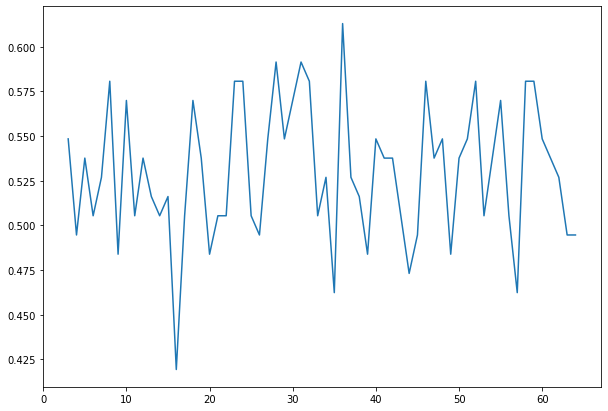

In [207]:
pd.Series(k_vs_score[1:],index=range(3,X.shape[1],1)).plot(figsize=(10,7))